# Machine Learning Techniques / Deep Learnig / Hybrid Model

# Library Import And Install

In [ ]:
import matplotlib
import numpy as np
import random
import os
import matplotlib.pyplot as plt 
import tensorflow as tf
from keras import backend as K
import pickle 
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, cohen_kappa_score

import sklearn
from copy import deepcopy
import keras
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
sns.set(font_scale=1.5)

2.7.0


Focal Loss (FL) is an improved version of Cross-Entropy Loss (CE) that tries to handle the class imbalance problem by assigning more weights to hard or easily misclassified examples. To assign more or less weight at the minority class is possible to tune a gamma parameter: with gamma = 0 the result is the classical CE Loss while with higher gamma the loss gives more weight to the minority class.
https://arxiv.org/abs/1708.02002v2 

In [ ]:
%pip install focal-loss

In [ ]:
from focal_loss import BinaryFocalLoss

In [ ]:
# Random seed for reproducibility
seed = 61

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

## Drive Mount & Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0️⃣ Functions

## Plotting Function

### Plot Performance

Plot performance for models with classical metrics

In [ ]:
def performancePlot(tr_data, start_epoch, model_name, show=True, save = False, folder = "/" ):
    #Plot the training and validation data
    tf1=tr_data['f1_m']
    tloss=tr_data['loss']
    vf1=tr_data['val_f1_m']
    vloss=tr_data['val_loss']
    lr=tr_data['lr']

    Epoch_count=len(tf1)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_f1=np.argmax(vf1)
    f1_highest=vf1[index_f1]

    plt.style.use('seaborn-darkgrid')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch) + "\nBest Loss= " + str(round(val_lowest,4))
    vc_label='best epoch= '+ str(index_f1 + 1+ start_epoch) + "\nBest F1= " + str(round(f1_highest,4))
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(24,8), gridspec_kw={'width_ratios': [3, 3, 2]})
    # Set the graph titles
    st = fig.suptitle(model_name, fontsize="x-large", fontweight="bold")
    axes[0].plot(Epochs, tloss, linewidth=1.5,  label='Training loss', marker='o', markersize=5)
    axes[0].plot(Epochs, vloss, linewidth=1.5,  label='Validation loss', marker='o', markersize=5)
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=50, c= 'blue', marker='d', label=sc_label,  zorder = 10)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    axes[1].plot (Epochs, tf1, linewidth=1.5, label= 'Training F1', marker='o', markersize=5)
    axes[1].plot (Epochs, vf1, linewidth=1.5, label= 'Validation F1', marker='o', markersize=5)
    axes[1].scatter(index_f1+1 +start_epoch,f1_highest, s=50, c= 'blue', marker='d', label=vc_label,  zorder = 10)
    axes[1].set_title('Training and Validation f1')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score')
    axes[1].legend()

    axes[2].plot (Epochs, lr, linewidth=1.5, label= 'Learning Rate', marker='o', markersize=5)
    axes[2].set_title('Learning Rate')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Learning Rate')
    axes[2].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    
    # Save should be before plot to avoid blank images
    if save:
      plt.savefig(str(folder + "/" + model_name + ".png"))
    if show:
      plt.show()
    

Plot performance for models with custom metrics (Bal Acc)

In [ ]:
def performancePlot(tr_data, start_epoch, model_name, show=True, save = False, folder = "/" ):
    #Plot the training and validation data
    tbacc=tr_data['bal_acc']
    tloss=tr_data['loss']
    vbacc=tr_data['val_bal_acc']
    vloss=tr_data['val_loss']
    lr=tr_data['lr']

    Epoch_count=len(tbacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_bacc=np.argmax(vbacc)
    bacc_highest=vbacc[index_bacc]

    plt.style.use('seaborn-darkgrid')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch) + "\nBest Loss= " + str(round(val_lowest,4))
    vc_label='best epoch= '+ str(index_bacc + 1+ start_epoch) + "\nBest Bal. Acc= " + str(round(bacc_highest,4))
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(24,8), gridspec_kw={'width_ratios': [3, 3, 2]})
    # Set the graph titles
    st = fig.suptitle(model_name, fontsize="x-large", fontweight="bold")
    axes[0].plot(Epochs, tloss, linewidth=1.5,  label='Training loss', marker='o', markersize=5)
    axes[0].plot(Epochs, vloss, linewidth=1.5,  label='Validation loss', marker='o', markersize=5)
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=50, c= 'blue', marker='d', label=sc_label,  zorder = 10)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    axes[1].plot (Epochs, tbacc, linewidth=1.5, label= 'Training Bal.Acc score', marker='o', markersize=5)
    axes[1].plot (Epochs, vbacc, linewidth=1.5, label= 'Validation Bal.Acc score', marker='o', markersize=5)
    axes[1].scatter(index_bacc+1 +start_epoch,bacc_highest, s=50, c= 'blue', marker='d', label=vc_label,  zorder = 10)
    axes[1].set_title('Training and Validation Balanced Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Balanced Accuracy Cohen Score')
    axes[1].legend()

    axes[2].plot (Epochs, lr, linewidth=1.5, label= 'Learning Rate', marker='o', markersize=5)
    axes[2].set_title('Learning Rate')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Learning Rate')
    axes[2].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    
    # Save should be before plot to avoid blank images
    if save:
      plt.savefig(str(folder + "/" + model_name + ".png"))
    if show:
      plt.show()
    

Plot performance for models with custom metrics (F1)

In [ ]:
def performancePlotF1(tr_data, start_epoch, model_name, show=False, save = False, folder = "/" ):
    #Plot the training and validation data
    tf1=tr_data['f1']
    tloss=tr_data['loss']
    vf1=tr_data['val_f1']
    vloss=tr_data['val_loss']
    lr=tr_data['lr']

    Epoch_count=len(tf1)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_f1=np.argmax(vf1)
    f1_highest=vf1[index_f1]

    plt.style.use('seaborn-darkgrid')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch) + "\nBest Loss= " + str(round(val_lowest,4))
    vc_label='best epoch= '+ str(index_f1 + 1+ start_epoch) + "\nBest F1= " + str(round(f1_highest,4))
    fig,axes=plt.subplots(nrows=1, ncols=3, figsize=(24,8), gridspec_kw={'width_ratios': [3, 3, 2]})
    # Set the graph titles
    st = fig.suptitle(model_name, fontsize="x-large", fontweight="bold")
    axes[0].plot(Epochs, tloss, linewidth=1.5,  label='Training loss', marker='o', markersize=5)
    axes[0].plot(Epochs, vloss, linewidth=1.5,  label='Validation loss', marker='o', markersize=5)
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=50, c= 'blue', marker='d', label=sc_label,  zorder = 10)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    
    axes[1].plot (Epochs, tf1, linewidth=1.5, label= 'Training F1', marker='o', markersize=5)
    axes[1].plot (Epochs, vf1, linewidth=1.5, label= 'Validation F1', marker='o', markersize=5)
    axes[1].scatter(index_f1+1 +start_epoch,f1_highest, s=50, c= 'blue', marker='d', label=vc_label,  zorder = 10)
    axes[1].set_title('Training and Validation f1')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('F1 Score')
    axes[1].legend()

    axes[2].plot (Epochs, lr, linewidth=1.5, label= 'Learning Rate', marker='o', markersize=5)
    axes[2].set_title('Learning Rate')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('Learning Rate')
    axes[2].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    
    # Save should be before plot to avoid blank images
    if save:
      plt.savefig(str(folder + "/" + model_name + ".png"))
      plt.close()
    if show:
      plt.show()
    

### Plot Confusion Matrix

Plot confusion matrix 

In [ ]:
def plot_CMatrix(matrix,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools
    plt.close
    accuracy = np.trace(matrix) / float(np.sum(matrix))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


    thresh = matrix.max() / 1.5 if normalize else matrix.max() / 2
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if matrix[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if matrix[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()

Plot and save normalized confusion matrix

In [ ]:
def normConfusionMatrix(normMatrix, model_name, show=False, save = False, folder = "/" ):
  plt.figure(figsize=(8, 6))
  plt.title(str("Norm C. Matrix - " + model_name))
  sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False)
    # Save should be before plot to avoid blank images
  if save:
    plt.savefig(str(folder + "/" + model_name + "_ConfusionMatrix.png"))
    plt.close()
  if show:
    plt.show()

# 1️⃣ Import Signals

## Import Downsampled Signals

### Downsampled training set

In [ ]:
with open("/content/drive/MyDrive/A.I/FinalProject/Dataset/NEW FILTERED V2/dataset_train_down_filtered.pickle","rb") as f:
  trainDOWN=pickle.load(f)

### Training y

In [ ]:
with open("/content/drive/MyDrive/A.I/FinalProject/Dataset/NEW FILTERED V2/y_train_down_filtered.pickle","rb") as f:
  y_train=pickle.load(f)

### Downsampled validation set

In [ ]:
with open("/content/drive/MyDrive/A.I/FinalProject/Dataset/NEW FILTERED V2/dataset_val_down_filtered.pickle","rb") as f:
  valDOWN=pickle.load(f)

### Validation y

In [ ]:
with open("/content/drive/MyDrive/A.I/FinalProject/Dataset/NEW FILTERED V2/y_val_down_filtered.pickle","rb") as f:
  y_val=pickle.load(f)

## Remove N element for S-V analysis

trainDOWN_sv

In [ ]:
trainDOWN_sv = []
for index, label in enumerate(y_train):
  if (label == 'S' or label == 'V'):
    trainDOWN_sv.append(trainDOWN[index])

In [ ]:
len(trainDOWN_sv)

13075

valDOWN_sv

In [ ]:
valDOWN_sv = []
for index, label in enumerate(y_val):
  if (label == 'S' or label == 'V'):
    valDOWN_sv.append(valDOWN[index])

In [ ]:
len(valDOWN_sv)

4030

# 2️⃣ Import Dataset With Wide Features

## All Dataset

In [ ]:
df_train= pd.read_csv('/content/drive/MyDrive/A.I/FinalProject/Dataset/NEW FILTERED V2/filtered_new.csv')
# Remove the first column with the index
df_train.drop(columns=['Unnamed: 0'], inplace=True)
df_train.head(5)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13,Target
0,81,81,1.914480,7.944007,-0.062486,-0.004308,-0.458913,-0.468967,-0.251277,0.287037,-0.409887,0.113767,-1.166232,-2.109186,0.958716,-0.834810,0.362430,-0.128129,0.203789,0.033498,1.218533,1.736983,-0.031072,0.058298,0.074685,0.014625,-0.299921,0.006261,0.317171,-0.405277,-0.499726,0.279098,-0.048510,0.936837,-0.663090,0.004723,N
1,81,81,1.842209,7.457314,-0.058846,-0.001905,-0.421617,-0.427641,-0.214554,0.286610,-0.472053,0.139712,-1.132131,-2.070896,0.915226,-0.778864,0.325528,-0.104878,0.178876,0.046020,1.196034,1.689614,-0.029084,0.054577,0.071452,0.016134,-0.302264,0.099010,0.300339,-0.445788,-0.468586,0.261079,-0.042732,0.937093,-0.600178,-0.143463,N
2,81,81,1.757544,7.372223,-0.045870,0.006698,-0.297838,-0.305653,-0.158871,0.240580,-0.420839,0.146221,-0.905162,-1.901968,0.734132,-0.704716,0.307078,-0.097691,0.158368,0.108444,1.163358,1.345855,-0.020321,0.041546,0.059369,0.017579,-0.272424,0.123017,0.358679,-0.277192,-0.558895,0.282601,-0.010987,0.836471,-0.731509,-0.106818,N
3,81,80,1.673598,6.982199,0.010213,0.012976,0.090859,0.100627,0.023333,0.106368,-0.361013,0.184065,-0.939162,-1.868144,0.794201,-0.670032,0.282659,-0.095605,0.176023,-0.019461,1.185822,1.357120,-0.007586,0.010922,-0.022012,-0.026940,-0.287816,0.033345,0.318052,-0.111754,-0.523029,0.286839,-0.072151,0.697356,-0.686224,-0.046619,N
4,80,81,1.873282,7.644407,-0.071335,0.002470,-0.486129,-0.497678,-0.250633,0.243858,-0.423960,0.166343,-1.188431,-2.211835,1.059788,-0.841557,0.343750,-0.117295,0.214227,-0.042035,1.273966,1.802081,-0.030571,0.061248,0.091960,0.036075,-0.247728,0.118253,0.265128,-0.416513,-0.428958,0.267427,-0.116897,0.985879,-0.679628,-0.045748,N


In [ ]:
df_val= pd.read_csv('/content/drive/MyDrive/A.I/FinalProject/Dataset/NEW FILTERED V2/val_filtered_new.csv')
# Remove the first column with the index
df_val.drop(columns=['Unnamed: 0'], inplace=True)
df_val.head(5)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13,Target
0,71,82,-1.886055,7.299344,-0.008938,0.016401,-0.004159,-0.003576,-0.092386,-0.197828,0.334557,0.137607,1.428482,3.064075,-1.435454,0.763721,-0.302766,0.023128,0.115957,-0.115565,-1.553925,-2.455511,-0.016615,0.028942,0.005522,0.015233,-0.037033,-0.899467,-0.282338,1.593954,0.290745,-0.132279,0.015703,-2.179081,1.037596,0.430019,N
1,82,79,-1.740336,5.877049,0.163593,0.033126,1.193943,1.232913,0.590551,-0.240504,0.333318,0.137097,1.188173,3.167336,-1.286171,0.838729,-0.341170,0.050178,0.014644,-0.158912,-1.810077,-2.063149,0.056606,-0.112817,-0.218673,-0.111528,0.042390,-0.928074,-0.536142,1.168788,0.494284,-0.210221,-0.010440,-1.895139,1.369957,0.454945,N
2,79,48,-1.670844,3.118496,0.520263,0.196455,3.984041,4.128678,1.747076,-1.067998,0.723027,0.045117,1.352577,2.989736,-1.278955,1.932520,0.437847,-0.533578,-1.591745,0.199991,-1.619387,-2.327455,0.144736,-0.288329,-0.716607,-0.367988,-0.245053,-1.688120,0.018898,1.131053,-1.516446,0.003970,1.806326,-1.977837,1.218505,0.580132,N
3,48,87,-1.811867,4.140602,0.039746,0.004220,0.253168,0.270369,0.311337,1.302731,2.973867,-1.246933,2.247446,2.620736,-1.418872,0.875081,-0.359540,0.068250,-0.002945,0.033965,-1.632573,-2.270615,0.011255,-0.024846,-0.057714,-0.052474,0.259362,0.135747,-2.866589,2.231942,0.001772,-0.096802,0.009408,-1.854719,2.180503,0.751268,S
4,87,52,-1.633142,5.385339,-0.024889,-0.012732,-0.195590,-0.201876,0.023484,-0.114245,0.079372,0.227246,1.316844,3.057932,-1.114777,0.891984,-1.172207,1.011700,-0.275050,-0.200843,-1.720220,-2.214893,0.004073,-0.002219,0.043198,0.054668,0.412150,0.051251,-0.955080,1.422330,-1.556265,-0.087766,1.933029,-2.006335,1.337315,0.023633,N


### Dataset transformation for keras

In [ ]:
X_train_df = df_train.iloc[:,0:-1]
y_train_df = df_train.iloc[:,-1] #[-1]]
X_train_df,y_train_df

(        Rprec  Rsucc  Skewness  ...    cD5_11    cD5_12    cD5_13
 0          81     81  1.914480  ...  0.936837 -0.663090  0.004723
 1          81     81  1.842209  ...  0.937093 -0.600178 -0.143463
 2          81     81  1.757544  ...  0.836471 -0.731509 -0.106818
 3          81     80  1.673598  ...  0.697356 -0.686224 -0.046619
 4          80     81  1.873282  ...  0.985879 -0.679628 -0.045748
 ...       ...    ...       ...  ...       ...       ...       ...
 183496    234    244  0.622540  ...  0.381404 -0.194105  0.141348
 183497    244    242  0.139377  ...  0.424795 -0.100097  0.297710
 183498    242    248  1.199040  ...  0.371757 -0.217053  0.185619
 183499    248    212  2.101991  ...  0.483956 -0.134660  0.153836
 183500    212    232  2.223049  ...  0.484446 -0.195705  0.128574
 
 [183501 rows x 36 columns], 0         N
 1         N
 2         N
 3         N
 4         N
          ..
 183496    N
 183497    N
 183498    N
 183499    N
 183500    N
 Name: Target, Length: 

In [ ]:
X_val_df = df_val.iloc[:,0:-1]
y_val_df = df_val.iloc[:,-1] #[-1]]
X_val_df,y_val_df

(       Rprec  Rsucc  Skewness  ...    cD5_11    cD5_12    cD5_13
 0         71     82 -1.886055  ... -2.179081  1.037596  0.430019
 1         82     79 -1.740336  ... -1.895139  1.369957  0.454945
 2         79     48 -1.670844  ... -1.977837  1.218505  0.580132
 3         48     87 -1.811867  ... -1.854719  2.180503  0.751268
 4         87     52 -1.633142  ... -2.006335  1.337315  0.023633
 ...      ...    ...       ...  ...       ...       ...       ...
 55936    234    228  2.640664  ...  0.354526  0.100949  0.110338
 55937    228    218  2.540647  ...  0.297816  0.092209  0.043230
 55938    218    216  2.329963  ...  0.352424  0.135090 -0.094349
 55939    216    214  2.171292  ...  0.242532  0.138435 -0.134730
 55940    214    214  2.074617  ...  0.196305  0.097238 -0.105938
 
 [55941 rows x 36 columns], 0        N
 1        N
 2        N
 3        S
 4        N
         ..
 55936    N
 55937    N
 55938    N
 55939    N
 55940    N
 Name: Target, Length: 55941, dtype: object)

In [ ]:
# Conversion into keras tensor (train and val)
X_train_df_keras = tf.convert_to_tensor(X_train_df)
X_val_df_keras = tf.convert_to_tensor(X_val_df)

### Normalization layer

In [ ]:
# Generation of normalizer layer fitted over train
normalizer = tf.keras.layers.Normalization(name="NormalizationLayer",axis=-1)
normalizer.adapt(X_train_df_keras)

## Data Analysis & PCA

### Data Analysis

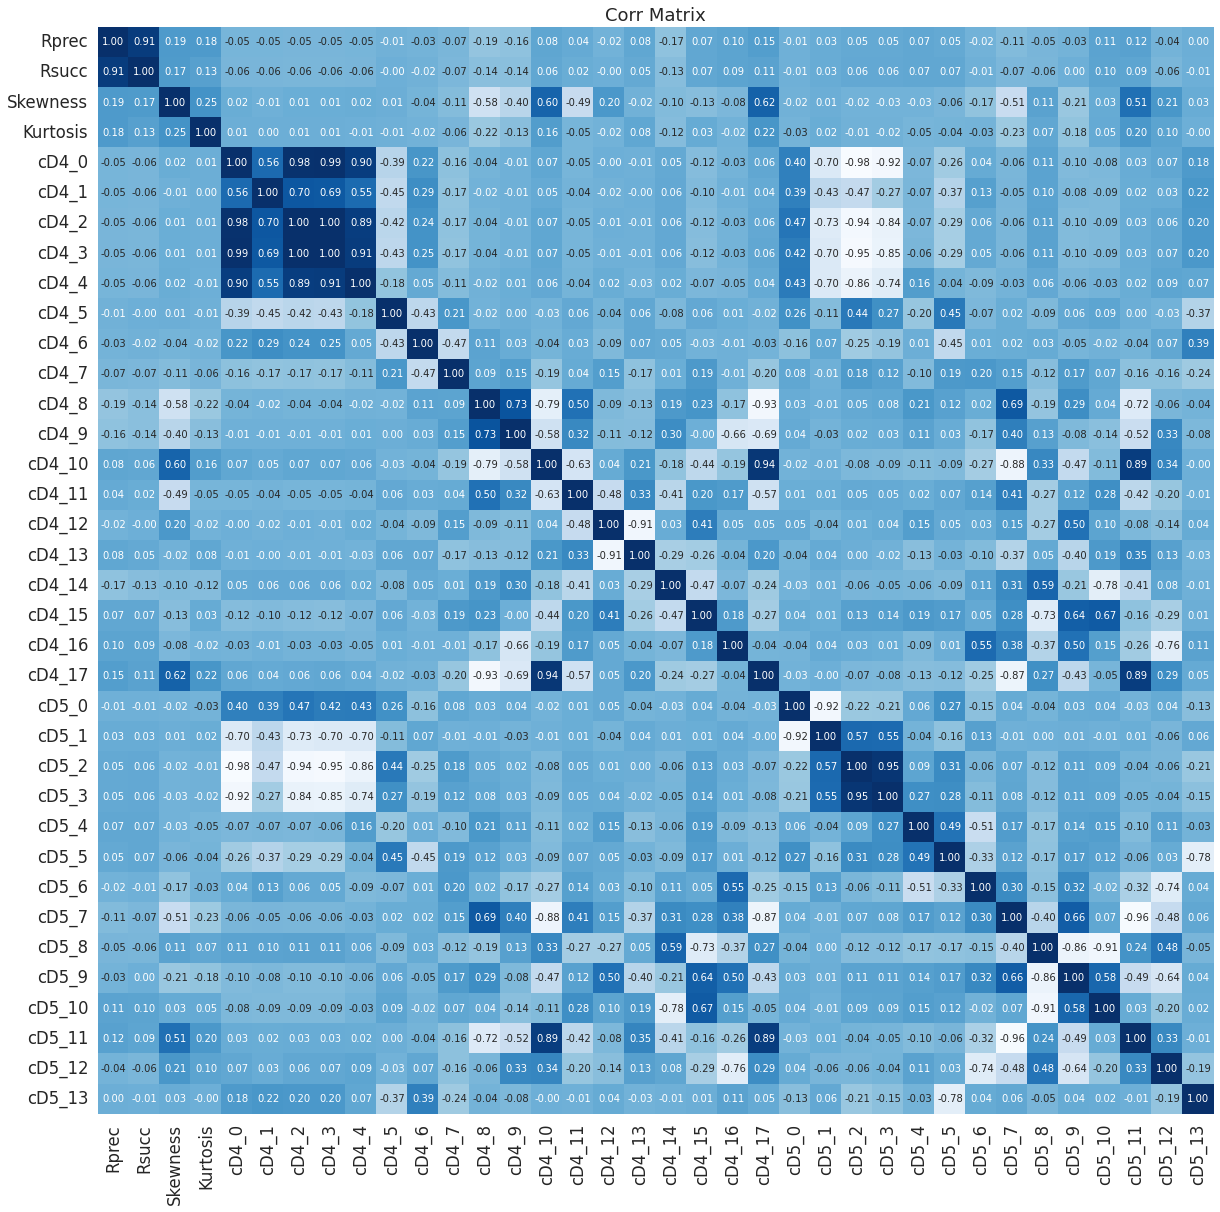

In [ ]:
plt.figure(figsize=(20, 20))
plt.title("Corr Matrix")
sns.heatmap(X_train_df.corr(), annot=True, fmt='.2f', cmap="Blues", cbar=False)
plt.show()

## Removal of correlated features 

In [ ]:
correlated_features = set()
correlation_matrix = X_train_df.corr()
median_corr = (correlation_matrix.abs()).median(axis=0)



for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i, j]) > 0.90:
      if median_corr[i] > median_corr[j]:
        colname = correlation_matrix.columns[i]
      else:
        colname = correlation_matrix.columns[j]

      correlated_features.add(colname)

print('Deleted features: ' + str(correlated_features))

Deleted features: {'cD5_3', 'Rsucc', 'cD4_2', 'cD4_3', 'cD5_0', 'cD4_17', 'cD5_7', 'cD5_2', 'cD5_8', 'cD4_13'}


"Rsucc" is highly correlated with Rprec since these values equal each other when the heartbeat is physiological. For this reason is not possible to remove it from the dataset without losing information associated with the PAC and PVC

In [ ]:
correlated_features.remove('Rsucc')
correlated_features

{'cD4_13',
 'cD4_17',
 'cD4_2',
 'cD4_3',
 'cD5_0',
 'cD5_2',
 'cD5_3',
 'cD5_7',
 'cD5_8'}

In [ ]:
X_train_df_removed = deepcopy(X_train_df)
X_val_df_removed = deepcopy(X_val_df)
X_train_df_removed.drop(labels=correlated_features, axis=1, inplace=True)
X_val_df_removed.drop(labels=correlated_features, axis=1, inplace=True)

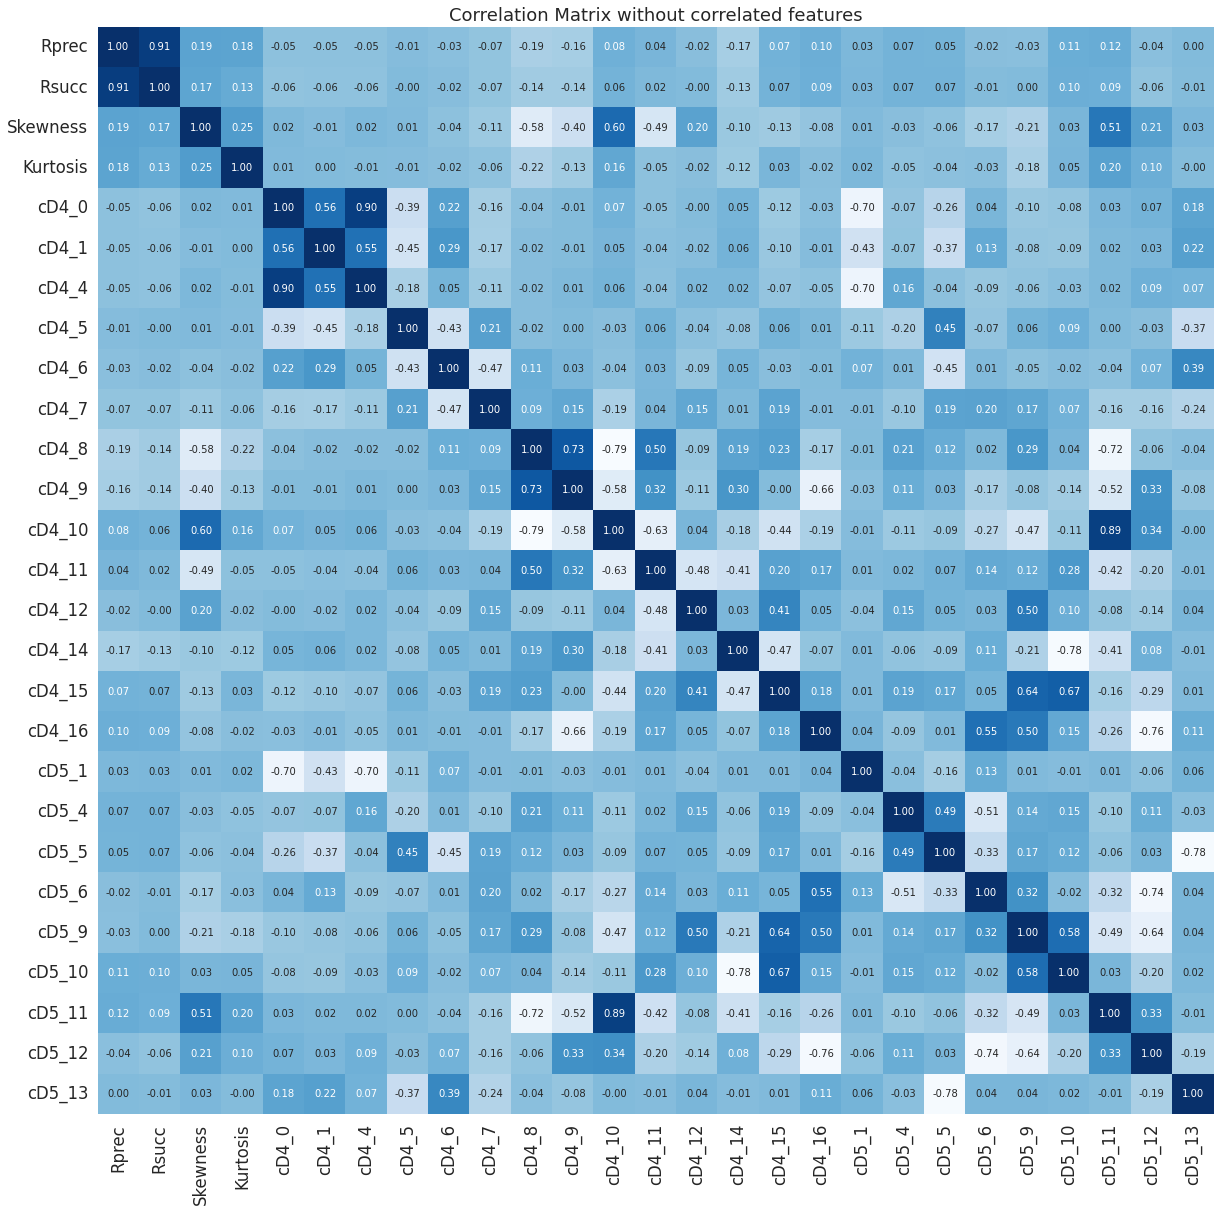

In [ ]:
plt.figure(figsize=(20, 20))
plt.title("Correlation Matrix without correlated features")
sns.heatmap(X_train_df_removed.corr(), annot=True, fmt='.2f', cmap="Blues", cbar=False)
plt.show()

## Scaling

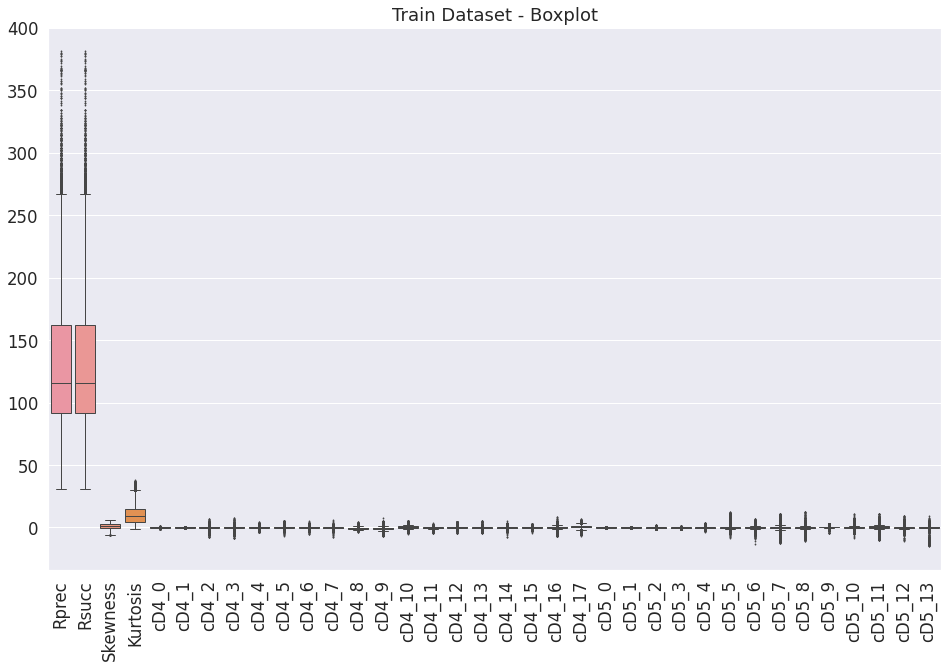

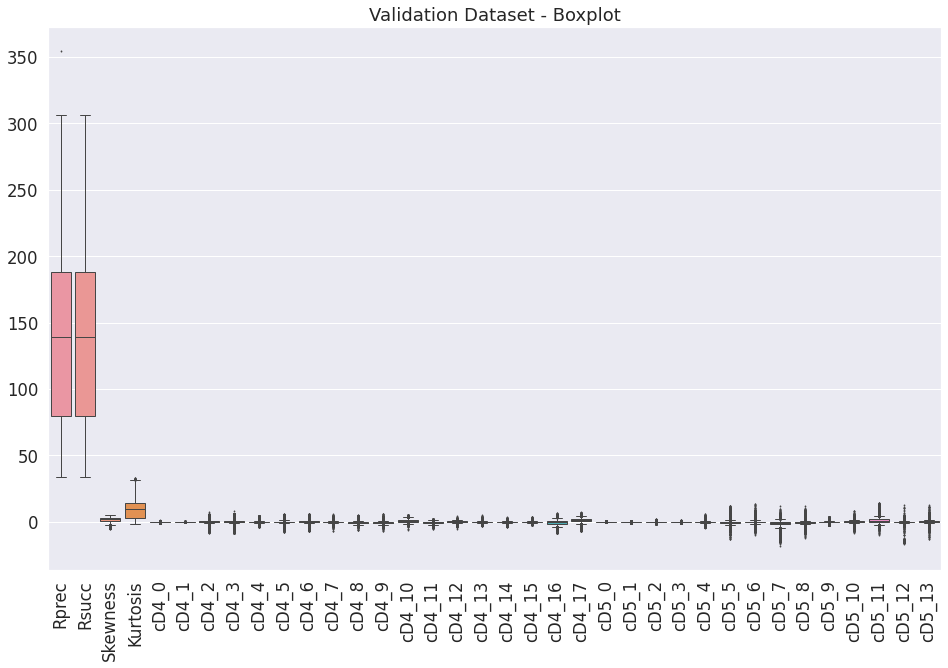

In [ ]:
%matplotlib inline
plt.figure(figsize=(16, 10))
plt.title("Train Dataset - Boxplot")
ax = sns.boxplot(data = X_train_df, linewidth=1,fliersize=1)
ax.set_xticklabels(X_train_df.columns, rotation=90)
plt.show()

plt.figure(figsize=(16, 10))
plt.title("Validation Dataset - Boxplot")
ax = sns.boxplot(data = X_val_df, linewidth=1,fliersize=1)
ax.set_xticklabels(X_val_df.columns, rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_df)

scaled_data_t = scaler.transform(X_train_df.astype(float))
scaled_X_train_df = pd.DataFrame(scaled_data_t.astype(float))
scaled_X_train_df.columns = X_train_df.columns

scaled_data_v = scaler.transform(X_val_df.astype(float))
scaled_X_val_df = pd.DataFrame(scaled_data_v.astype(float))
scaled_X_val_df.columns = X_val_df.columns

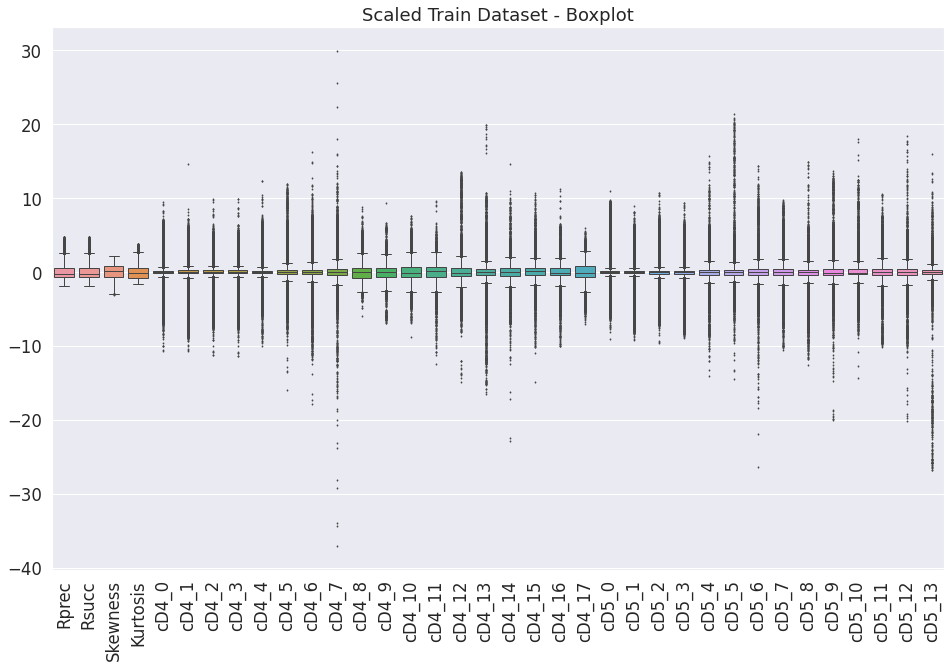

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Scaled Train Dataset - Boxplot")
ax = sns.boxplot(data = scaled_X_train_df, linewidth=1,fliersize=1)
ax.set_xticklabels(scaled_X_train_df.columns, rotation=90)
plt.show()

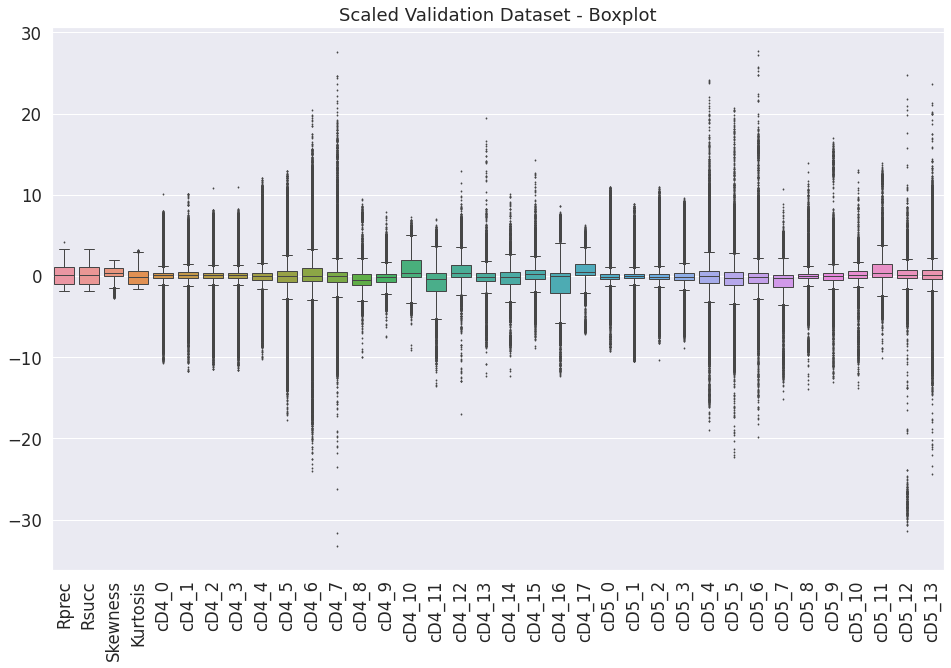

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Scaled Validation Dataset - Boxplot")
ax = sns.boxplot(data = scaled_X_val_df, linewidth=1,fliersize=1)
ax.set_xticklabels(scaled_X_val_df.columns, rotation=90)
plt.show()

## Variance check

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from itertools import compress

vt = VarianceThreshold(threshold=(0.01)) # eliminate constant features
train_features_var = vt.fit_transform(scaled_X_val_df)
mask = vt.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


## 🅿️ PCA

In [ ]:
from sklearn.decomposition import PCA
# we can choose the number of components e.g. 10, the percentage of the total variance or set it to None (that means it automatically chooses the number of components)
pca_fitTrain = PCA()
pca_fitTrain.fit(scaled_X_train_df) 

PCA()

In [ ]:
#Let's analyse what happened
#VISUALIZE The amount of variance explained by each of the 10 selected principal components.
pd.DataFrame(pca_fitTrain.explained_variance_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,7.484299,6.369858,4.065552,3.185336,2.707042,2.298566,1.858337,1.376444,1.122756,0.92863,0.904333,0.756021,0.594852,0.472357,0.430778,0.357758,0.333043,0.306594,0.187516,0.124508,0.087273,0.032476,0.013247,0.002363,0.000168,0.000065,0.000025,2.751288e-10,1.476018e-30,2.258081e-31,1.717198e-31,1.480143e-31,1.460729e-31,1.374564e-31,1.125614e-31,1.068501e-31


In [ ]:
explained_var=pd.DataFrame(pca_fitTrain.explained_variance_ratio_).transpose()
explained_var

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.207896,0.17694,0.112931,0.088481,0.075195,0.063849,0.05162,0.038234,0.031187,0.025795,0.02512,0.021,0.016524,0.013121,0.011966,0.009938,0.009251,0.008516,0.005209,0.003459,0.002424,0.000902,0.000368,0.000066,0.000005,0.000002,7.053687e-07,7.642425e-12,4.100027e-32,6.272414e-33,4.769969e-33,4.111485e-33,4.057558e-33,3.818212e-33,3.126689e-33,2.968042e-33


In [ ]:
#Cumulative percentage of explained variance
cum_explained_var=np.cumsum(pca_fitTrain.explained_variance_ratio_)
pd.DataFrame(cum_explained_var).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.207896,0.384836,0.497767,0.586248,0.661443,0.725292,0.776912,0.815146,0.846334,0.872129,0.897249,0.91825,0.934773,0.947894,0.95986,0.969798,0.979049,0.987566,0.992774,0.996233,0.998657,0.999559,0.999927,0.999993,0.999997,0.999999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


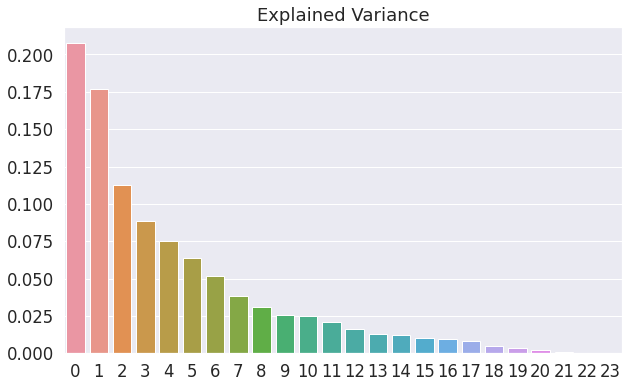

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title("Explained Variance")
ax = sns.barplot(data=explained_var.iloc[:,0:24])

In [ ]:
pd.DataFrame(pca_fitTrain.components_[0:6,:],index=['PC1','PC2','PC3','PC4','PC5','PC6'],columns=X_train_df.columns)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13
PC1,0.001574,-0.007547,0.122713,0.049136,0.296863,0.204787,0.299757,0.300396,0.260361,-0.130996,0.084728,-0.110551,-0.162163,-0.080765,0.207332,-0.128583,-0.037028,0.056572,0.025094,-0.154168,-0.080805,0.199586,0.112075,-0.197972,-0.290067,-0.266562,-0.056422,-0.129275,-0.058018,-0.203646,0.164933,-0.188435,-0.103479,0.181020,0.130262,0.073845
PC2,0.072657,0.062959,0.205671,0.087371,-0.215834,-0.150081,-0.220210,-0.218894,-0.201196,0.090444,-0.071270,-0.030781,-0.254376,-0.160135,0.292755,-0.165696,-0.038413,0.105712,-0.058070,-0.115350,-0.082794,0.294718,-0.126837,0.180031,0.202407,0.177520,-0.028655,0.036111,-0.125219,-0.295507,0.132052,-0.195292,-0.044818,0.292644,0.144183,-0.062791
PC3,-0.143904,-0.135382,-0.142845,-0.064720,-0.048223,-0.020546,-0.046955,-0.045989,-0.050902,-0.006052,0.031394,-0.009532,0.210290,0.340122,-0.098116,0.028623,-0.180200,0.028536,0.322607,-0.274139,-0.278019,-0.164273,-0.051595,0.060838,0.041917,0.042042,-0.003205,-0.013103,-0.117409,0.043298,0.355632,-0.287486,-0.345256,-0.128434,0.253031,-0.062296
PC4,0.018023,0.014376,0.017525,0.004762,0.036886,-0.060979,0.032551,0.024699,0.155334,0.241971,-0.246920,0.122137,0.067610,0.137051,0.010819,0.025353,0.040647,0.002794,-0.140014,0.118188,-0.225302,-0.011564,0.327997,-0.294938,0.017822,0.016870,0.235036,0.422452,-0.332506,-0.056729,-0.081084,-0.004600,0.143774,0.060019,0.225051,-0.315290
PC5,0.116966,0.098447,-0.130542,0.059430,0.005456,0.021408,0.006292,0.008521,-0.015391,-0.057854,0.166036,-0.164164,0.107718,0.076049,-0.068829,0.412756,-0.460864,0.486927,-0.328821,0.028496,-0.062684,-0.054828,-0.071336,0.059122,-0.017841,-0.008685,0.004840,-0.079635,-0.089388,-0.086638,-0.108819,-0.130145,0.246507,0.078844,0.078817,0.081750
PC6,0.001985,0.007355,0.091549,0.008676,-0.017359,0.046630,-0.012428,-0.004038,-0.013177,-0.313409,0.287379,-0.194895,0.111995,0.160530,0.007869,-0.135230,0.287585,-0.229051,-0.070302,0.207452,-0.271634,-0.002048,-0.176271,0.155631,-0.009864,0.082773,0.337905,-0.125514,-0.324755,-0.010562,-0.116070,0.078468,0.144415,0.024027,0.242550,0.242125


### Define the new dataset for PCA

In [ ]:
pca = PCA(n_components=22)
pca.fit(scaled_X_train_df)

PCA(n_components=22)

In [ ]:
X_train_df_pca =  pca.transform(scaled_X_train_df)
X_val_df_pca = pca.transform(scaled_X_val_df)

## Dataset S-V

In [ ]:
df_sv_train = df_train.drop(df_train[df_train.Target == 'N'].index)
df_sv_train.head(5)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13,Target
16,53,108,-0.270006,0.818091,0.051574,0.004417,0.328008,0.348715,0.518116,1.585984,-0.745255,0.377077,-1.528716,-2.667430,3.751237,-2.521857,1.207077,-0.159297,-0.618253,0.862026,-1.709636,4.472856,0.023204,-0.041374,-0.068800,-0.093063,-0.646342,-1.499106,0.641807,-6.552608,-1.277299,0.356170,0.809266,7.504230,-1.674717,1.878845,V
18,38,125,1.132446,3.481004,-0.010861,-0.001312,-0.068046,-0.070823,0.043110,0.619062,1.712020,-0.163257,-0.025989,-1.162677,0.823820,-0.907035,0.608279,-0.319955,0.164613,0.140624,0.396669,0.309818,0.003381,-0.004248,0.021721,0.008438,0.161716,1.099615,1.345803,-0.967960,-0.407314,0.218518,0.199265,0.726395,-0.915348,-1.579404,V
20,35,128,1.862540,4.901439,0.006568,0.004507,0.060221,0.066821,0.053111,0.342276,0.704613,-0.837269,0.216413,-1.360349,1.130329,-0.880972,0.571160,-0.272011,0.027378,0.131609,0.096605,0.727216,-0.001823,0.001263,-0.010881,-0.013370,-0.007646,0.835413,0.646507,-1.561108,-0.243138,0.101643,0.294897,1.155090,-0.078195,-1.471341,V
71,61,94,1.878686,5.106220,-0.061048,-0.018748,-0.459348,-0.530454,-1.009947,-1.052852,0.919240,-0.854802,-0.627015,-1.910667,0.950809,-0.823803,0.340135,-0.112654,0.216930,-0.015303,0.977666,1.575557,-0.018508,0.033422,0.080183,-0.019451,-0.116045,-1.295304,-0.206363,-0.157194,-0.532732,0.269975,-0.026079,0.854568,-0.441073,1.788762,S
165,52,112,-0.206754,0.793322,0.049918,0.004977,0.315236,0.342276,0.445372,1.102577,-1.176359,0.480898,-1.608003,-2.678599,3.786435,-2.618901,1.221560,-0.155866,-0.575862,0.912571,-1.752501,4.489309,0.018327,-0.037022,-0.069292,-0.083653,-0.564947,-1.208310,0.960730,-6.885578,-1.138005,0.302360,0.798903,7.671354,-1.851046,1.467928,V


In [ ]:
df_sv_val = df_val.drop(df_val[df_val.Target == 'N'].index)
df_sv_val.head(5)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13,Target
3,48,87,-1.811867,4.140602,0.039746,0.004220,0.253168,0.270369,0.311337,1.302731,2.973867,-1.246933,2.247446,2.620736,-1.418872,0.875081,-0.359540,0.068250,-0.002945,0.033965,-1.632573,-2.270615,0.011255,-0.024846,-0.057714,-0.052474,0.259362,0.135747,-2.866589,2.231942,0.001772,-0.096802,0.009408,-1.854719,2.180503,0.751268,S
5,52,118,-1.802651,4.053668,-0.043218,-0.011527,-0.286037,-0.309679,-0.308777,-1.109096,1.522344,-0.331639,1.897860,2.373920,-1.300189,0.761239,-0.260435,0.007437,0.015960,0.033342,-1.392049,-2.257953,0.001672,0.004218,0.073667,0.106015,0.933163,2.027748,-2.548103,2.196961,-0.134872,0.011720,-0.046711,-1.753383,1.804284,-1.224363,S
8,50,120,-1.709486,3.623531,-0.015686,-0.002543,-0.073530,-0.097320,0.070747,0.878221,3.122303,-0.931653,2.512177,3.036556,-1.864808,1.081343,-0.414391,0.049386,0.054327,0.005566,-1.504771,-3.073373,0.015321,-0.014231,0.039907,0.039551,0.521675,0.926723,-2.708877,3.051431,-0.113107,-0.026530,-0.058912,-2.553135,1.913068,0.040496,S
11,50,123,-1.677454,3.641282,-0.023706,-0.004061,-0.126016,-0.158272,0.010567,0.802399,2.999691,-0.952952,2.277626,3.024555,-1.502103,0.966529,-0.405515,0.076599,0.009597,-0.057475,-1.852025,-2.526967,0.014409,-0.010274,0.052242,0.046988,0.507229,0.909175,-2.949449,2.414700,0.048068,-0.110228,0.001869,-2.137535,2.350669,-0.102408,S
13,61,116,-0.607151,2.353369,0.010280,-0.000984,0.064127,0.125517,1.001944,1.156972,-1.767954,0.242046,-1.263012,-0.631237,0.464782,-0.035604,-0.031060,0.162489,-0.479000,0.544545,-0.460217,1.906018,-0.002924,0.009935,-0.016508,0.082417,0.296609,2.595769,-1.010986,-2.110926,-0.065643,-0.039182,0.223083,2.095157,0.926424,-2.830833,V


### Dataset transformation for keras

In [ ]:
X_sv_train_df = df_sv_train.iloc[:,0:-1]
y_sv_train_df = df_sv_train.iloc[:,-1] #[-1]]
X_sv_train_df,y_sv_train_df

(        Rprec  Rsucc  Skewness  ...    cD5_11    cD5_12    cD5_13
 16         53    108 -0.270006  ...  7.504230 -1.674717  1.878845
 18         38    125  1.132446  ...  0.726395 -0.915348 -1.579404
 20         35    128  1.862540  ...  1.155090 -0.078195 -1.471341
 71         61     94  1.878686  ...  0.854568 -0.441073  1.788762
 165        52    112 -0.206754  ...  7.671354 -1.851046  1.467928
 ...       ...    ...       ...  ...       ...       ...       ...
 182189    146    292  0.779897  ...  0.183564  0.078945  0.235773
 182191    134    356 -2.285664  ... -1.410347 -0.370596  0.248851
 182193    126    344  1.857360  ...  1.057922  0.676974  0.152089
 182613    122    328 -0.382016  ... -3.053089 -0.545983  0.494102
 183244    132    356 -2.844061  ... -1.085254 -0.394338  0.503765
 
 [13075 rows x 36 columns], 16        V
 18        V
 20        V
 71        S
 165       V
          ..
 182189    S
 182191    V
 182193    V
 182613    V
 183244    V
 Name: Target, Length: 1

In [ ]:
X_sv_val_df = df_sv_val.iloc[:,0:-1]
y_sv_val_df = df_sv_val.iloc[:,-1] #[-1]]
X_sv_val_df,y_sv_val_df

(       Rprec  Rsucc  Skewness  ...    cD5_11    cD5_12    cD5_13
 3         48     87 -1.811867  ... -1.854719  2.180503  0.751268
 5         52    118 -1.802651  ... -1.753383  1.804284 -1.224363
 8         50    120 -1.709486  ... -2.553135  1.913068  0.040496
 11        50    123 -1.677454  ... -2.137535  2.350669 -0.102408
 13        61    116 -0.607151  ...  2.095157  0.926424 -2.830833
 ...      ...    ...       ...  ...       ...       ...       ...
 41135    118    258 -2.453160  ... -0.184088 -0.360467  0.231954
 47212    157    306  2.337171  ...  1.728628  0.481936 -1.763689
 50693    168    290  3.371391  ...  1.187731  0.129202  0.537675
 53699    125    230  3.472359  ...  0.384968  0.148287  0.239530
 55523    156    266  2.280737  ...  0.283184  0.050680 -0.701087
 
 [4030 rows x 36 columns], 3        S
 5        S
 8        S
 11       S
 13       V
         ..
 41135    V
 47212    S
 50693    S
 53699    S
 55523    S
 Name: Target, Length: 4030, dtype: object)

In [ ]:
# Conversion into keras tensor (train and val)
X_sv_train_df_keras = tf.convert_to_tensor(X_sv_train_df)
X_sv_val_df_keras = tf.convert_to_tensor(X_sv_val_df)

### In this case we need also a new y

In [ ]:
y_sv_train_df_keras = y_sv_train_df.tolist()
y_sv_val_df_keras = y_sv_val_df.tolist()

### Scaling

In [ ]:
scaled_data_t = scaler.transform(X_sv_train_df.astype(float))
scaled_X_sv_train_df = pd.DataFrame(scaled_data_t.astype(float))
scaled_X_sv_train_df.columns = X_sv_train_df.columns

scaled_data_v = scaler.transform(X_sv_val_df.astype(float))
scaled_X_sv_val_df = pd.DataFrame(scaled_data_v.astype(float))
scaled_X_sv_val_df.columns = X_sv_val_df.columns

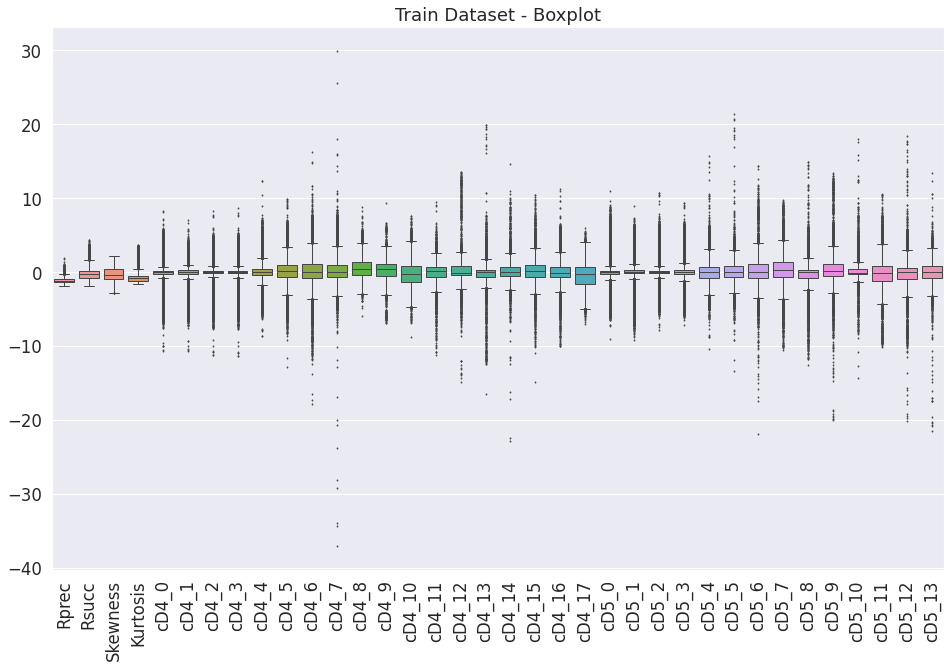

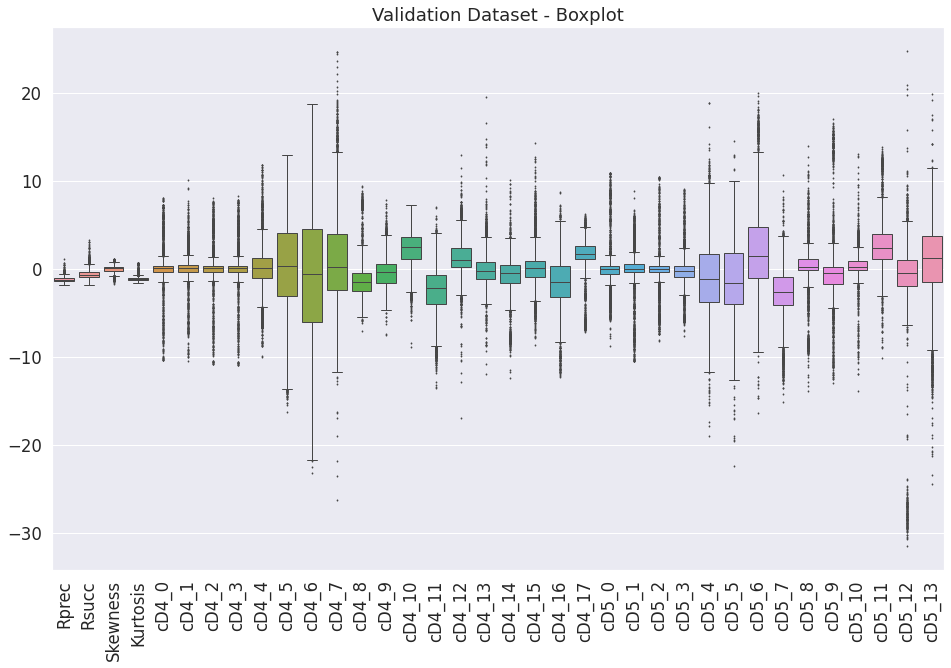

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Train Dataset - Boxplot")
ax = sns.boxplot(data = scaled_X_sv_train_df, linewidth=1,fliersize=1)
ax.set_xticklabels(scaled_X_sv_train_df.columns, rotation=90)
plt.show()

plt.figure(figsize=(16, 10))
plt.title("Validation Dataset - Boxplot")
ax = sns.boxplot(data = scaled_X_sv_val_df, linewidth=1,fliersize=1)
ax.set_xticklabels(scaled_X_sv_val_df.columns, rotation=90)
plt.show()

## Dataset N-M


In [ ]:
df_mn_train = deepcopy(df_train)
df_mn_train["Target"].replace({"S": "M", "V": "M"}, inplace=True)
df_mn_train.head(5)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13,Target
0,81,81,1.914480,7.944007,-0.062486,-0.004308,-0.458913,-0.468967,-0.251277,0.287037,-0.409887,0.113767,-1.166232,-2.109186,0.958716,-0.834810,0.362430,-0.128129,0.203789,0.033498,1.218533,1.736983,-0.031072,0.058298,0.074685,0.014625,-0.299921,0.006261,0.317171,-0.405277,-0.499726,0.279098,-0.048510,0.936837,-0.663090,0.004723,N
1,81,81,1.842209,7.457314,-0.058846,-0.001905,-0.421617,-0.427641,-0.214554,0.286610,-0.472053,0.139712,-1.132131,-2.070896,0.915226,-0.778864,0.325528,-0.104878,0.178876,0.046020,1.196034,1.689614,-0.029084,0.054577,0.071452,0.016134,-0.302264,0.099010,0.300339,-0.445788,-0.468586,0.261079,-0.042732,0.937093,-0.600178,-0.143463,N
2,81,81,1.757544,7.372223,-0.045870,0.006698,-0.297838,-0.305653,-0.158871,0.240580,-0.420839,0.146221,-0.905162,-1.901968,0.734132,-0.704716,0.307078,-0.097691,0.158368,0.108444,1.163358,1.345855,-0.020321,0.041546,0.059369,0.017579,-0.272424,0.123017,0.358679,-0.277192,-0.558895,0.282601,-0.010987,0.836471,-0.731509,-0.106818,N
3,81,80,1.673598,6.982199,0.010213,0.012976,0.090859,0.100627,0.023333,0.106368,-0.361013,0.184065,-0.939162,-1.868144,0.794201,-0.670032,0.282659,-0.095605,0.176023,-0.019461,1.185822,1.357120,-0.007586,0.010922,-0.022012,-0.026940,-0.287816,0.033345,0.318052,-0.111754,-0.523029,0.286839,-0.072151,0.697356,-0.686224,-0.046619,N
4,80,81,1.873282,7.644407,-0.071335,0.002470,-0.486129,-0.497678,-0.250633,0.243858,-0.423960,0.166343,-1.188431,-2.211835,1.059788,-0.841557,0.343750,-0.117295,0.214227,-0.042035,1.273966,1.802081,-0.030571,0.061248,0.091960,0.036075,-0.247728,0.118253,0.265128,-0.416513,-0.428958,0.267427,-0.116897,0.985879,-0.679628,-0.045748,N


In [ ]:
df_mn_val = deepcopy(df_val)
df_mn_val["Target"].replace({"S": "M", "V": "M"}, inplace=True)
df_mn_val.head(5)

,Rprec,Rsucc,Skewness,Kurtosis,cD4_0,cD4_1,cD4_2,cD4_3,cD4_4,cD4_5,cD4_6,cD4_7,cD4_8,cD4_9,cD4_10,cD4_11,cD4_12,cD4_13,cD4_14,cD4_15,cD4_16,cD4_17,cD5_0,cD5_1,cD5_2,cD5_3,cD5_4,cD5_5,cD5_6,cD5_7,cD5_8,cD5_9,cD5_10,cD5_11,cD5_12,cD5_13,Target
0,71,82,-1.886055,7.299344,-0.008938,0.016401,-0.004159,-0.003576,-0.092386,-0.197828,0.334557,0.137607,1.428482,3.064075,-1.435454,0.763721,-0.302766,0.023128,0.115957,-0.115565,-1.553925,-2.455511,-0.016615,0.028942,0.005522,0.015233,-0.037033,-0.899467,-0.282338,1.593954,0.290745,-0.132279,0.015703,-2.179081,1.037596,0.430019,N
1,82,79,-1.740336,5.877049,0.163593,0.033126,1.193943,1.232913,0.590551,-0.240504,0.333318,0.137097,1.188173,3.167336,-1.286171,0.838729,-0.341170,0.050178,0.014644,-0.158912,-1.810077,-2.063149,0.056606,-0.112817,-0.218673,-0.111528,0.042390,-0.928074,-0.536142,1.168788,0.494284,-0.210221,-0.010440,-1.895139,1.369957,0.454945,N
2,79,48,-1.670844,3.118496,0.520263,0.196455,3.984041,4.128678,1.747076,-1.067998,0.723027,0.045117,1.352577,2.989736,-1.278955,1.932520,0.437847,-0.533578,-1.591745,0.199991,-1.619387,-2.327455,0.144736,-0.288329,-0.716607,-0.367988,-0.245053,-1.688120,0.018898,1.131053,-1.516446,0.003970,1.806326,-1.977837,1.218505,0.580132,N
3,48,87,-1.811867,4.140602,0.039746,0.004220,0.253168,0.270369,0.311337,1.302731,2.973867,-1.246933,2.247446,2.620736,-1.418872,0.875081,-0.359540,0.068250,-0.002945,0.033965,-1.632573,-2.270615,0.011255,-0.024846,-0.057714,-0.052474,0.259362,0.135747,-2.866589,2.231942,0.001772,-0.096802,0.009408,-1.854719,2.180503,0.751268,M
4,87,52,-1.633142,5.385339,-0.024889,-0.012732,-0.195590,-0.201876,0.023484,-0.114245,0.079372,0.227246,1.316844,3.057932,-1.114777,0.891984,-1.172207,1.011700,-0.275050,-0.200843,-1.720220,-2.214893,0.004073,-0.002219,0.043198,0.054668,0.412150,0.051251,-0.955080,1.422330,-1.556265,-0.087766,1.933029,-2.006335,1.337315,0.023633,N


### Dataset transformation for keras

In [ ]:
y_mn_train_df = df_mn_train.iloc[:,-1] 
y_mn_train_df

0         N
1         N
2         N
3         N
4         N
         ..
183496    N
183497    N
183498    N
183499    N
183500    N
Name: Target, Length: 183501, dtype: object

In [ ]:
y_mn_val_df = df_mn_val.iloc[:,-1] 
y_mn_val_df

0        N
1        N
2        N
3        M
4        N
        ..
55936    N
55937    N
55938    N
55939    N
55940    N
Name: Target, Length: 55941, dtype: object

# 3️⃣ One Hot Encoding

## 1) One Hot Encoding For N-S-V

### One Hot Train for CNN

In [ ]:
#one hot train
num_classes = 3
one_hot_labels = np.zeros((len(y_train), 3), dtype=np.bool)

for i, single_label in enumerate (y_train):
  for j, x in enumerate(['N','S','V']):
    if (x in single_label):
      one_hot_labels[i][j] = 1
one_hot_labels_nsv = one_hot_labels * 1.

In [ ]:
trainDOWN=np.asarray(trainDOWN)

### One Hot Val for CNN

In [ ]:
#one hot val
num_classes = 3
one_hot_labelsV = np.zeros((len(y_val), 3), dtype=np.bool)

for i, single_label in enumerate (y_val):
  for j, x in enumerate(['N','S','V']):
    if (x in single_label):
      one_hot_labelsV[i][j] = 1
one_hot_labelsV_nsv = one_hot_labelsV * 1.

In [ ]:
valDOWN=np.asarray(valDOWN)

## 1b) One Hot Encoding For M-N

### One Hot Train for CNN/FNN

In [ ]:
#one hot train
num_classes = 2
one_hot_labels = np.zeros((len(y_mn_train_df), num_classes), dtype=np.bool)

for i, single_label in enumerate (y_mn_train_df):
  for j, x in enumerate(['N','M']):
    if (x in single_label):
      one_hot_labels[i][j] = 1
one_hot_labels = one_hot_labels * 1.

In [ ]:
one_hot_labels_nm = deepcopy(one_hot_labels)
one_hot_labels_nm

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### One Hot Val for CNN

In [ ]:
#one hot val
num_classes = 2
one_hot_labelsV = np.zeros((len(y_mn_val_df), num_classes), dtype=np.bool)

for i, single_label in enumerate (y_mn_val_df):
  for j, x in enumerate(['N','M']):
    if (x in single_label):
      one_hot_labelsV[i][j] = 1
one_hot_labelsV = one_hot_labelsV * 1.

In [ ]:
one_hot_labelsV_nm = deepcopy(one_hot_labelsV)
one_hot_labelsV_nm

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## 1c) One Hot Encoding For S-V

### One Hot Train for CNN/FNN

In [ ]:
#one hot train
num_classes = 2
one_hot_labels = np.zeros((len(y_sv_train_df_keras), num_classes), dtype=np.bool)

for i, single_label in enumerate (y_sv_train_df_keras):
  for j, x in enumerate(['S','V']):
    if (x in single_label):
      one_hot_labels[i][j] = 1
one_hot_labels = one_hot_labels * 1.

In [ ]:
one_hot_labels_sv = deepcopy(one_hot_labels)
one_hot_labels_sv

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### One Hot Val for CNN

In [ ]:
#one hot val
num_classes = 2
one_hot_labelsV = np.zeros((len(y_sv_val_df_keras), num_classes), dtype=np.bool)

for i, single_label in enumerate (y_sv_val_df_keras):
  for j, x in enumerate(['S','V']):
    if (x in single_label):
      one_hot_labelsV[i][j] = 1
one_hot_labelsV = one_hot_labelsV * 1.

In [ ]:
one_hot_labelsV_sv = deepcopy(one_hot_labelsV)
one_hot_labelsV_sv

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# 4️⃣ Losses, Metrics, Weights

## Balanced Weights

### a. For 3 Classes N-S-V

In [ ]:
from sklearn.utils import class_weight
class_weights_alt = class_weight.compute_class_weight(
            class_weight='balanced', 
            classes=['N','S','V'],
            y=y_train)
class_weights_alt = dict(enumerate(class_weights_alt))
class_weights_alt

{0: 0.35890650487601655, 1: 8.621141649048626, 2: 10.228595317725752}

### a. For 2 Classes N-M

In [ ]:
from sklearn.utils import class_weight
class_weights_alt_nm = class_weight.compute_class_weight(
            class_weight='balanced', 
            classes=['N','M'],
            y=y_mn_train_df)
class_weights_alt_nm = dict(enumerate(class_weights_alt_nm))
class_weights_alt_nm

{0: 0.5383597573140249, 1: 7.0172466539196945}

### a. For 2 Classes S-V

In [ ]:
from sklearn.utils import class_weight
class_weights_alt_sv = class_weight.compute_class_weight(
            class_weight='balanced', 
            classes=['S','V'],
            y=y_sv_train_df_keras)
class_weights_alt_sv = dict(enumerate(class_weights_alt_sv))
class_weights_alt_sv

{0: 0.9214235377026074, 1: 1.0932274247491638}

## Metrics

### F1


In [ ]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    #f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

### Ht metrics 

* `The trace metrics` is a costum metrics that use the trace of the normaliced confusion matrix as parameter. In a 3x3 confusion matrix the max value of the trace will be 3. The use of this metrics has the advantage to avoid sovraestimation of the results in case of class imbalance.

* `The HT metrics` stands for harmonic trace and this metrics is the harmonic mean of the values on the diagonal of the confusion matrix. Using the harmonic mean as F1 score not only take account of the accuracy in case of imbalanced dataset but also consider how well balanced are the correctly predicted classes.

#### For Keras Usage

In [ ]:
def ht(y_true, y_pred):
  #pred = y_pred.numpy()
  #pred = np.round(pred)
  gamma =  0.00000001
  #y_true = np.argmax(y_true.numpy(), axis=1)
  #y_pred = np.argmax(y_pred.numpy(), axis=1)

  matrix = confusion_matrix(y_true, y_pred)
  #print("\n\nComplete Matrix")
  #print(matrix)
  #pred_A = pred[:,0]
  #pred_B = pred[:,1]
  #pred_C = pred[:,2]

  #n_A = np.count_nonzero(pred_N, axis=0)
  #n_B = np.count_nonzero(pred_S, axis=0)
  #n_C = np.count_nonzero(pred_V, axis=0)

  if(matrix.shape[0]==2):
    if(matrix[0,0]==0 and matrix[0,1]==0):
      #print("only second row")
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1])
      return(b)

    elif(matrix[1,1]==0 and matrix[1,0]==0):
      #print("only first row")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1])
      return(a)

    else:
      #print("both")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1])
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1])
      return(2/((1/(a+gamma))+(1/(b+gamma))))

  elif(matrix.shape[0]==3):
    first_row_0 = (matrix[0,0]==0 and matrix[0,1]==0  and matrix[0,2]==0)
    second_row_0 = (matrix[1,0]==0 and matrix[1,1]==0  and matrix[1,2]==0)
    third_row_0 = (matrix[2,0]==0 and matrix[2,1]==0  and matrix[2,2]==0)

    if(first_row_0 and second_row_0):
      #print("only third row")
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return(c)
    elif(first_row_0 and third_row_0):
      #print("only second row")
      c = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      return(c)
    elif(second_row_0 and third_row_0):
      #print("only first row")
      c = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      return(c)

    elif(first_row_0):
      #print("only second and third row")
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return(2/((1/(b+gamma))+(1/(c+gamma))))  
    elif(second_row_0):
      #print("only first and third row")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return(2/((1/(a+gamma))+(1/(c+gamma))))
    elif(third_row_0):
      #print("only first and second row")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      return(2/((1/(a+gamma))+(1/(b+gamma))))

    else:
      #print("all")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return(3/((1/(a+gamma))+(1/(b+gamma))+(1/(c+gamma))))

  else:
    return(matrix[0,0])





def trace(y_true, y_pred):
  #pred = y_pred.numpy()
  #pred = np.round(pred)

  y_true = np.argmax(y_true.numpy(), axis=1)
  y_pred = np.argmax(y_pred.numpy(), axis=1)

  matrix = confusion_matrix(y_true, y_pred)
  #print("\n\nComplete Matrix")
  #print(matrix)
  #pred_N = pred[:,0]
  #pred_S = pred[:,1]
  #pred_V = pred[:,2]

  #n_N = np.count_nonzero(pred_N, axis=0)
  #n_S = np.count_nonzero(pred_S, axis=0)
  #n_V = np.count_nonzero(pred_V, axis=0)

  if(matrix.shape[0]==2):
    if(matrix[0,0]==0 and matrix[0,1]==0):
      #print("only second row")
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1])
      return(b)

    elif(matrix[1,1]==0 and matrix[1,0]==0):
      #print("only first row")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1])
      return(a)

    else:
      #print("both")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1])
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1])
      return((a+b)/2)

  elif(matrix.shape[0]==3):
    first_row_0 = (matrix[0,0]==0 and matrix[0,1]==0  and matrix[0,2]==0)
    second_row_0 = (matrix[1,0]==0 and matrix[1,1]==0  and matrix[1,2]==0)
    third_row_0 = (matrix[2,0]==0 and matrix[2,1]==0  and matrix[2,2]==0)

    if(first_row_0 and second_row_0):
      #print("only third row")
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return(c)
    elif(first_row_0 and third_row_0):
      #print("only second row")
      c = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      return(c)
    elif(second_row_0 and third_row_0):
      #print("only first row")
      c = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      return(c)

    elif(first_row_0):
      #print("only second and third row")
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return((b+c)/2)  
    elif(second_row_0):
      #print("only first and third row")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return((a+c)/2) 
    elif(third_row_0):
      #print("only first and second row")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      return((a+b)/2) 

    else:
      #print("all")
      a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
      b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
      c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
      return((a+b+c)/3)

  else:
    return(matrix[0,0])

#### For scikit learn


In [ ]:
from sklearn.metrics import fbeta_score, make_scorer

def trace_skit(y_true, y_pred):
  gamma = 0.00000001 #To avoid division by 0
  #y_true = np.argmax(y_true, axis=1)
  #y_pred = np.argmax(y_pred, axis=1)

  matrix = confusion_matrix(y_true, y_pred)

  if(matrix.shape[0]==2):
    a = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    b = matrix[1,1]/(matrix[1,0]+matrix[1,1])
    ht = 2/((1/a)+(1/b))
    trace = (a+b)/2
  elif(matrix.shape[0]==3):
    a = matrix[0,0]/(matrix[0,0]+matrix[0,1]+matrix[0,2])
    b = matrix[1,1]/(matrix[1,0]+matrix[1,1]+matrix[1,2])
    c = matrix[2,2]/(matrix[2,0]+matrix[2,1]+matrix[2,2])
    ht = 3/((1/(a+gamma))+(1/(b+gamma))+(1/(c+gamma)))
    trace = (a+b+c)/3
  else:
    ht = matrix[0,0]
    trace = matrix[0,0]

  return(trace)


trace_scikit=make_scorer(trace_skit, greater_is_better=True)


## Losses

### Focal Loss Categorical

Fixed Focal loss function able to work also with CategoricalCrossentropy (One Hot encoding)

In [ ]:
from keras import backend as K
import tensorflow as tf

# Compatible with tensorflow backend

def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1+K.epsilon())) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
	return focal_loss_fixed

# 5️⃣ Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Perceptron

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

import sklearn

## A) Decision Tree

### N-S-V

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=10, min_samples_leaf=10, random_state=seed)
tree.fit(scaled_X_train_df,y_train_df)

y_pred_dt = tree.predict(scaled_X_val_df)

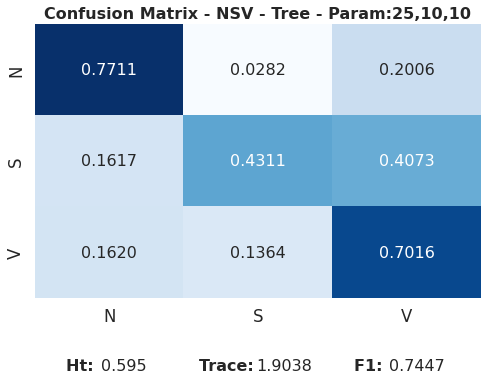

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_dt, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df,y_pred_dt).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, tree.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - Tree - Param:25,10,10",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### N-M

In [ ]:
decision_tree_mn = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=8, min_samples_leaf=8, random_state=seed)
decision_tree_mn.fit(scaled_X_train_df,y_mn_train_df)

y_pred_dt_mn = decision_tree_mn.predict(scaled_X_val_df)

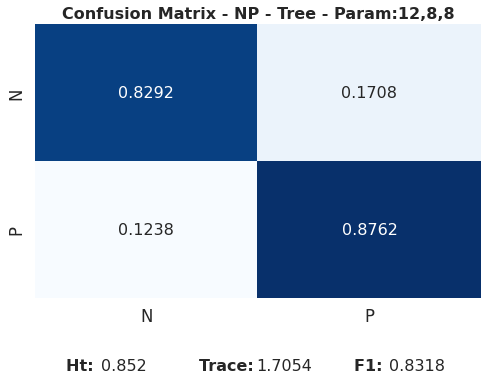

In [ ]:
# Metrics
matrix = confusion_matrix(y_mn_val_df, y_pred_dt_mn, labels=["N", "M"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_mn_val_df, y_pred_dt_mn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nm, (1-decision_tree_mn.predict_proba(scaled_X_val_df)).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','P'], index = ['N', 'P'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NP - Tree - Param:12,8,8",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### S-V

In [ ]:
decision_tree_sv = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=140, min_samples_leaf=140, random_state=seed)
decision_tree_sv.fit(scaled_X_sv_train_df,y_sv_train_df)

y_pred_dt_sv = decision_tree_sv.predict(scaled_X_sv_val_df)

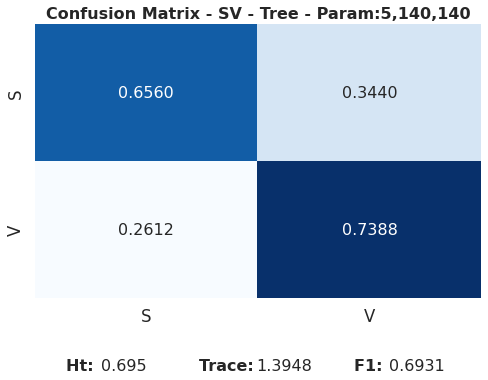

In [ ]:
# Metrics
matrix = confusion_matrix(y_sv_val_df, y_pred_dt_sv, labels=["S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_sv_val_df, y_pred_dt_sv).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_sv, decision_tree_sv.predict_proba(scaled_X_sv_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['S','V'], index = ['S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - SV - Tree - Param:5,140,140",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### Combine NM and SV

In [ ]:
prediction_NM = decision_tree_mn.predict(scaled_X_val_df)

In [ ]:
scaled_X_val_df_np = scaled_X_val_df.to_numpy()
# Extraction of the non N beats (M)
m_beats_list_wide = []

for i,beat in enumerate(prediction_NM):
  if beat=='M':
    m_beats_list_wide.append(scaled_X_val_df_np[i])


m_beats_list_wide = np.asarray(m_beats_list_wide)

In [ ]:
# Make the predictions for the non N beats 
prediction_SV = decision_tree_sv.predict(m_beats_list_wide)

In [ ]:
# Substitute the M value with the new prediction
new_pred_list = []
new_pred_one_hot_list = []
# Composition of the new predictor vector for SV
count=0
for i,beat in enumerate(prediction_NM):
  if beat=='N':
    new_pred_one_hot_list.append([1.,0.,0.])
    new_pred_list.append('N')
  else:
    if prediction_SV[count] == 'S':
      new_pred_one_hot_list.append([0.,1.,0.])
      new_pred_list.append('S')
    else:
      new_pred_one_hot_list.append([0.,0.,1.])
      new_pred_list.append('V')
    count=count+1

new_pred_one_hot = np.asarray(new_pred_one_hot_list)

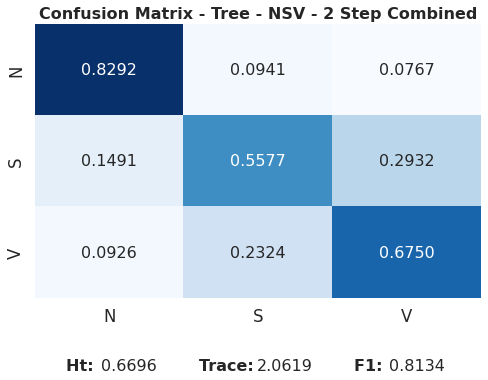

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, new_pred_list, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, new_pred_list).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, new_pred_one_hot, average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - Tree - NSV - 2 Step Combined",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

## B) KNN

### N-S-V

Non Normalized Dataset

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_df,y_train_df)

y_pred_knn = knn.predict(X_val_df)

matrix = confusion_matrix(y_val_df, y_pred_knn)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

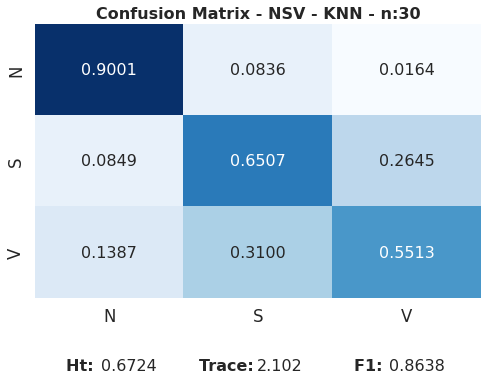

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_knn, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df,y_pred_knn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, knn.predict_proba(X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - KNN Not Scaled - n:20",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

Normalized Dataset - Non weighted

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(scaled_X_train_df,y_train_df)

y_pred_knn = knn.predict(scaled_X_val_df)

matrix = confusion_matrix(y_val_df, y_pred_knn)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

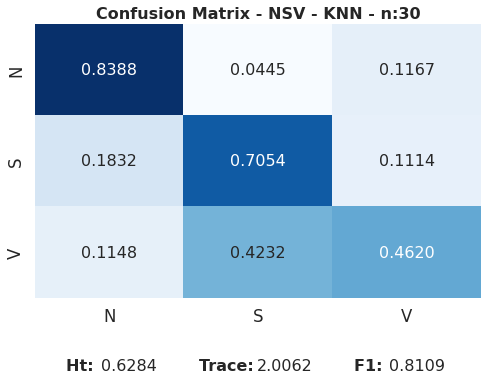

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_knn, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df,y_pred_knn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, knn.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - KNN Scaled- n:20",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

Normalized Dataset - Weighted

In [ ]:
X_train_knn = deepcopy(scaled_X_train_df)
X_val_knn = deepcopy(scaled_X_val_df)

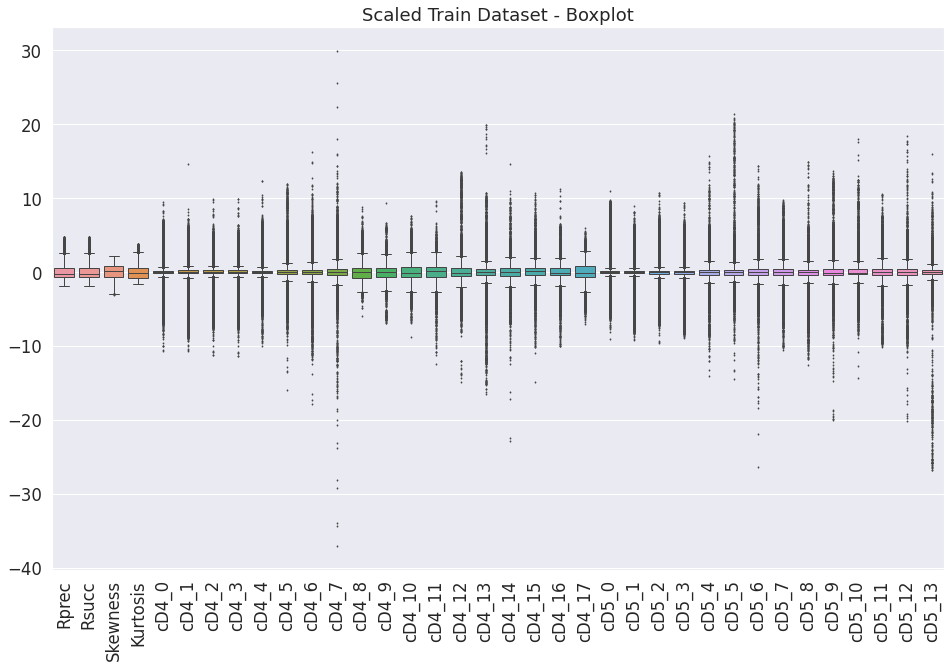

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Scaled Train Dataset - Boxplot")
ax = sns.boxplot(data = scaled_X_train_df, linewidth=1,fliersize=1)
ax.set_xticklabels(scaled_X_train_df.columns, rotation=90)
plt.show()

In [ ]:
X_train_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]=X_train_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]*14
X_val_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]=X_val_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]*14

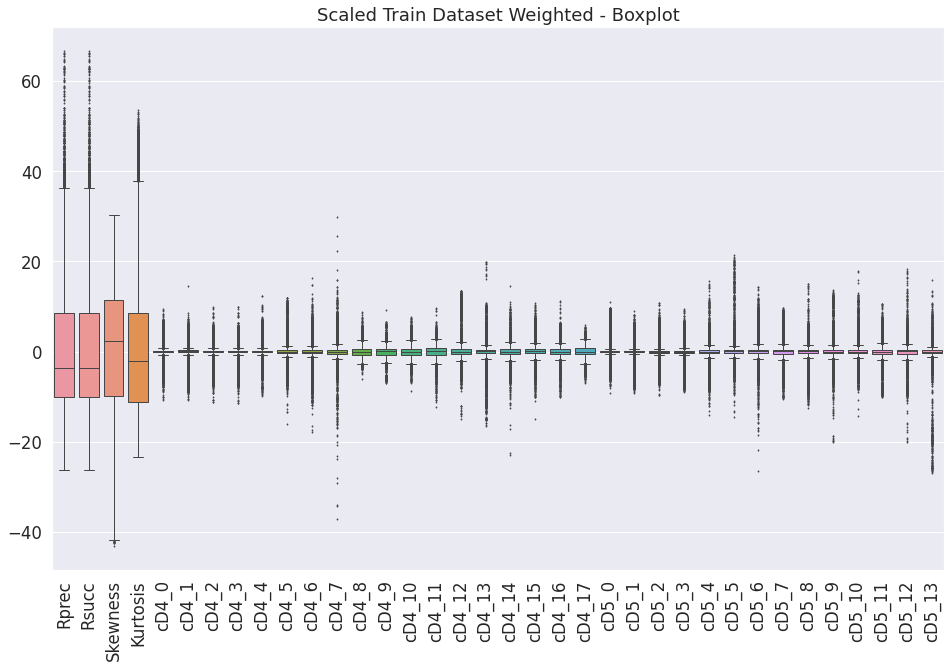

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Scaled Train Dataset Weighted - Boxplot")
ax = sns.boxplot(data = X_train_knn, linewidth=1,fliersize=1)
ax.set_xticklabels(scaled_X_train_df.columns, rotation=90)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20) #20 con 2.3089 best per ora
knn.fit(X_train_knn,y_train_df)

y_pred_knn = knn.predict(X_val_knn)

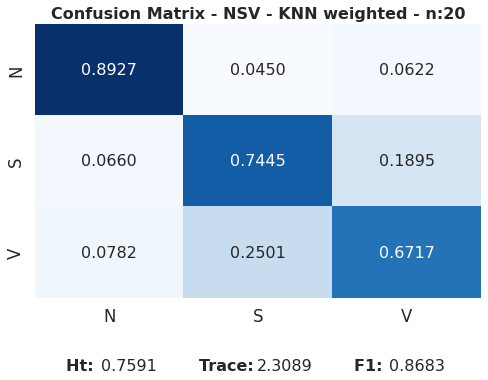

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_knn, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df,y_pred_knn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, knn.predict_proba(X_val_knn).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - KNN weighted - n:20",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/FinalModels/knn_nsv.sav'
pickle.dump(knn, open(filename, 'wb'))

"\n# some time later...\n \n# load the model from disk\nloaded_model = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, Y_test)\nprint(result)\n"

### MN

In [ ]:
knn_nm = KNeighborsClassifier(n_neighbors=20) # Best 20 for trace, more balanced = 100
knn_nm.fit(X_train_knn, y_mn_train_df)

y_pred_knn_mn = knn_nm.predict(X_val_knn)

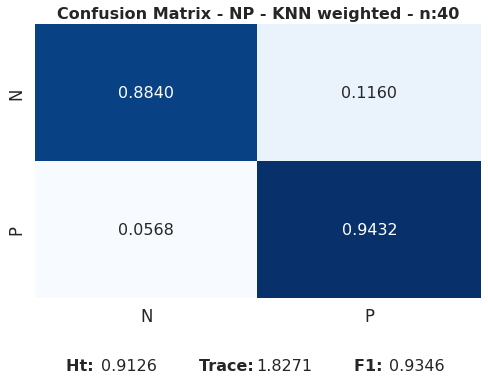

In [ ]:
# Metrics
matrix = confusion_matrix(y_mn_val_df, y_pred_knn_mn,labels=["N", "M"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_mn_val_df, y_pred_knn_mn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nm, (1-knn_nm.predict_proba(scaled_X_val_df)).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','P'], index = ['N', 'P'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NP - KNN weighted - n:40",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/FinalModels/knn_nm.sav'
pickle.dump(knn, open(filename, 'wb'))

### S-V

#### SV Dataset For KNN

In [ ]:
X_sv_train_knn = deepcopy(scaled_X_sv_train_df)
X_sv_val_knn = deepcopy(scaled_X_sv_val_df)

In [ ]:
X_sv_train_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]=X_sv_train_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]*14
X_sv_val_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]=X_sv_val_knn[['Rprec', 'Rsucc', 'Kurtosis', 'Skewness']]*14

#### Gridsearch

In [ ]:
n_neigh = list(range(100))
n_neigh[0] = 101
classifier =  KNeighborsClassifier()
parameters = {'n_neighbors': n_neigh}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = trace_scikit, verbose=2, n_jobs=-1, refit=True, error_score="raise")

In [ ]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_sv_train_knn,y_sv_train_df)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.770550 using {'n_neighbors': 44}
0.755595 (0.113967) with: {'n_neighbors': 101}
0.764075 (0.084146) with: {'n_neighbors': 1}
0.762371 (0.098732) with: {'n_neighbors': 2}
0.762608 (0.093508) with: {'n_neighbors': 3}
0.758536 (0.098813) with: {'n_neighbors': 4}
0.760838 (0.091042) with: {'n_neighbors': 5}
0.752508 (0.098375) with: {'n_neighbors': 6}
0.761172 (0.086828) with: {'n_neighbors': 7}
0.760589 (0.090903) with: {'n_neighbors': 8}
0.761731 (0.085599) with: {'n_neighbors': 9}
0.757515 (0.091836) with: {'n_neighbors': 10}
0.760438 (0.088072) with: {'n_neighbors': 11}
0.759680 (0.093980) with: {'n_neighbors': 12}
0.761258 (0.091067) with: {'n_neighbors': 13}
0.764136 (0.097200) with: {'n_neighbors': 14}
0.763892 (0.095687) with: {'n_neighbors': 15}
0.765795 (0.098568) with: {'n_neighbors': 16}
0.764698 (0.098515) with: {'n_neighbors': 17}
0.765310 (0.099821) with: {'n_neighbors': 18}
0.765811 (0.099020) with: {'n_neighbors': 19}
0.766209 (0.1003

In [ ]:
knn_sv = KNeighborsClassifier(n_neighbors=44)
knn_sv.fit(X_sv_train_knn,y_sv_train_df)

y_pred_knn_sv = knn_sv.predict(X_sv_val_knn)

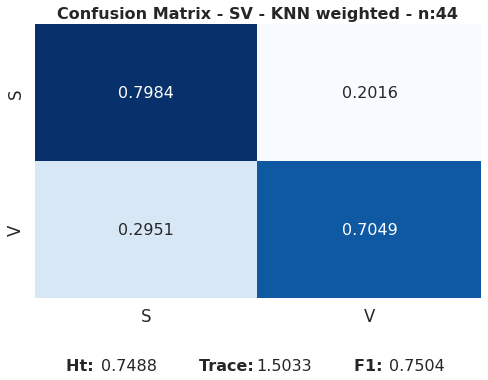

In [ ]:
# Metrics
matrix = confusion_matrix(y_sv_val_df, y_pred_knn_sv, labels=["S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_sv_val_df, y_pred_knn_sv).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_sv, knn_sv.predict_proba(X_sv_val_knn).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['S','V'], index = ['S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - SV - KNN weighted - n:44",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/FinalModels/knn_sv.sav'
pickle.dump(knn, open(filename, 'wb'))

### Combine NM and SV

In [ ]:
prediction_NM = knn_nm.predict(X_val_knn)

In [ ]:
X_val_knn_np = X_val_knn.to_numpy()
# Extraction of the non N beats (M)
m_beats_list_wide = []

for i,beat in enumerate(prediction_NM):
  if beat=='M':
    m_beats_list_wide.append(X_val_knn_np[i])


m_beats_list_wide = np.asarray(m_beats_list_wide)

In [ ]:
# Make the predictions for the non N beats 
prediction_SV = knn_sv.predict(m_beats_list_wide)

In [ ]:
# Substitute the M value with the new prediction
new_pred_list = []
new_pred_one_hot_list = []
# Composition of the new predictor vector for SV
count=0
for i,beat in enumerate(prediction_NM):
  if beat=='N':
    new_pred_one_hot_list.append([1.,0.,0.])
    new_pred_list.append('N')
  else:
    if prediction_SV[count] == 'S':
      new_pred_one_hot_list.append([0.,1.,0.])
      new_pred_list.append('S')
    else:
      new_pred_one_hot_list.append([0.,0.,1.])
      new_pred_list.append('V')
    count=count+1

new_pred_one_hot = np.asarray(new_pred_one_hot_list)

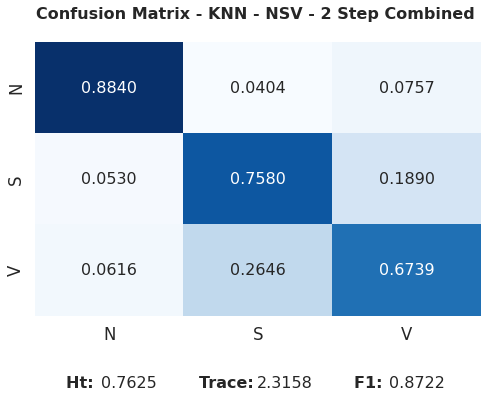

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, new_pred_list, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, new_pred_list).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, new_pred_one_hot, average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - KNN - NSV - 2 Step Combined \n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

## C) FFNN

### N-S-V

In [ ]:
model_mlp=MLPClassifier(hidden_layer_sizes=(32,16,8), 
                    alpha=0.01, 
                    learning_rate = "adaptive",
                    max_iter=100,
                    shuffle=True,
                    verbose = False,
                    early_stopping=True,
                    random_state=28)

model_mlp.fit(scaled_X_train_df,y_train_df)
y_pred_ffnn = model_mlp.predict(scaled_X_val_df)

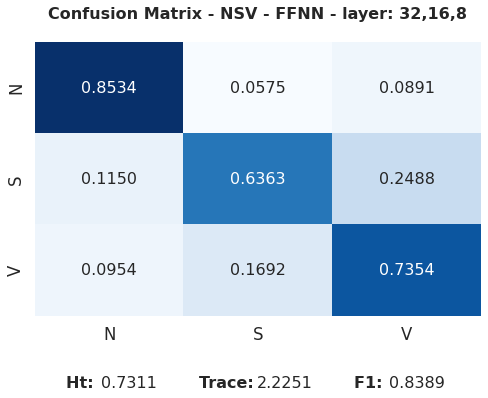

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_ffnn, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, y_pred_ffnn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, model_mlp.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - FFNN - layer: 32,16,8\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

In [ ]:
# save the model to disk
filename = '/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/FinalModels/ffnn_snv.sav'
pickle.dump(knn, open(filename, 'wb'))

### N-M

In [ ]:
model_mlp_nm=MLPClassifier(hidden_layer_sizes=(10,8,5), 
                    alpha=0.01, 
                    learning_rate = "adaptive",
                    max_iter=50,
                    shuffle=True,
                    verbose = False,
                    early_stopping=True,
                    random_state=2)

model_mlp_nm.fit(scaled_X_train_df,y_mn_train_df)
y_pred_ffnn = model_mlp_nm.predict(scaled_X_val_df)

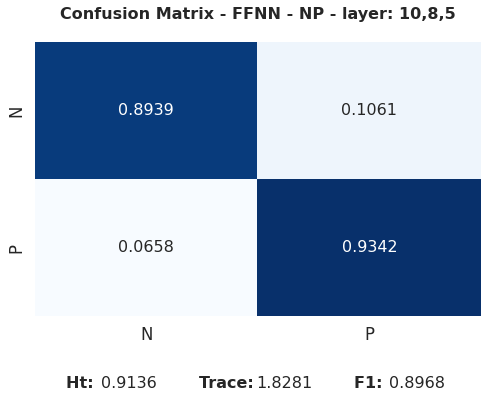

In [ ]:
# Metrics
matrix = confusion_matrix(y_mn_val_df, y_pred_ffnn, labels=["N", "M"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_mn_val_df, y_pred_ffnn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nm, (1-model_mlp_nm.predict_proba(scaled_X_val_df)).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','P'], index = ['N', 'P'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - FFNN - NP - layer: 10,8,5\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### S-V

In [ ]:
model_mlp_sv=MLPClassifier(hidden_layer_sizes=(16,8,2), 
                    alpha=0.01, 
                    learning_rate = "adaptive",
                    max_iter=100,
                    shuffle=True,
                    verbose = False,
                    early_stopping=True,
                    random_state=8)

model_mlp_sv.fit(scaled_X_sv_train_df,y_sv_train_df)
y_pred_ffnn = model_mlp_sv.predict(scaled_X_sv_val_df)

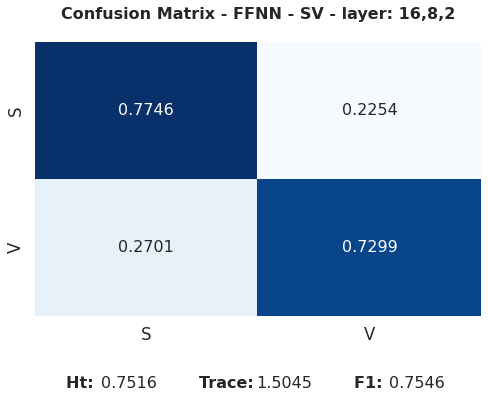

In [ ]:
# Metrics
matrix = confusion_matrix(y_sv_val_df, y_pred_ffnn, labels=["S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_sv_val_df, y_pred_ffnn).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_sv, model_mlp_sv.predict_proba(scaled_X_sv_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['S','V'], index = ['S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - FFNN - SV - layer: 16,8,2\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### Combine NM and SV

In [ ]:
prediction_NM = model_mlp_nm.predict(scaled_X_val_df)

In [ ]:
scaled_X_val_df_np = scaled_X_val_df.to_numpy()
# Extraction of the non N beats (M)
m_beats_list_wide = []

for i,beat in enumerate(prediction_NM):
  if beat=='M':
    m_beats_list_wide.append(scaled_X_val_df_np[i])


m_beats_list_wide = np.asarray(m_beats_list_wide)

In [ ]:
# Make the predictions for the non N beats 
prediction_SV = model_mlp_sv.predict(m_beats_list_wide)

In [ ]:
# Substitute the M value with the new prediction
new_pred_list = []
new_pred_one_hot_list = []
# Composition of the new predictor vector for SV
count=0
for i,beat in enumerate(prediction_NM):
  if beat=='N':
    new_pred_one_hot_list.append([1.,0.,0.])
    new_pred_list.append('N')
  else:
    if prediction_SV[count] == 'S':
      new_pred_one_hot_list.append([0.,1.,0.])
      new_pred_list.append('S')
    else:
      new_pred_one_hot_list.append([0.,0.,1.])
      new_pred_list.append('V')
    count=count+1

new_pred_one_hot = np.asarray(new_pred_one_hot_list)

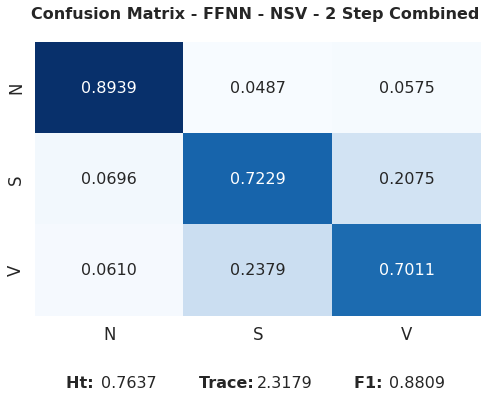

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, new_pred_list, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, new_pred_list).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, new_pred_one_hot, average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - FFNN - NSV - 2 Step Combined \n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

## D) Ensemble

### a. Random Forest

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=30)#, criterion='entropy', max_depth=50, min_samples_split=15, min_samples_leaf=15)
rand_forest.fit(X_train_df,y_train_df)

y_pred_rf = rand_forest.predict(X_val_df)

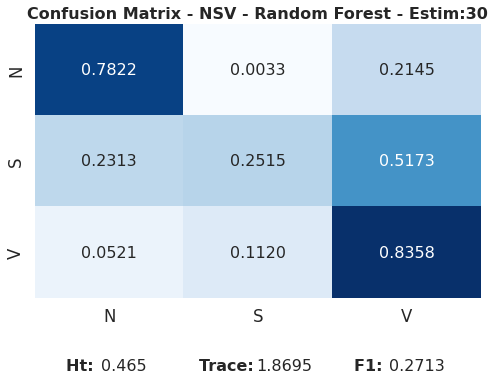

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_rf)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df,y_pred_rf).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, rand_forest.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - Random Forest - Estim:30",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### a. AdaBoost

Execution time for 10 Estimators (decision Tree) = 2:35s

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=30)
adaboost.fit(scaled_X_train_df,y_train_df)

y_pred_ab = adaboost.predict(scaled_X_val_df)

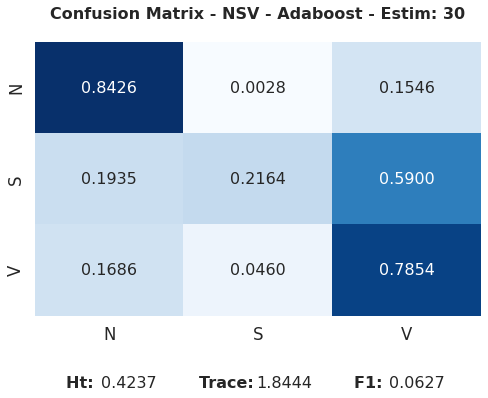

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_ab, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, y_pred_ab).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, adaboost.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - Adaboost - Estim: 30\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### b. Gradient Boosting

Execution time for 10 estimators with depth=20 --> 9 minuti

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=10)
grad_boost.fit(scaled_X_train_df,y_train_df)

y_pred_gb = grad_boost.predict(scaled_X_val_df)

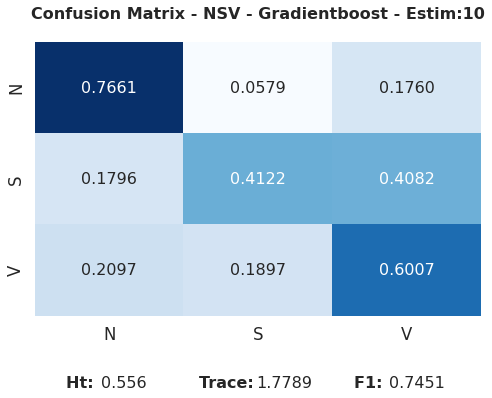

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_gb, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, y_pred_gb).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, grad_boost.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - Gradientboost - Estim:10\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

## E) SVC

In [ ]:
model_svc = SVC(C=0.1, kernel='poly', verbose=3, probability=True)
model_svc.fit(scaled_X_train_df,y_train_df)

y_pred_svm = model_svc.predict(scaled_X_val_df)

[LibSVM]

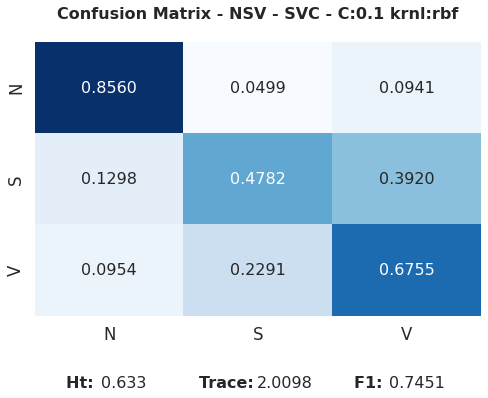

In [ ]:
# Metrics
matrix = confusion_matrix(y_val_df, y_pred_svm, labels=["N", "S", "V"])
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val_df, y_pred_svm).round(4)
#f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, model.predict_proba(scaled_X_val_df).round(), average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - SVC - C:0.1 krnl:rbf\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

# 6️⃣ Hybrid Model

## A) Hybrid Models N-S-V

### Callbacks

In [ ]:
from datetime import datetime
exps_dir="/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/Models"

def create_folders_and_callbacks(model_name):

  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = [
                tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
                tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=3, factor=0.5, min_lr=1e-5)
              ]

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)
  print("Checkpoint Directory: ", ckpt_dir)
  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=True,  # True to save only the best epoch
                                                     monitor='val_accuracy',
                                                     mode='max') 
  callbacks.append(ckpt_callback)


  return (callbacks, exp_dir)

### Hybrid Model NSV


In [ ]:
input_shape_CNN=(130,2)
input_shape_wide=(36)

In [ ]:
my_model_name='HybridModelV4'

In [ ]:
def build_hybrid_v4(input_shape_CNN, input_shape_wide):
  # define two sets of inputs
  inputA = tfkl.Input(name="InputWideFeatures", shape=input_shape_wide)
  inputB = tfkl.Input(name="InputConv", shape=input_shape_CNN)

  # the first branch operates on the wide features
  dense1A = tfkl.Dense(64,  name="Dense1A", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(inputA)
  dense2A = tfkl.Dense(32,  name="Dense2A", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense1A)
  outLevelA = tfkl.Dense(16,  name="outLevelA", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense2A)


  # the second branch opreates on the signals
  blck1 = tfkl.Conv1D(32, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage1")(inputB)
  blck1 = tfkl.Conv1D(32, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage2")(blck1)
  blck1 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block1",)(blck1)

  blck2 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage1")(blck1)
  blck2 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage2")(blck2)
  blck2 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block2")(blck2)

  blck3 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage1")(blck2)
  blck3 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage2")(blck3)
  blck3 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage3")(blck3)
  blck3 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block3")(blck3)

  

  flattening_layer = tfkl.GlobalMaxPool1D(name = "GMP")(blck3)
  outLevelB = tfkl.Dropout(0.4, seed=seed, name = "outLevelB")(flattening_layer)

  # combine the output of the two branches
  combined = tfkl.concatenate([outLevelA, outLevelB], name="Concat_Layer")


  # apply a FC layer on the combined outputs
  hidden= tfkl.Dense(128,  name="Hidden1", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(combined)
  hidden = tfkl.Dropout(0.3, seed=seed, name = "HiddenDropout1")(hidden)
  hidden= tfkl.Dense(64,  name="Hidden2", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)
  hidden = tfkl.Dropout(0.3, seed=seed, name = "HiddenDropout2")(hidden)

  # Output
  output = tfkl.Dense(3, name="OutputHybrid", activation='sigmoid', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)

  # Create the model
  model = tfk.Model(inputs=[inputA, inputB], outputs=output, name=my_model_name)

  # Compile the model
  model.compile(optimizer='adam', #tf.keras.optimizers.SGD(learning_rate=0.01),#'adam',
                loss=[focal_loss(alpha=.25, gamma=2)],
                metrics=['accuracy', bal_acc, trace],
                run_eagerly=True)
  return model

Model: "HybridModelV4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputConv (InputLayer)         [(None, 130, 2)]     0           []                               
                                                                                                  
 Conv1D_Block1_Stage1 (Conv1D)  (None, 128, 32)      224         ['InputConv[0][0]']              
                                                                                                  
 Conv1D_Block1_Stage2 (Conv1D)  (None, 126, 32)      3104        ['Conv1D_Block1_Stage1[0][0]']   
                                                                                                  
 MaxPool1D_Block1 (MaxPooling1D  (None, 63, 32)      0           ['Conv1D_Block1_Stage2[0][0]']   
 )                                                                                    

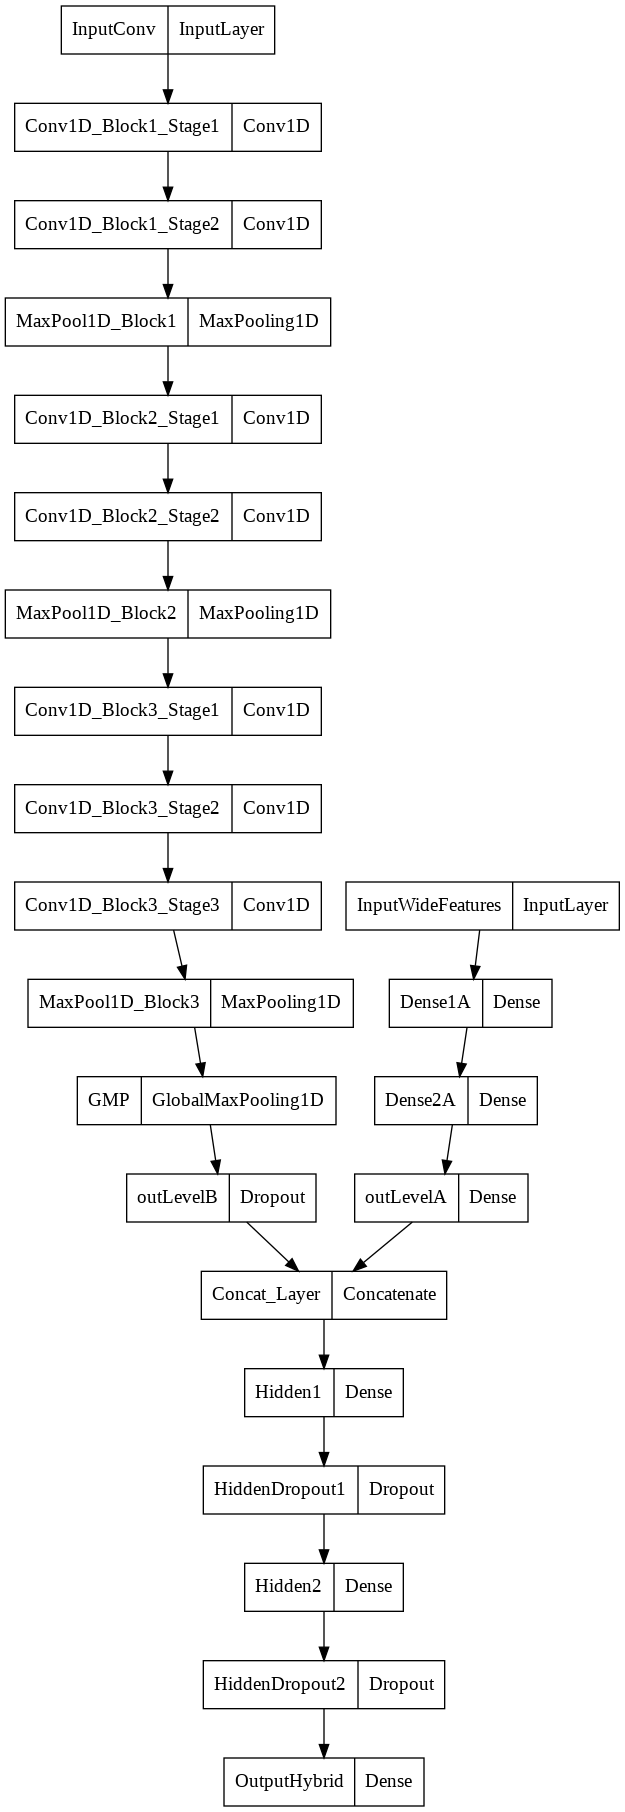

In [ ]:
model = build_hybrid_v4(input_shape_CNN, input_shape_wide)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

In [ ]:
input_train_cnn = trainDOWN
input_train_wide = normalizer(X_train_df_keras)

input_val_cnn = valDOWN
input_val_wide = normalizer(X_val_df_keras)

In [ ]:
(my_callbacks, exp_dir) = create_folders_and_callbacks(model_name=my_model_name)

history = model.fit(x = [input_train_wide,input_train_cnn], 
                    y = one_hot_labels_nsv,
                    validation_data=([input_val_wide,input_val_cnn], one_hot_labelsV_nsv),
                    epochs=20, 
                    batch_size=3600,
                    class_weight=class_weights_alt,
                    callbacks = my_callbacks)

#performancePlotF1(history, 0, str(my_model_name + "_f1"), show=True, save = True, folder=exp_dir)
#performancePlotHT(history, 0, str(my_model_name + "_ht"), show=True, save = True, folder=exp_dir)

Checkpoint Directory:  /content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridModelV4_Jan10_12-25-22/ckpts
Epoch 1/20
51/51 [==============================] - 15s 297ms/step - loss: 0.0237 - accuracy: 0.9282 - bal_acc: 0.0948 - trace: 0.4195 - val_loss: 0.0278 - val_accuracy: 0.8198 - val_bal_acc: 0.2660 - val_trace: 225.4558 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - 15s 294ms/step - loss: 0.0096 - accuracy: 0.9560 - bal_acc: 0.3369 - trace: 0.6423 - val_loss: 0.0356 - val_accuracy: 0.7942 - val_bal_acc: 0.3340 - val_trace: 225.5113 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - 15s 296ms/step - loss: 0.0059 - accuracy: 0.9729 - bal_acc: 0.4979 - trace: 0.8250 - val_loss: 0.0369 - val_accuracy: 0.7975 - val_bal_acc: 0.4538 - val_trace: 225.5875 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - 16s 306ms/step - loss: 0.0048 - accuracy: 0.9788 - bal_acc: 0.6414 - trace: 0.8747 - val_loss: 0.0357 - val_accuracy: 0

Norm Matrix Trace: 1.965544188112257


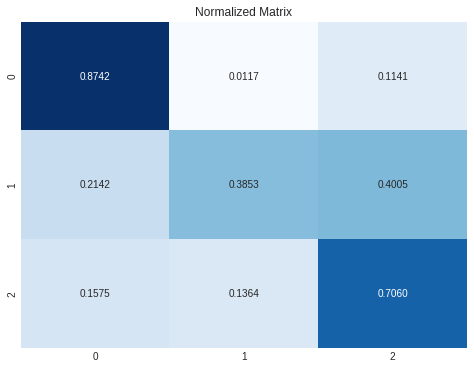

In [ ]:
prediction = model.predict([input_val_wide,input_val_cnn])
decoded_validation = np.argmax(one_hot_labelsV_nsv, axis=1)
decoded_prediction = np.argmax(np.around(prediction), axis=1)

matrix = confusion_matrix(decoded_validation, decoded_prediction)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.title("Normalized Matrix")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False);
print("Norm Matrix Trace:", norm_matrix.trace())

## B) Hybrid Models N-M

### Callbacks

In [ ]:
from datetime import datetime
exps_dir="/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/Models"

def create_folders_and_callbacks(model_name):

  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = [
                tfk.callbacks.EarlyStopping(monitor='val_f1', mode='max', patience=7, restore_best_weights=True),
                tfk.callbacks.ReduceLROnPlateau(monitor='val_f1', mode='max', patience=2, factor=0.5, min_lr=1e-5)
              ]

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)
  print("Checkpoint Directory: ", ckpt_dir)
  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=True,  # True to save only the best epoch
                                                     monitor='val_f1',
                                                     mode='max') 
  callbacks.append(ckpt_callback)


  return (callbacks, exp_dir)

### Hybrid Model NP

In [ ]:
my_model_name = "Summary"

In [ ]:
input_shape_CNN=(130,2)
input_shape_wide=(36)

In [ ]:
def build_hybrid_v5_fl_nm(input_shape_CNN, input_shape_wide):
  # define two sets of inputs
  inputA = tfkl.Input(name="InputWideFeatures", shape=input_shape_wide)
  inputB = tfkl.Input(name="InputConv", shape=input_shape_CNN)

  # the first branch operates on the wide features
  dense1A = tfkl.Dense(64,  name="Dense1A_64", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(inputA)
  dense1A = tfkl.Dropout(0.1, name = "Dense1A_Dropout_0.1", seed=seed)(dense1A)
  dense2A = tfkl.Dense(32,  name="Dense2A_32", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense1A)
  dense2A = tfkl.Dropout(0.1, name = "Dense2A_Dropout_0.1", seed=seed)(dense2A)
  outLevelA = tfkl.Dense(16,  name="outLevelA_16", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense2A)


  # the second branch opreates on the signals
  blck1 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage1_f64_k3")(inputB)
  blck1 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block1_s2",)(blck1)

  blck2 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage1_f128_k3")(blck1)
  blck2 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block2_s2")(blck2)

  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage1_f254_k3")(blck2)
  blck3 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block3_s2")(blck3)

  flattening_layer = tfkl.GlobalMaxPool1D(name = "GMP")(blck3)
  outLevelB = tfkl.Dropout(0.3, seed=seed, name = "outLevelB_Dropout_0.3")(flattening_layer)

  # combine the output of the two branches
  combined = tfkl.concatenate([outLevelA, outLevelB], name="Concat_Layer")


  # apply a FC layer on the combined outputs
  hidden= tfkl.Dense(64,  name="Hidden1_64", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(combined)
  hidden = tfkl.Dropout(0.3, seed=seed, name = "HiddenDropout1_0.3")(hidden)
  hidden= tfkl.Dense(16,  name="Hidden2_16", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)
  hidden = tfkl.Dropout(0.3, seed=seed, name = "HiddenDropout2_0.3")(hidden)

  # Output
  output = tfkl.Dense(2, name="OutputHybrid", activation='softmax', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)

  # Create the model
  model = tfk.Model(inputs=[inputA, inputB], outputs=output, name=my_model_name)

  # Compile the model
  model.compile(optimizer='adam', #tf.keras.optimizers.SGD(learning_rate=0.01),#'adam',
                loss=[focal_loss(alpha=.25, gamma=3)], #tf.keras.losses.categorical_crossentropy,
                metrics=['accuracy', f1],
                run_eagerly=True)
  return model

Model: "Summary"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputConv (InputLayer)         [(None, 130, 2)]     0           []                               
                                                                                                  
 Conv1D_Block1_Stage1_f64_k3 (C  (None, 128, 64)     448         ['InputConv[0][0]']              
 onv1D)                                                                                           
                                                                                                  
 MaxPool1D_Block1_s2 (MaxPoolin  (None, 64, 64)      0           ['Conv1D_Block1_Stage1_f64_k3[0][
 g1D)                                                            0]']                             
                                                                                            

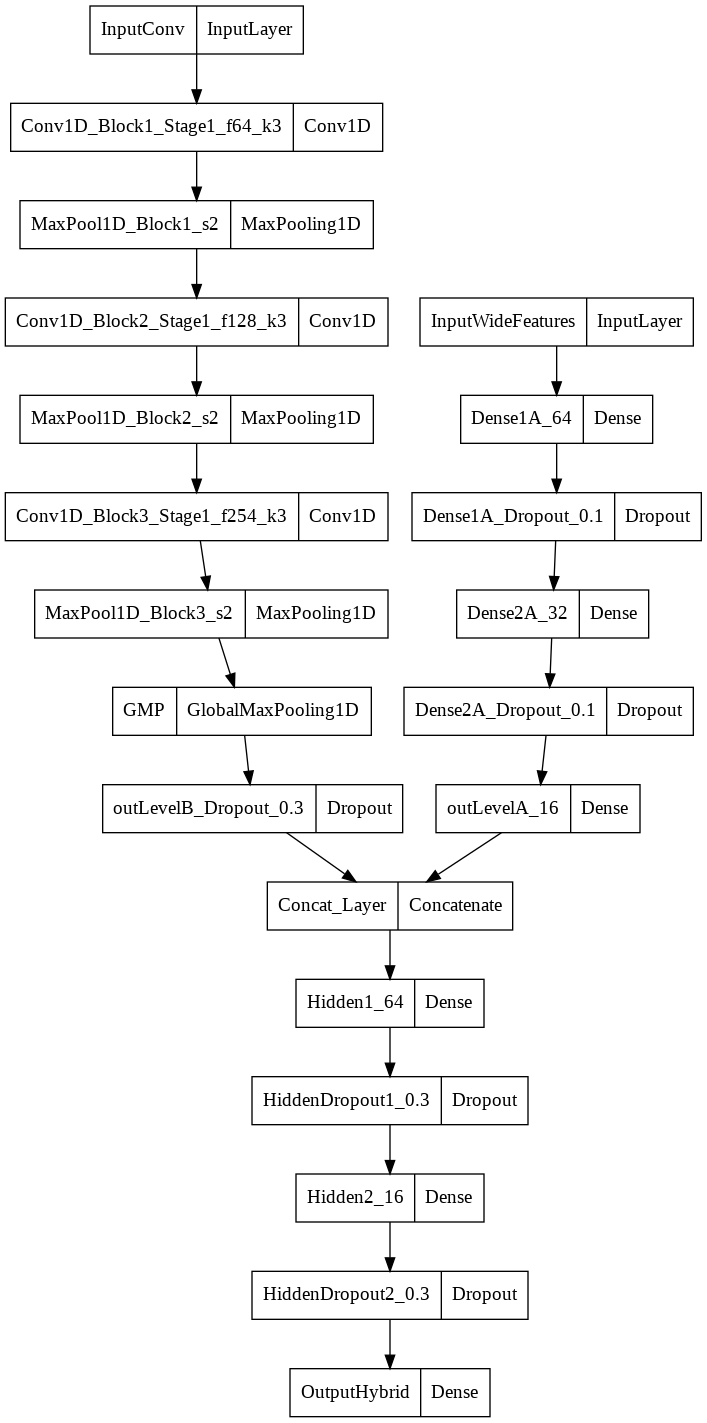

In [ ]:
model = build_hybrid_v5_fl_nm(input_shape_CNN, input_shape_wide)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

### Automatic Search

#### Define a new folder for all the trials

In [ ]:
from datetime import datetime
exps_dir="/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch"

def create_folders_and_callbacks(model_name):

  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = [
                tfk.callbacks.EarlyStopping(monitor='val_f1', mode='max', patience=7, restore_best_weights=True),
                tfk.callbacks.ReduceLROnPlateau(monitor='val_f1', mode='max', patience=2, factor=0.5, min_lr=1e-5)
              ]

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)
  print("Checkpoint Directory: ", ckpt_dir)
  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=True,  # True to save only the best epoch
                                                     monitor='val_f1',
                                                     mode='max') 
  callbacks.append(ckpt_callback)


  return (callbacks, exp_dir)

#### Define the model, shape and trials number

In [ ]:
input_shape_CNN=(130,2)
input_shape_wide=(36)

block = "A"
trials = 20

In [ ]:
def build_hybrid_v5_fl_nm(input_shape_CNN, input_shape_wide):
  # define two sets of inputs
  inputA = tfkl.Input(name="InputWideFeatures", shape=input_shape_wide)
  inputB = tfkl.Input(name="InputConv", shape=input_shape_CNN)

  # the first branch operates on the wide features
  dense1A = tfkl.Dense(64,  name="Dense1A", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(inputA)
  dense1A = tfkl.Dropout(0.1, name = "Dense1A_Dropout", seed=seed)(dense1A)
  dense2A = tfkl.Dense(32,  name="Dense2A", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense1A)
  dense2A = tfkl.Dropout(0.1, name = "Dense2A_Dropout", seed=seed)(dense2A)
  outLevelA = tfkl.Dense(16,  name="outLevelA", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense2A)


  # the second branch opreates on the signals
  blck1 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage1")(inputB)
  blck1 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block1",)(blck1)

  blck2 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage1")(blck1)
  blck2 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block2")(blck2)

  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage1")(blck2)
  blck3 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block3")(blck3)

  flattening_layer = tfkl.GlobalMaxPool1D(name = "GMP")(blck3)
  outLevelB = tfkl.Dropout(0.3, seed=seed, name = "outLevelB")(flattening_layer)

  # combine the output of the two branches
  combined = tfkl.concatenate([outLevelA, outLevelB], name="Concat_Layer")


  # apply a FC layer on the combined outputs
  hidden= tfkl.Dense(64,  name="Hidden1", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(combined)
  hidden = tfkl.Dropout(0.3, seed=seed, name = "HiddenDropout1")(hidden)
  hidden= tfkl.Dense(16,  name="Hidden2", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)
  hidden = tfkl.Dropout(0.3, seed=seed, name = "HiddenDropout2")(hidden)

  # Output
  output = tfkl.Dense(2, name="OutputHybrid", activation='softmax', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)

  # Create the model
  model = tfk.Model(inputs=[inputA, inputB], outputs=output, name=my_model_name)

  # Compile the model
  model.compile(optimizer='adam', #tf.keras.optimizers.SGD(learning_rate=0.01),#'adam',
                loss=[focal_loss(alpha=.25, gamma=3)], #tf.keras.losses.categorical_crossentropy,
                metrics=['accuracy', f1],
                run_eagerly=True)
  return model

#### Define the input 

In [ ]:
input_train_cnn = trainDOWN
input_train_wide = normalizer(X_mn_train_df_keras)

input_val_cnn = valDOWN
input_val_wide = normalizer(X_mn_val_df_keras)

In [ ]:
class_weights_alt_nm

{0: 0.5383597573140249, 1: 7.0172466539196945}

#### Start the training

In [ ]:
best_trace = 0
best_model_trace = ""
best_ht = 0
best_model_ht = "" 

model_list = []
ht_list = []
norm_trace_list = []

print("START TRAINING FOR ", trials, " MODELS")
for i in range(trials):

  my_model_name=str('HybridV5_FL_NM_trial_' + str(i) + "_block_" + block)
  print("\n\nEvaluation of model: ", my_model_name)
  print("_"*260)
  # Build model
  model = build_hybrid_v5_fl_nm(input_shape_CNN, input_shape_wide)

  (my_callbacks, exp_dir) = create_folders_and_callbacks(model_name=my_model_name)

  history = model.fit(x = [input_train_wide,input_train_cnn], 
                      y = one_hot_labels_nm,
                      validation_data=([input_val_wide,input_val_cnn], one_hot_labelsV_nm),
                      epochs=20, 
                      batch_size=3600,
                      class_weight=class_weights_alt,
                      callbacks = my_callbacks).history
  
  

  prediction = model.predict([input_val_wide,input_val_cnn])
  decoded_validation = np.argmax(one_hot_labelsV_nm, axis=1)
  decoded_prediction = np.argmax(np.around(prediction), axis=1)

  matrix = confusion_matrix(decoded_validation, decoded_prediction)
  norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

  model_ht = 2/((1/norm_matrix[0][0])+(1/norm_matrix[1][1]))
  norm_trace = norm_matrix.trace()



  print("\n Model Performance...")
  print("Norm Matrix Trace Norm:\t", (norm_trace/2))
  print("Norm Matrix Trace:\t", norm_trace)
  print("Matrix Ht:\t\t", ht)

  print("\n Saving plot and confusion matrix...")
  normConfusionMatrix(norm_matrix, my_model_name, show=False, save = True, folder=exp_dir)
  performancePlotF1(history, 0, str(my_model_name + "_f1"), show=False, save = True, folder=exp_dir)

  if(norm_trace>best_trace):
    best_trace = norm_trace
    best_model_trace = my_model_name

  if(model_ht>best_ht):
    best_ht = model_ht
    best_model_ht = my_model_name

  model_list.append(my_model_name)
  norm_trace_list.append(norm_trace)
  ht_list.append(model_ht)
  
  print("_"*260)

START TRAINING FOR  20  MODELS


Evaluation of model:  HybridV5_FL_NM_trial_0_block_A
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Checkpoint Directory:  /content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridV5_FL_NM_trial_0_block_A_Jan10_00-56-06/ckpts
Epoch 1/20
51/51 [==============================] - ETA: 0s - loss: 0.0294 - accuracy: 0.8895 - f1: 0.5202

51/51 [==============================] - 15s 303ms/step - loss: 0.0294 - accuracy: 0.8895 - f1: 0.5202 - val_loss: 0.0166 - val_accuracy: 0.9285 - val_f1: 0.5123 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9354 - f1: 0.6272

51/51 [==============================] - 15s 294ms/step - loss: 0.0145 - accuracy: 0.9354 - f1: 0.6272 - val_loss: 0.0170 - val_accuracy: 0.8417 - val_f1: 0.5695 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9489 - f1: 0.7461

51/51 [==============================] - 15s 293ms/step - loss: 0.0093 - accuracy: 0.9489 - f1: 0.7461 - val_loss: 0.0189 - val_accuracy: 0.8126 - val_f1: 0.6015 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9598 - f1: 0.8242

51/51 [==============================] - 15s 301ms/step - loss: 0.0071 - accuracy: 0.9598 - f1: 0.8242 - val_loss: 0.0220 - val_accuracy: 0.8121 - val_f1: 0.6130 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9664 - f1: 0.8614

51/51 [==============================] - 15s 295ms/step - loss: 0.0060 - accuracy: 0.9664 - f1: 0.8614 - val_loss: 0.0240 - val_accuracy: 0.8350 - val_f1: 0.6986 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9718 - f1: 0.8861

51/51 [==============================] - 15s 295ms/step - loss: 0.0054 - accuracy: 0.9718 - f1: 0.8861 - val_loss: 0.0265 - val_accuracy: 0.8711 - val_f1: 0.7165 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9748 - f1: 0.8999

51/51 [==============================] - 15s 291ms/step - loss: 0.0049 - accuracy: 0.9748 - f1: 0.8999 - val_loss: 0.0188 - val_accuracy: 0.8843 - val_f1: 0.7552 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9767 - f1: 0.9085

51/51 [==============================] - 15s 293ms/step - loss: 0.0045 - accuracy: 0.9767 - f1: 0.9085 - val_loss: 0.0418 - val_accuracy: 0.8617 - val_f1: 0.7801 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0043 - accuracy: 0.9784 - f1: 0.9154 - val_loss: 0.0320 - val_accuracy: 0.8459 - val_f1: 0.7479 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0041 - accuracy: 0.9800 - f1: 0.9220 - val_loss: 0.0271 - val_accuracy: 0.8627 - val_f1: 0.7621 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0038 - accuracy: 0.9805 - f1: 0.9240 - val_loss: 0.0348 - val_accuracy: 0.8421 - val_f1: 0.7473 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0037 - accuracy: 0.9815 - f1: 0.9285 - val_loss: 0.0338 - val_accuracy: 0.8643 - val_f1: 0.7668 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - 12s 229ms/step - 

51/51 [==============================] - 15s 288ms/step - loss: 0.0221 - accuracy: 0.9055 - f1: 0.5204 - val_loss: 0.0145 - val_accuracy: 0.9247 - val_f1: 0.5238 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9408 - f1: 0.6588

51/51 [==============================] - 15s 289ms/step - loss: 0.0114 - accuracy: 0.9408 - f1: 0.6588 - val_loss: 0.0200 - val_accuracy: 0.8156 - val_f1: 0.5573 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9601 - f1: 0.8249

51/51 [==============================] - 15s 288ms/step - loss: 0.0073 - accuracy: 0.9601 - f1: 0.8249 - val_loss: 0.0309 - val_accuracy: 0.8342 - val_f1: 0.6342 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9698 - f1: 0.8785

51/51 [==============================] - 15s 286ms/step - loss: 0.0057 - accuracy: 0.9698 - f1: 0.8785 - val_loss: 0.0478 - val_accuracy: 0.8473 - val_f1: 0.7274 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0049 - accuracy: 0.9749 - f1: 0.9009 - val_loss: 0.0481 - val_accuracy: 0.8437 - val_f1: 0.7190 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0046 - accuracy: 0.9770 - f1: 0.9093 - val_loss: 0.0528 - val_accuracy: 0.8244 - val_f1: 0.7131 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0043 - accuracy: 0.9786 - f1: 0.9166 - val_loss: 0.0404 - val_accuracy: 0.8384 - val_f1: 0.7153 - lr: 5.0000e-04
Epoch 8/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0040 - accuracy: 0.9804 - f1: 0.9240 - val_loss: 0.0550 - val_accuracy: 0.8426 - val_f1: 0.7139 - lr: 5.0000e-04
Epoch 9/20
51/51 [==============================] - 12s 229ms/step - loss

51/51 [==============================] - 15s 291ms/step - loss: 0.0039 - accuracy: 0.9813 - f1: 0.9275 - val_loss: 0.0540 - val_accuracy: 0.8536 - val_f1: 0.7645 - lr: 2.5000e-04
Epoch 11/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0037 - accuracy: 0.9814 - f1: 0.9277 - val_loss: 0.0529 - val_accuracy: 0.8366 - val_f1: 0.7435 - lr: 2.5000e-04
Epoch 12/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0037 - accuracy: 0.9819 - f1: 0.9301 - val_loss: 0.0485 - val_accuracy: 0.8449 - val_f1: 0.7460 - lr: 2.5000e-04
Epoch 13/20
51/51 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9821 - f1: 0.9308

51/51 [==============================] - 14s 283ms/step - loss: 0.0036 - accuracy: 0.9821 - f1: 0.9308 - val_loss: 0.0433 - val_accuracy: 0.8567 - val_f1: 0.7698 - lr: 1.2500e-04
Epoch 14/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0036 - accuracy: 0.9826 - f1: 0.9330 - val_loss: 0.0469 - val_accuracy: 0.8427 - val_f1: 0.7493 - lr: 1.2500e-04
Epoch 15/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0035 - accuracy: 0.9827 - f1: 0.9329 - val_loss: 0.0522 - val_accuracy: 0.8339 - val_f1: 0.7361 - lr: 1.2500e-04
Epoch 16/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0034 - accuracy: 0.9829 - f1: 0.9341 - val_loss: 0.0492 - val_accuracy: 0.8397 - val_f1: 0.7461 - lr: 6.2500e-05
Epoch 17/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0034 - accuracy: 0.9829 - f1: 0.9339 - val_loss: 0.0520 - val_accuracy: 0.8350 - val_f1: 0.7385 - lr: 6.2500e-05
Epoch 18/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 297ms/step - loss: 0.0254 - accuracy: 0.8976 - f1: 0.5534 - val_loss: 0.0172 - val_accuracy: 0.9050 - val_f1: 0.5740 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0130 - accuracy: 0.9408 - f1: 0.6597 - val_loss: 0.0247 - val_accuracy: 0.8205 - val_f1: 0.5626 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9528 - f1: 0.7718

51/51 [==============================] - 15s 294ms/step - loss: 0.0085 - accuracy: 0.9528 - f1: 0.7718 - val_loss: 0.0344 - val_accuracy: 0.8206 - val_f1: 0.6062 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9650 - f1: 0.8513

51/51 [==============================] - 15s 299ms/step - loss: 0.0065 - accuracy: 0.9650 - f1: 0.8513 - val_loss: 0.0519 - val_accuracy: 0.8346 - val_f1: 0.6573 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9714 - f1: 0.8846

51/51 [==============================] - 15s 286ms/step - loss: 0.0055 - accuracy: 0.9714 - f1: 0.8846 - val_loss: 0.0528 - val_accuracy: 0.8482 - val_f1: 0.7195 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0049 - accuracy: 0.9748 - f1: 0.9004 - val_loss: 0.0827 - val_accuracy: 0.8088 - val_f1: 0.6776 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9771 - f1: 0.9098

51/51 [==============================] - 14s 283ms/step - loss: 0.0045 - accuracy: 0.9771 - f1: 0.9098 - val_loss: 0.0551 - val_accuracy: 0.8453 - val_f1: 0.7569 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9781 - f1: 0.9149

51/51 [==============================] - 15s 296ms/step - loss: 0.0042 - accuracy: 0.9781 - f1: 0.9149 - val_loss: 0.0530 - val_accuracy: 0.8685 - val_f1: 0.7738 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0041 - accuracy: 0.9796 - f1: 0.9205 - val_loss: 0.0429 - val_accuracy: 0.8312 - val_f1: 0.7512 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0039 - accuracy: 0.9805 - f1: 0.9243 - val_loss: 0.0437 - val_accuracy: 0.8411 - val_f1: 0.7623 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0036 - accuracy: 0.9817 - f1: 0.9294 - val_loss: 0.0565 - val_accuracy: 0.8230 - val_f1: 0.7425 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0035 - accuracy: 0.9823 - f1: 0.9318 - val_loss: 0.0497 - val_accuracy: 0.8362 - val_f1: 0.7642 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - 12s 232ms/step - 

51/51 [==============================] - 15s 290ms/step - loss: 0.0219 - accuracy: 0.9026 - f1: 0.5622 - val_loss: 0.0159 - val_accuracy: 0.9325 - val_f1: 0.5407 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9459 - f1: 0.7187

51/51 [==============================] - 15s 293ms/step - loss: 0.0114 - accuracy: 0.9459 - f1: 0.7187 - val_loss: 0.0215 - val_accuracy: 0.7993 - val_f1: 0.5647 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9592 - f1: 0.8219

51/51 [==============================] - 14s 285ms/step - loss: 0.0077 - accuracy: 0.9592 - f1: 0.8219 - val_loss: 0.0294 - val_accuracy: 0.8168 - val_f1: 0.6329 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9686 - f1: 0.8723

51/51 [==============================] - 15s 291ms/step - loss: 0.0061 - accuracy: 0.9686 - f1: 0.8723 - val_loss: 0.0404 - val_accuracy: 0.8298 - val_f1: 0.6914 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9738 - f1: 0.8967

51/51 [==============================] - 14s 283ms/step - loss: 0.0053 - accuracy: 0.9738 - f1: 0.8967 - val_loss: 0.0345 - val_accuracy: 0.8507 - val_f1: 0.6923 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9769 - f1: 0.9099

51/51 [==============================] - 14s 285ms/step - loss: 0.0048 - accuracy: 0.9769 - f1: 0.9099 - val_loss: 0.0333 - val_accuracy: 0.8595 - val_f1: 0.7392 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0045 - accuracy: 0.9785 - f1: 0.9167 - val_loss: 0.0276 - val_accuracy: 0.8550 - val_f1: 0.7258 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0041 - accuracy: 0.9805 - f1: 0.9247 - val_loss: 0.0450 - val_accuracy: 0.8496 - val_f1: 0.7166 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0040 - accuracy: 0.9808 - f1: 0.9259 - val_loss: 0.0331 - val_accuracy: 0.8562 - val_f1: 0.7260 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9816 - f1: 0.9290

51/51 [==============================] - 15s 290ms/step - loss: 0.0038 - accuracy: 0.9816 - f1: 0.9290 - val_loss: 0.0320 - val_accuracy: 0.8683 - val_f1: 0.7393 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0037 - accuracy: 0.9827 - f1: 0.9334 - val_loss: 0.0385 - val_accuracy: 0.8416 - val_f1: 0.7093 - lr: 2.5000e-04
Epoch 12/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0037 - accuracy: 0.9827 - f1: 0.9336 - val_loss: 0.0385 - val_accuracy: 0.8525 - val_f1: 0.7200 - lr: 2.5000e-04
Epoch 13/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0036 - accuracy: 0.9830 - f1: 0.9345 - val_loss: 0.0350 - val_accuracy: 0.8568 - val_f1: 0.7233 - lr: 1.2500e-04
Epoch 14/20
51/51 [==============================] - 12s 226ms/step - loss: 0.0035 - accuracy: 0.9832 - f1: 0.9357 - val_loss: 0.0405 - val_accuracy: 0.8411 - val_f1: 0.7094 - lr: 1.2500e-04
Epoch 15/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 290ms/step - loss: 0.0221 - accuracy: 0.9141 - f1: 0.5422 - val_loss: 0.0148 - val_accuracy: 0.9222 - val_f1: 0.5227 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9429 - f1: 0.6825

51/51 [==============================] - 15s 294ms/step - loss: 0.0109 - accuracy: 0.9429 - f1: 0.6825 - val_loss: 0.0228 - val_accuracy: 0.8151 - val_f1: 0.6041 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9602 - f1: 0.8241

51/51 [==============================] - 15s 287ms/step - loss: 0.0071 - accuracy: 0.9602 - f1: 0.8241 - val_loss: 0.0295 - val_accuracy: 0.8656 - val_f1: 0.6948 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0056 - accuracy: 0.9700 - f1: 0.8772 - val_loss: 0.0469 - val_accuracy: 0.8424 - val_f1: 0.6835 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9748 - f1: 0.8996

51/51 [==============================] - 14s 283ms/step - loss: 0.0049 - accuracy: 0.9748 - f1: 0.8996 - val_loss: 0.0387 - val_accuracy: 0.8491 - val_f1: 0.7039 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9776 - f1: 0.9124

51/51 [==============================] - 15s 292ms/step - loss: 0.0045 - accuracy: 0.9776 - f1: 0.9124 - val_loss: 0.0590 - val_accuracy: 0.8359 - val_f1: 0.7217 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9791 - f1: 0.9187

51/51 [==============================] - 14s 284ms/step - loss: 0.0042 - accuracy: 0.9791 - f1: 0.9187 - val_loss: 0.0278 - val_accuracy: 0.8700 - val_f1: 0.7631 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0039 - accuracy: 0.9804 - f1: 0.9242 - val_loss: 0.0499 - val_accuracy: 0.8567 - val_f1: 0.7392 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9813 - f1: 0.9276

51/51 [==============================] - 15s 295ms/step - loss: 0.0039 - accuracy: 0.9813 - f1: 0.9276 - val_loss: 0.0246 - val_accuracy: 0.8745 - val_f1: 0.7676 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9818 - f1: 0.9296

51/51 [==============================] - 15s 286ms/step - loss: 0.0037 - accuracy: 0.9818 - f1: 0.9296 - val_loss: 0.0344 - val_accuracy: 0.8710 - val_f1: 0.7686 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0035 - accuracy: 0.9825 - f1: 0.9326 - val_loss: 0.0361 - val_accuracy: 0.8740 - val_f1: 0.7606 - lr: 0.0010
Epoch 12/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0034 - accuracy: 0.9831 - f1: 0.9348 - val_loss: 0.0370 - val_accuracy: 0.8700 - val_f1: 0.7594 - lr: 0.0010
Epoch 13/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0032 - accuracy: 0.9841 - f1: 0.9388 - val_loss: 0.0275 - val_accuracy: 0.8760 - val_f1: 0.7655 - lr: 5.0000e-04
Epoch 14/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0031 - accuracy: 0.9842 - f1: 0.9393 - val_loss: 0.0491 - val_accuracy: 0.8529 - val_f1: 0.7259 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 232ms/step -

51/51 [==============================] - 15s 298ms/step - loss: 0.0203 - accuracy: 0.9148 - f1: 0.5943 - val_loss: 0.0171 - val_accuracy: 0.8612 - val_f1: 0.6060 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9475 - f1: 0.7327

51/51 [==============================] - 15s 293ms/step - loss: 0.0101 - accuracy: 0.9475 - f1: 0.7327 - val_loss: 0.0343 - val_accuracy: 0.8278 - val_f1: 0.6093 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9635 - f1: 0.8450

51/51 [==============================] - 15s 285ms/step - loss: 0.0068 - accuracy: 0.9635 - f1: 0.8450 - val_loss: 0.0569 - val_accuracy: 0.8446 - val_f1: 0.6710 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9719 - f1: 0.8875

51/51 [==============================] - 15s 294ms/step - loss: 0.0054 - accuracy: 0.9719 - f1: 0.8875 - val_loss: 0.0620 - val_accuracy: 0.8628 - val_f1: 0.7066 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9756 - f1: 0.9043

51/51 [==============================] - 14s 286ms/step - loss: 0.0048 - accuracy: 0.9756 - f1: 0.9043 - val_loss: 0.0649 - val_accuracy: 0.8714 - val_f1: 0.7228 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0044 - accuracy: 0.9778 - f1: 0.9127 - val_loss: 0.0650 - val_accuracy: 0.8506 - val_f1: 0.6970 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9792 - f1: 0.9192

51/51 [==============================] - 14s 285ms/step - loss: 0.0042 - accuracy: 0.9792 - f1: 0.9192 - val_loss: 0.0498 - val_accuracy: 0.8573 - val_f1: 0.7448 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0038 - accuracy: 0.9808 - f1: 0.9255 - val_loss: 0.0605 - val_accuracy: 0.8541 - val_f1: 0.7051 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0037 - accuracy: 0.9814 - f1: 0.9280 - val_loss: 0.0585 - val_accuracy: 0.8626 - val_f1: 0.7419 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0035 - accuracy: 0.9826 - f1: 0.9326 - val_loss: 0.0695 - val_accuracy: 0.8517 - val_f1: 0.7346 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0033 - accuracy: 0.9833 - f1: 0.9356 - val_loss: 0.0740 - val_accuracy: 0.8444 - val_f1: 0.7261 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 232ms/step - l

51/51 [==============================] - 15s 288ms/step - loss: 0.0191 - accuracy: 0.9166 - f1: 0.5903 - val_loss: 0.0206 - val_accuracy: 0.7997 - val_f1: 0.5182 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9492 - f1: 0.7430

51/51 [==============================] - 14s 283ms/step - loss: 0.0099 - accuracy: 0.9492 - f1: 0.7430 - val_loss: 0.0264 - val_accuracy: 0.8054 - val_f1: 0.5887 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9631 - f1: 0.8404

51/51 [==============================] - 15s 295ms/step - loss: 0.0066 - accuracy: 0.9631 - f1: 0.8404 - val_loss: 0.0313 - val_accuracy: 0.8184 - val_f1: 0.6430 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9707 - f1: 0.8814

51/51 [==============================] - 14s 284ms/step - loss: 0.0053 - accuracy: 0.9707 - f1: 0.8814 - val_loss: 0.0349 - val_accuracy: 0.8215 - val_f1: 0.7023 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9745 - f1: 0.8987

51/51 [==============================] - 15s 293ms/step - loss: 0.0048 - accuracy: 0.9745 - f1: 0.8987 - val_loss: 0.0298 - val_accuracy: 0.8459 - val_f1: 0.7356 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0044 - accuracy: 0.9777 - f1: 0.9130 - val_loss: 0.0505 - val_accuracy: 0.8115 - val_f1: 0.7094 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9797 - f1: 0.9216

51/51 [==============================] - 15s 289ms/step - loss: 0.0040 - accuracy: 0.9797 - f1: 0.9216 - val_loss: 0.0292 - val_accuracy: 0.8478 - val_f1: 0.7396 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9809 - f1: 0.9264

51/51 [==============================] - 14s 285ms/step - loss: 0.0038 - accuracy: 0.9809 - f1: 0.9264 - val_loss: 0.0427 - val_accuracy: 0.8550 - val_f1: 0.7726 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0036 - accuracy: 0.9820 - f1: 0.9308 - val_loss: 0.0416 - val_accuracy: 0.8359 - val_f1: 0.7564 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9828 - f1: 0.9337

51/51 [==============================] - 15s 292ms/step - loss: 0.0035 - accuracy: 0.9828 - f1: 0.9337 - val_loss: 0.0272 - val_accuracy: 0.8773 - val_f1: 0.8098 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0035 - accuracy: 0.9824 - f1: 0.9321 - val_loss: 0.0486 - val_accuracy: 0.8291 - val_f1: 0.7475 - lr: 0.0010
Epoch 12/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0034 - accuracy: 0.9834 - f1: 0.9360 - val_loss: 0.0366 - val_accuracy: 0.8584 - val_f1: 0.7906 - lr: 0.0010
Epoch 13/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0031 - accuracy: 0.9843 - f1: 0.9392 - val_loss: 0.0376 - val_accuracy: 0.8668 - val_f1: 0.7784 - lr: 5.0000e-04
Epoch 14/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0031 - accuracy: 0.9847 - f1: 0.9413 - val_loss: 0.0368 - val_accuracy: 0.8565 - val_f1: 0.7678 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 230ms/step -

51/51 [==============================] - 15s 285ms/step - loss: 0.0193 - accuracy: 0.9185 - f1: 0.5698 - val_loss: 0.0160 - val_accuracy: 0.8886 - val_f1: 0.5596 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - 12s 235ms/step - loss: 0.0103 - accuracy: 0.9452 - f1: 0.7072 - val_loss: 0.0209 - val_accuracy: 0.8143 - val_f1: 0.5531 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9597 - f1: 0.8226

51/51 [==============================] - 15s 294ms/step - loss: 0.0068 - accuracy: 0.9597 - f1: 0.8226 - val_loss: 0.0201 - val_accuracy: 0.8419 - val_f1: 0.6444 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9711 - f1: 0.8826

51/51 [==============================] - 14s 284ms/step - loss: 0.0054 - accuracy: 0.9711 - f1: 0.8826 - val_loss: 0.0328 - val_accuracy: 0.8421 - val_f1: 0.6751 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9757 - f1: 0.9034

51/51 [==============================] - 14s 283ms/step - loss: 0.0046 - accuracy: 0.9757 - f1: 0.9034 - val_loss: 0.0335 - val_accuracy: 0.8568 - val_f1: 0.7373 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9780 - f1: 0.9135

51/51 [==============================] - 15s 294ms/step - loss: 0.0042 - accuracy: 0.9780 - f1: 0.9135 - val_loss: 0.0274 - val_accuracy: 0.8658 - val_f1: 0.7482 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0039 - accuracy: 0.9797 - f1: 0.9205 - val_loss: 0.0319 - val_accuracy: 0.8529 - val_f1: 0.7380 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0037 - accuracy: 0.9812 - f1: 0.9267 - val_loss: 0.0308 - val_accuracy: 0.8633 - val_f1: 0.7404 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0035 - accuracy: 0.9820 - f1: 0.9302 - val_loss: 0.0250 - val_accuracy: 0.8680 - val_f1: 0.7395 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9834 - f1: 0.9355

51/51 [==============================] - 14s 283ms/step - loss: 0.0033 - accuracy: 0.9834 - f1: 0.9355 - val_loss: 0.0300 - val_accuracy: 0.8701 - val_f1: 0.7507 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 234ms/step - loss: 0.0033 - accuracy: 0.9835 - f1: 0.9361 - val_loss: 0.0450 - val_accuracy: 0.8461 - val_f1: 0.7336 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9838 - f1: 0.9372

51/51 [==============================] - 15s 286ms/step - loss: 0.0032 - accuracy: 0.9838 - f1: 0.9372 - val_loss: 0.0247 - val_accuracy: 0.8921 - val_f1: 0.7802 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0032 - accuracy: 0.9841 - f1: 0.9383 - val_loss: 0.0386 - val_accuracy: 0.8624 - val_f1: 0.7715 - lr: 5.0000e-04
Epoch 14/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0031 - accuracy: 0.9844 - f1: 0.9397 - val_loss: 0.0245 - val_accuracy: 0.8773 - val_f1: 0.7572 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0030 - accuracy: 0.9852 - f1: 0.9428 - val_loss: 0.0311 - val_accuracy: 0.8587 - val_f1: 0.7503 - lr: 2.5000e-04
Epoch 16/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0029 - accuracy: 0.9854 - f1: 0.9439 - val_loss: 0.0366 - val_accuracy: 0.8356 - val_f1: 0.7177 - lr: 2.5000e-04
Epoch 17/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 288ms/step - loss: 0.0191 - accuracy: 0.9223 - f1: 0.5863 - val_loss: 0.0168 - val_accuracy: 0.8634 - val_f1: 0.5419 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9463 - f1: 0.7107

51/51 [==============================] - 15s 285ms/step - loss: 0.0107 - accuracy: 0.9463 - f1: 0.7107 - val_loss: 0.0310 - val_accuracy: 0.8218 - val_f1: 0.5712 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9608 - f1: 0.8263

51/51 [==============================] - 15s 293ms/step - loss: 0.0070 - accuracy: 0.9608 - f1: 0.8263 - val_loss: 0.0302 - val_accuracy: 0.8392 - val_f1: 0.6600 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9705 - f1: 0.8789

51/51 [==============================] - 15s 289ms/step - loss: 0.0055 - accuracy: 0.9705 - f1: 0.8789 - val_loss: 0.0435 - val_accuracy: 0.8418 - val_f1: 0.6620 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9747 - f1: 0.8986

51/51 [==============================] - 14s 286ms/step - loss: 0.0049 - accuracy: 0.9747 - f1: 0.8986 - val_loss: 0.0360 - val_accuracy: 0.8440 - val_f1: 0.7137 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0044 - accuracy: 0.9778 - f1: 0.9127 - val_loss: 0.0507 - val_accuracy: 0.8411 - val_f1: 0.7128 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9793 - f1: 0.9190

51/51 [==============================] - 15s 290ms/step - loss: 0.0040 - accuracy: 0.9793 - f1: 0.9190 - val_loss: 0.0369 - val_accuracy: 0.8552 - val_f1: 0.7355 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9809 - f1: 0.9256

51/51 [==============================] - 14s 285ms/step - loss: 0.0038 - accuracy: 0.9809 - f1: 0.9256 - val_loss: 0.0291 - val_accuracy: 0.8694 - val_f1: 0.7535 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0037 - accuracy: 0.9814 - f1: 0.9276 - val_loss: 0.0468 - val_accuracy: 0.8499 - val_f1: 0.7283 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0035 - accuracy: 0.9822 - f1: 0.9309 - val_loss: 0.0505 - val_accuracy: 0.8466 - val_f1: 0.7335 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0033 - accuracy: 0.9838 - f1: 0.9375 - val_loss: 0.0645 - val_accuracy: 0.8297 - val_f1: 0.7301 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0032 - accuracy: 0.9839 - f1: 0.9378 - val_loss: 0.0330 - val_accuracy: 0.8585 - val_f1: 0.7437 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - 12s 227ms/step - 

51/51 [==============================] - 15s 294ms/step - loss: 0.0175 - accuracy: 0.9223 - f1: 0.5649 - val_loss: 0.0191 - val_accuracy: 0.8333 - val_f1: 0.5418 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9484 - f1: 0.7383

51/51 [==============================] - 14s 283ms/step - loss: 0.0092 - accuracy: 0.9484 - f1: 0.7383 - val_loss: 0.0348 - val_accuracy: 0.8266 - val_f1: 0.5900 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9636 - f1: 0.8435

51/51 [==============================] - 15s 286ms/step - loss: 0.0065 - accuracy: 0.9636 - f1: 0.8435 - val_loss: 0.0550 - val_accuracy: 0.8201 - val_f1: 0.6564 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9712 - f1: 0.8829

51/51 [==============================] - 15s 291ms/step - loss: 0.0054 - accuracy: 0.9712 - f1: 0.8829 - val_loss: 0.0495 - val_accuracy: 0.8309 - val_f1: 0.7092 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0049 - accuracy: 0.9747 - f1: 0.8993 - val_loss: 0.0627 - val_accuracy: 0.8264 - val_f1: 0.6985 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9772 - f1: 0.9099

51/51 [==============================] - 14s 284ms/step - loss: 0.0044 - accuracy: 0.9772 - f1: 0.9099 - val_loss: 0.0699 - val_accuracy: 0.8202 - val_f1: 0.7128 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0041 - accuracy: 0.9786 - f1: 0.9158 - val_loss: 0.0412 - val_accuracy: 0.8298 - val_f1: 0.7054 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9804 - f1: 0.9238

51/51 [==============================] - 15s 293ms/step - loss: 0.0038 - accuracy: 0.9804 - f1: 0.9238 - val_loss: 0.0319 - val_accuracy: 0.8607 - val_f1: 0.7480 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0037 - accuracy: 0.9811 - f1: 0.9262 - val_loss: 0.0531 - val_accuracy: 0.8455 - val_f1: 0.7209 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9820 - f1: 0.9302

51/51 [==============================] - 14s 282ms/step - loss: 0.0035 - accuracy: 0.9820 - f1: 0.9302 - val_loss: 0.0396 - val_accuracy: 0.8662 - val_f1: 0.7878 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 233ms/step - loss: 0.0034 - accuracy: 0.9830 - f1: 0.9341 - val_loss: 0.0671 - val_accuracy: 0.8353 - val_f1: 0.7440 - lr: 0.0010
Epoch 12/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0032 - accuracy: 0.9835 - f1: 0.9357 - val_loss: 0.0571 - val_accuracy: 0.8406 - val_f1: 0.7352 - lr: 0.0010
Epoch 13/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0031 - accuracy: 0.9842 - f1: 0.9387 - val_loss: 0.0446 - val_accuracy: 0.8367 - val_f1: 0.7453 - lr: 5.0000e-04
Epoch 14/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0030 - accuracy: 0.9850 - f1: 0.9422 - val_loss: 0.0320 - val_accuracy: 0.8625 - val_f1: 0.7501 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 230ms/step -

51/51 [==============================] - 15s 288ms/step - loss: 0.0311 - accuracy: 0.8677 - f1: 0.4966 - val_loss: 0.0146 - val_accuracy: 0.9280 - val_f1: 0.4814 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9333 - f1: 0.5881

51/51 [==============================] - 15s 298ms/step - loss: 0.0157 - accuracy: 0.9333 - f1: 0.5881 - val_loss: 0.0162 - val_accuracy: 0.8607 - val_f1: 0.5592 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9461 - f1: 0.7192

51/51 [==============================] - 14s 286ms/step - loss: 0.0105 - accuracy: 0.9461 - f1: 0.7192 - val_loss: 0.0189 - val_accuracy: 0.8212 - val_f1: 0.5876 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9588 - f1: 0.8165

51/51 [==============================] - 14s 284ms/step - loss: 0.0074 - accuracy: 0.9588 - f1: 0.8165 - val_loss: 0.0265 - val_accuracy: 0.8228 - val_f1: 0.6255 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9680 - f1: 0.8705

51/51 [==============================] - 15s 290ms/step - loss: 0.0060 - accuracy: 0.9680 - f1: 0.8705 - val_loss: 0.0316 - val_accuracy: 0.8320 - val_f1: 0.6985 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9729 - f1: 0.8937

51/51 [==============================] - 14s 286ms/step - loss: 0.0054 - accuracy: 0.9729 - f1: 0.8937 - val_loss: 0.0319 - val_accuracy: 0.8323 - val_f1: 0.7069 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9754 - f1: 0.9040

51/51 [==============================] - 14s 283ms/step - loss: 0.0049 - accuracy: 0.9754 - f1: 0.9040 - val_loss: 0.0316 - val_accuracy: 0.8316 - val_f1: 0.7201 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9774 - f1: 0.9124

51/51 [==============================] - 15s 294ms/step - loss: 0.0047 - accuracy: 0.9774 - f1: 0.9124 - val_loss: 0.0394 - val_accuracy: 0.8405 - val_f1: 0.7333 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0044 - accuracy: 0.9784 - f1: 0.9165 - val_loss: 0.0392 - val_accuracy: 0.8268 - val_f1: 0.7133 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0042 - accuracy: 0.9798 - f1: 0.9219 - val_loss: 0.0468 - val_accuracy: 0.8341 - val_f1: 0.7129 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0040 - accuracy: 0.9810 - f1: 0.9268 - val_loss: 0.0543 - val_accuracy: 0.8315 - val_f1: 0.7231 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9810 - f1: 0.9269

51/51 [==============================] - 14s 285ms/step - loss: 0.0040 - accuracy: 0.9810 - f1: 0.9269 - val_loss: 0.0422 - val_accuracy: 0.8501 - val_f1: 0.7374 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0038 - accuracy: 0.9816 - f1: 0.9290 - val_loss: 0.0471 - val_accuracy: 0.8450 - val_f1: 0.7333 - lr: 5.0000e-04
Epoch 14/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0037 - accuracy: 0.9819 - f1: 0.9307 - val_loss: 0.0459 - val_accuracy: 0.8426 - val_f1: 0.7249 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0036 - accuracy: 0.9824 - f1: 0.9319 - val_loss: 0.0511 - val_accuracy: 0.8380 - val_f1: 0.7198 - lr: 2.5000e-04
Epoch 16/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0036 - accuracy: 0.9829 - f1: 0.9342 - val_loss: 0.0525 - val_accuracy: 0.8382 - val_f1: 0.7221 - lr: 2.5000e-04
Epoch 17/20
51/51 [==============================] - 12s 

51/51 [==============================] - 14s 284ms/step - loss: 0.0035 - accuracy: 0.9834 - f1: 0.9363 - val_loss: 0.0430 - val_accuracy: 0.8437 - val_f1: 0.7417 - lr: 1.2500e-04
Epoch 19/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0035 - accuracy: 0.9832 - f1: 0.9354 - val_loss: 0.0516 - val_accuracy: 0.8362 - val_f1: 0.7311 - lr: 1.2500e-04
Epoch 20/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0034 - accuracy: 0.9833 - f1: 0.9358 - val_loss: 0.0523 - val_accuracy: 0.8311 - val_f1: 0.7071 - lr: 1.2500e-04

 Model Performance...
Norm Matrix Trace Norm:	 0.8940260298536343
Norm Matrix Trace:	 1.7880520597072687
Matrix Ht:		 <function ht at 0x7f264758ce60>

 Saving plot and confusion matrix...
__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

51/51 [==============================] - 15s 289ms/step - loss: 0.0258 - accuracy: 0.9156 - f1: 0.5201 - val_loss: 0.0170 - val_accuracy: 0.9304 - val_f1: 0.5659 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0135 - accuracy: 0.9385 - f1: 0.6320 - val_loss: 0.0242 - val_accuracy: 0.7788 - val_f1: 0.5180 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9481 - f1: 0.7268

51/51 [==============================] - 15s 287ms/step - loss: 0.0090 - accuracy: 0.9481 - f1: 0.7268 - val_loss: 0.0216 - val_accuracy: 0.8222 - val_f1: 0.6045 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9576 - f1: 0.8025

51/51 [==============================] - 15s 292ms/step - loss: 0.0068 - accuracy: 0.9576 - f1: 0.8025 - val_loss: 0.0406 - val_accuracy: 0.7924 - val_f1: 0.6451 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9656 - f1: 0.8536

51/51 [==============================] - 14s 285ms/step - loss: 0.0057 - accuracy: 0.9656 - f1: 0.8536 - val_loss: 0.0340 - val_accuracy: 0.8353 - val_f1: 0.7097 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0050 - accuracy: 0.9714 - f1: 0.8819 - val_loss: 0.0432 - val_accuracy: 0.8332 - val_f1: 0.7036 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9750 - f1: 0.8996

51/51 [==============================] - 14s 281ms/step - loss: 0.0045 - accuracy: 0.9750 - f1: 0.8996 - val_loss: 0.0257 - val_accuracy: 0.8487 - val_f1: 0.7303 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0043 - accuracy: 0.9766 - f1: 0.9075 - val_loss: 0.0368 - val_accuracy: 0.8634 - val_f1: 0.7288 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0040 - accuracy: 0.9778 - f1: 0.9121 - val_loss: 0.0479 - val_accuracy: 0.8471 - val_f1: 0.7154 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0038 - accuracy: 0.9796 - f1: 0.9196 - val_loss: 0.0408 - val_accuracy: 0.8419 - val_f1: 0.7137 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0037 - accuracy: 0.9804 - f1: 0.9232 - val_loss: 0.0455 - val_accuracy: 0.8418 - val_f1: 0.7131 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 231ms/step - l

51/51 [==============================] - 15s 285ms/step - loss: 0.0191 - accuracy: 0.9188 - f1: 0.5488 - val_loss: 0.0148 - val_accuracy: 0.8837 - val_f1: 0.5618 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9497 - f1: 0.7473

51/51 [==============================] - 15s 286ms/step - loss: 0.0091 - accuracy: 0.9497 - f1: 0.7473 - val_loss: 0.0336 - val_accuracy: 0.8331 - val_f1: 0.6355 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9645 - f1: 0.8482

51/51 [==============================] - 15s 289ms/step - loss: 0.0064 - accuracy: 0.9645 - f1: 0.8482 - val_loss: 0.0349 - val_accuracy: 0.8734 - val_f1: 0.7154 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9719 - f1: 0.8850

51/51 [==============================] - 15s 287ms/step - loss: 0.0053 - accuracy: 0.9719 - f1: 0.8850 - val_loss: 0.0575 - val_accuracy: 0.8449 - val_f1: 0.7212 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9759 - f1: 0.9044

51/51 [==============================] - 14s 281ms/step - loss: 0.0047 - accuracy: 0.9759 - f1: 0.9044 - val_loss: 0.0438 - val_accuracy: 0.8577 - val_f1: 0.7432 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0042 - accuracy: 0.9782 - f1: 0.9144 - val_loss: 0.0596 - val_accuracy: 0.8506 - val_f1: 0.7162 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0040 - accuracy: 0.9796 - f1: 0.9207 - val_loss: 0.0347 - val_accuracy: 0.8635 - val_f1: 0.7408 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0037 - accuracy: 0.9809 - f1: 0.9260 - val_loss: 0.0487 - val_accuracy: 0.8474 - val_f1: 0.7169 - lr: 5.0000e-04
Epoch 9/20
51/51 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9820 - f1: 0.9304

51/51 [==============================] - 15s 292ms/step - loss: 0.0035 - accuracy: 0.9820 - f1: 0.9304 - val_loss: 0.0336 - val_accuracy: 0.8727 - val_f1: 0.7586 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0035 - accuracy: 0.9822 - f1: 0.9312 - val_loss: 0.0432 - val_accuracy: 0.8495 - val_f1: 0.7273 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0034 - accuracy: 0.9832 - f1: 0.9353 - val_loss: 0.0511 - val_accuracy: 0.8269 - val_f1: 0.7066 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0033 - accuracy: 0.9835 - f1: 0.9365 - val_loss: 0.0399 - val_accuracy: 0.8464 - val_f1: 0.7288 - lr: 2.5000e-04
Epoch 13/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0032 - accuracy: 0.9834 - f1: 0.9360 - val_loss: 0.0376 - val_accuracy: 0.8686 - val_f1: 0.7569 - lr: 2.5000e-04
Epoch 14/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 286ms/step - loss: 0.0277 - accuracy: 0.8919 - f1: 0.5186 - val_loss: 0.0168 - val_accuracy: 0.9287 - val_f1: 0.4891 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9303 - f1: 0.5360

51/51 [==============================] - 14s 284ms/step - loss: 0.0147 - accuracy: 0.9303 - f1: 0.5360 - val_loss: 0.0153 - val_accuracy: 0.9310 - val_f1: 0.5030 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9393 - f1: 0.6381

51/51 [==============================] - 15s 291ms/step - loss: 0.0097 - accuracy: 0.9393 - f1: 0.6381 - val_loss: 0.0147 - val_accuracy: 0.8886 - val_f1: 0.6115 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9559 - f1: 0.7956

51/51 [==============================] - 14s 286ms/step - loss: 0.0073 - accuracy: 0.9559 - f1: 0.7956 - val_loss: 0.0293 - val_accuracy: 0.8110 - val_f1: 0.6207 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9667 - f1: 0.8619

51/51 [==============================] - 14s 286ms/step - loss: 0.0060 - accuracy: 0.9667 - f1: 0.8619 - val_loss: 0.0458 - val_accuracy: 0.8128 - val_f1: 0.6618 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9722 - f1: 0.8882

51/51 [==============================] - 15s 291ms/step - loss: 0.0052 - accuracy: 0.9722 - f1: 0.8882 - val_loss: 0.0420 - val_accuracy: 0.8224 - val_f1: 0.7020 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0047 - accuracy: 0.9752 - f1: 0.9019 - val_loss: 0.0394 - val_accuracy: 0.8053 - val_f1: 0.6799 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0044 - accuracy: 0.9772 - f1: 0.9104 - val_loss: 0.0510 - val_accuracy: 0.8039 - val_f1: 0.6691 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0042 - accuracy: 0.9785 - f1: 0.9158 - val_loss: 0.0438 - val_accuracy: 0.8243 - val_f1: 0.6934 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9800 - f1: 0.9221

51/51 [==============================] - 14s 282ms/step - loss: 0.0040 - accuracy: 0.9800 - f1: 0.9221 - val_loss: 0.0378 - val_accuracy: 0.8386 - val_f1: 0.7206 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0039 - accuracy: 0.9804 - f1: 0.9238 - val_loss: 0.0541 - val_accuracy: 0.7860 - val_f1: 0.6561 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9811 - f1: 0.9270

51/51 [==============================] - 14s 282ms/step - loss: 0.0037 - accuracy: 0.9811 - f1: 0.9270 - val_loss: 0.0358 - val_accuracy: 0.8439 - val_f1: 0.7329 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0037 - accuracy: 0.9814 - f1: 0.9280 - val_loss: 0.0344 - val_accuracy: 0.8275 - val_f1: 0.7052 - lr: 5.0000e-04
Epoch 14/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0035 - accuracy: 0.9820 - f1: 0.9306 - val_loss: 0.0390 - val_accuracy: 0.8168 - val_f1: 0.6886 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0034 - accuracy: 0.9827 - f1: 0.9333 - val_loss: 0.0417 - val_accuracy: 0.8079 - val_f1: 0.6759 - lr: 2.5000e-04
Epoch 16/20
51/51 [==============================] - 12s 226ms/step - loss: 0.0033 - accuracy: 0.9830 - f1: 0.9346 - val_loss: 0.0388 - val_accuracy: 0.8261 - val_f1: 0.7037 - lr: 2.5000e-04
Epoch 17/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 286ms/step - loss: 0.0284 - accuracy: 0.9117 - f1: 0.5095 - val_loss: 0.0162 - val_accuracy: 0.9341 - val_f1: 0.5201 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0145 - accuracy: 0.9364 - f1: 0.6092 - val_loss: 0.0304 - val_accuracy: 0.7769 - val_f1: 0.5100 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9496 - f1: 0.7397

51/51 [==============================] - 14s 283ms/step - loss: 0.0094 - accuracy: 0.9496 - f1: 0.7397 - val_loss: 0.0337 - val_accuracy: 0.8263 - val_f1: 0.6031 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9636 - f1: 0.8389

51/51 [==============================] - 15s 293ms/step - loss: 0.0066 - accuracy: 0.9636 - f1: 0.8389 - val_loss: 0.0585 - val_accuracy: 0.8136 - val_f1: 0.6419 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9718 - f1: 0.8839

51/51 [==============================] - 15s 286ms/step - loss: 0.0054 - accuracy: 0.9718 - f1: 0.8839 - val_loss: 0.0622 - val_accuracy: 0.8374 - val_f1: 0.6779 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0048 - accuracy: 0.9753 - f1: 0.9003 - val_loss: 0.0662 - val_accuracy: 0.8180 - val_f1: 0.6541 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0044 - accuracy: 0.9772 - f1: 0.9087 - val_loss: 0.0530 - val_accuracy: 0.8291 - val_f1: 0.6731 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0043 - accuracy: 0.9784 - f1: 0.9144 - val_loss: 0.0595 - val_accuracy: 0.8194 - val_f1: 0.6571 - lr: 5.0000e-04
Epoch 9/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0040 - accuracy: 0.9798 - f1: 0.9201 - val_loss: 0.0544 - val_accuracy: 0.8175 - val_f1: 0.6592 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - 12s 230ms/step - los

51/51 [==============================] - 15s 292ms/step - loss: 0.0214 - accuracy: 0.9144 - f1: 0.5524 - val_loss: 0.0171 - val_accuracy: 0.8465 - val_f1: 0.5312 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9416 - f1: 0.6740

51/51 [==============================] - 15s 296ms/step - loss: 0.0113 - accuracy: 0.9416 - f1: 0.6740 - val_loss: 0.0212 - val_accuracy: 0.7937 - val_f1: 0.5443 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9563 - f1: 0.7995

51/51 [==============================] - 15s 288ms/step - loss: 0.0075 - accuracy: 0.9563 - f1: 0.7995 - val_loss: 0.0310 - val_accuracy: 0.8117 - val_f1: 0.6410 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9677 - f1: 0.8664

51/51 [==============================] - 15s 287ms/step - loss: 0.0059 - accuracy: 0.9677 - f1: 0.8664 - val_loss: 0.0339 - val_accuracy: 0.8194 - val_f1: 0.6926 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9732 - f1: 0.8931

51/51 [==============================] - 15s 294ms/step - loss: 0.0050 - accuracy: 0.9732 - f1: 0.8931 - val_loss: 0.0344 - val_accuracy: 0.8170 - val_f1: 0.6936 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0046 - accuracy: 0.9761 - f1: 0.9061 - val_loss: 0.0320 - val_accuracy: 0.8356 - val_f1: 0.6930 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0042 - accuracy: 0.9788 - f1: 0.9172 - val_loss: 0.0339 - val_accuracy: 0.8367 - val_f1: 0.6914 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9804 - f1: 0.9242

51/51 [==============================] - 14s 284ms/step - loss: 0.0039 - accuracy: 0.9804 - f1: 0.9242 - val_loss: 0.0505 - val_accuracy: 0.8144 - val_f1: 0.6954 - lr: 5.0000e-04
Epoch 9/20
51/51 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9813 - f1: 0.9280

51/51 [==============================] - 15s 287ms/step - loss: 0.0037 - accuracy: 0.9813 - f1: 0.9280 - val_loss: 0.0372 - val_accuracy: 0.8280 - val_f1: 0.7119 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0036 - accuracy: 0.9816 - f1: 0.9288 - val_loss: 0.0412 - val_accuracy: 0.8351 - val_f1: 0.6864 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0035 - accuracy: 0.9828 - f1: 0.9333 - val_loss: 0.0436 - val_accuracy: 0.8380 - val_f1: 0.6850 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0034 - accuracy: 0.9833 - f1: 0.9357 - val_loss: 0.0477 - val_accuracy: 0.8271 - val_f1: 0.6728 - lr: 2.5000e-04
Epoch 13/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0033 - accuracy: 0.9832 - f1: 0.9353 - val_loss: 0.0436 - val_accuracy: 0.8245 - val_f1: 0.7017 - lr: 2.5000e-04
Epoch 14/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 301ms/step - loss: 0.0193 - accuracy: 0.9203 - f1: 0.5709 - val_loss: 0.0267 - val_accuracy: 0.7978 - val_f1: 0.5296 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9465 - f1: 0.7210

51/51 [==============================] - 15s 290ms/step - loss: 0.0094 - accuracy: 0.9465 - f1: 0.7210 - val_loss: 0.0292 - val_accuracy: 0.7943 - val_f1: 0.5606 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9593 - f1: 0.8213

51/51 [==============================] - 15s 287ms/step - loss: 0.0066 - accuracy: 0.9593 - f1: 0.8213 - val_loss: 0.0325 - val_accuracy: 0.8164 - val_f1: 0.6720 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0055 - accuracy: 0.9692 - f1: 0.8744 - val_loss: 0.0568 - val_accuracy: 0.7960 - val_f1: 0.6472 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9744 - f1: 0.8984

51/51 [==============================] - 15s 293ms/step - loss: 0.0048 - accuracy: 0.9744 - f1: 0.8984 - val_loss: 0.0407 - val_accuracy: 0.8320 - val_f1: 0.6996 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 234ms/step - loss: 0.0043 - accuracy: 0.9770 - f1: 0.9096 - val_loss: 0.0472 - val_accuracy: 0.8073 - val_f1: 0.6720 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9790 - f1: 0.9179

51/51 [==============================] - 15s 290ms/step - loss: 0.0039 - accuracy: 0.9790 - f1: 0.9179 - val_loss: 0.0366 - val_accuracy: 0.8358 - val_f1: 0.7122 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0038 - accuracy: 0.9802 - f1: 0.9232 - val_loss: 0.0469 - val_accuracy: 0.8244 - val_f1: 0.6841 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9807 - f1: 0.9248

51/51 [==============================] - 14s 282ms/step - loss: 0.0037 - accuracy: 0.9807 - f1: 0.9248 - val_loss: 0.0298 - val_accuracy: 0.8511 - val_f1: 0.7211 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9817 - f1: 0.9292

51/51 [==============================] - 15s 296ms/step - loss: 0.0035 - accuracy: 0.9817 - f1: 0.9292 - val_loss: 0.0371 - val_accuracy: 0.8585 - val_f1: 0.7241 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 233ms/step - loss: 0.0034 - accuracy: 0.9826 - f1: 0.9327 - val_loss: 0.0401 - val_accuracy: 0.8363 - val_f1: 0.6875 - lr: 0.0010
Epoch 12/20
51/51 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9830 - f1: 0.9343

51/51 [==============================] - 14s 286ms/step - loss: 0.0033 - accuracy: 0.9830 - f1: 0.9343 - val_loss: 0.0269 - val_accuracy: 0.8739 - val_f1: 0.7523 - lr: 0.0010
Epoch 13/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0032 - accuracy: 0.9835 - f1: 0.9366 - val_loss: 0.0498 - val_accuracy: 0.8446 - val_f1: 0.7071 - lr: 0.0010
Epoch 14/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0031 - accuracy: 0.9843 - f1: 0.9394 - val_loss: 0.0481 - val_accuracy: 0.8207 - val_f1: 0.6772 - lr: 0.0010
Epoch 15/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0029 - accuracy: 0.9851 - f1: 0.9427 - val_loss: 0.0440 - val_accuracy: 0.8449 - val_f1: 0.7181 - lr: 5.0000e-04
Epoch 16/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0029 - accuracy: 0.9851 - f1: 0.9426 - val_loss: 0.0461 - val_accuracy: 0.8319 - val_f1: 0.6942 - lr: 5.0000e-04
Epoch 17/20
51/51 [==============================] - 12s 232ms/step -

51/51 [==============================] - 15s 289ms/step - loss: 0.0227 - accuracy: 0.9042 - f1: 0.5222 - val_loss: 0.0146 - val_accuracy: 0.9356 - val_f1: 0.5577 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0127 - accuracy: 0.9420 - f1: 0.6692 - val_loss: 0.0487 - val_accuracy: 0.7951 - val_f1: 0.5493 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9585 - f1: 0.8092

51/51 [==============================] - 15s 293ms/step - loss: 0.0077 - accuracy: 0.9585 - f1: 0.8092 - val_loss: 0.0492 - val_accuracy: 0.8617 - val_f1: 0.6684 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9686 - f1: 0.8696

51/51 [==============================] - 15s 285ms/step - loss: 0.0058 - accuracy: 0.9686 - f1: 0.8696 - val_loss: 0.0441 - val_accuracy: 0.8559 - val_f1: 0.7364 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9726 - f1: 0.8896

51/51 [==============================] - 14s 284ms/step - loss: 0.0050 - accuracy: 0.9726 - f1: 0.8896 - val_loss: 0.0379 - val_accuracy: 0.8601 - val_f1: 0.7405 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 228ms/step - loss: 0.0046 - accuracy: 0.9760 - f1: 0.9043 - val_loss: 0.0478 - val_accuracy: 0.8586 - val_f1: 0.7360 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0042 - accuracy: 0.9780 - f1: 0.9130 - val_loss: 0.0285 - val_accuracy: 0.8617 - val_f1: 0.7342 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0039 - accuracy: 0.9796 - f1: 0.9202 - val_loss: 0.0401 - val_accuracy: 0.8424 - val_f1: 0.7201 - lr: 5.0000e-04
Epoch 9/20
51/51 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9800 - f1: 0.9220

51/51 [==============================] - 15s 293ms/step - loss: 0.0038 - accuracy: 0.9800 - f1: 0.9220 - val_loss: 0.0289 - val_accuracy: 0.8724 - val_f1: 0.7455 - lr: 5.0000e-04
Epoch 10/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0036 - accuracy: 0.9810 - f1: 0.9261 - val_loss: 0.0471 - val_accuracy: 0.8458 - val_f1: 0.7191 - lr: 5.0000e-04
Epoch 11/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0036 - accuracy: 0.9814 - f1: 0.9273 - val_loss: 0.0399 - val_accuracy: 0.8495 - val_f1: 0.7289 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0035 - accuracy: 0.9818 - f1: 0.9295 - val_loss: 0.0333 - val_accuracy: 0.8524 - val_f1: 0.7261 - lr: 2.5000e-04
Epoch 13/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0034 - accuracy: 0.9823 - f1: 0.9312 - val_loss: 0.0370 - val_accuracy: 0.8465 - val_f1: 0.7187 - lr: 2.5000e-04
Epoch 14/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 293ms/step - loss: 0.0212 - accuracy: 0.9061 - f1: 0.5406 - val_loss: 0.0147 - val_accuracy: 0.9302 - val_f1: 0.5385 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9432 - f1: 0.6853

51/51 [==============================] - 15s 289ms/step - loss: 0.0107 - accuracy: 0.9432 - f1: 0.6853 - val_loss: 0.0187 - val_accuracy: 0.8032 - val_f1: 0.5445 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9627 - f1: 0.8432

51/51 [==============================] - 15s 295ms/step - loss: 0.0071 - accuracy: 0.9627 - f1: 0.8432 - val_loss: 0.0233 - val_accuracy: 0.8299 - val_f1: 0.6675 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0057 - accuracy: 0.9720 - f1: 0.8900 - val_loss: 0.0351 - val_accuracy: 0.8276 - val_f1: 0.6631 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9760 - f1: 0.9065

51/51 [==============================] - 14s 283ms/step - loss: 0.0049 - accuracy: 0.9760 - f1: 0.9065 - val_loss: 0.0410 - val_accuracy: 0.8349 - val_f1: 0.7006 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - 12s 233ms/step - loss: 0.0045 - accuracy: 0.9784 - f1: 0.9161 - val_loss: 0.0528 - val_accuracy: 0.8172 - val_f1: 0.6695 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9792 - f1: 0.9191

51/51 [==============================] - 14s 285ms/step - loss: 0.0043 - accuracy: 0.9792 - f1: 0.9191 - val_loss: 0.0243 - val_accuracy: 0.8552 - val_f1: 0.7150 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9812 - f1: 0.9271

51/51 [==============================] - 15s 288ms/step - loss: 0.0040 - accuracy: 0.9812 - f1: 0.9271 - val_loss: 0.0291 - val_accuracy: 0.8454 - val_f1: 0.7479 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0038 - accuracy: 0.9821 - f1: 0.9308 - val_loss: 0.0278 - val_accuracy: 0.8526 - val_f1: 0.7276 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0037 - accuracy: 0.9827 - f1: 0.9331 - val_loss: 0.0249 - val_accuracy: 0.8460 - val_f1: 0.7150 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0035 - accuracy: 0.9836 - f1: 0.9365 - val_loss: 0.0340 - val_accuracy: 0.8476 - val_f1: 0.7211 - lr: 5.0000e-04
Epoch 12/20
51/51 [==============================] - 12s 229ms/step - loss: 0.0033 - accuracy: 0.9842 - f1: 0.9389 - val_loss: 0.0222 - val_accuracy: 0.8683 - val_f1: 0.7304 - lr: 5.0000e-04
Epoch 13/20
51/51 [==============================] - ETA: 0s - loss: 0

51/51 [==============================] - 15s 296ms/step - loss: 0.0032 - accuracy: 0.9846 - f1: 0.9405 - val_loss: 0.0287 - val_accuracy: 0.8488 - val_f1: 0.7489 - lr: 2.5000e-04
Epoch 14/20
51/51 [==============================] - 12s 233ms/step - loss: 0.0031 - accuracy: 0.9851 - f1: 0.9424 - val_loss: 0.0291 - val_accuracy: 0.8493 - val_f1: 0.7227 - lr: 2.5000e-04
Epoch 15/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0031 - accuracy: 0.9849 - f1: 0.9418 - val_loss: 0.0326 - val_accuracy: 0.8449 - val_f1: 0.7230 - lr: 2.5000e-04
Epoch 16/20
51/51 [==============================] - 12s 230ms/step - loss: 0.0031 - accuracy: 0.9853 - f1: 0.9435 - val_loss: 0.0254 - val_accuracy: 0.8629 - val_f1: 0.7394 - lr: 1.2500e-04
Epoch 17/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0030 - accuracy: 0.9855 - f1: 0.9440 - val_loss: 0.0273 - val_accuracy: 0.8545 - val_f1: 0.7255 - lr: 1.2500e-04
Epoch 18/20
51/51 [==============================] - 12s 

51/51 [==============================] - 15s 286ms/step - loss: 0.0250 - accuracy: 0.9042 - f1: 0.5390 - val_loss: 0.0168 - val_accuracy: 0.9331 - val_f1: 0.5402 - lr: 0.0010
Epoch 2/20
51/51 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9396 - f1: 0.6455

51/51 [==============================] - 15s 299ms/step - loss: 0.0127 - accuracy: 0.9396 - f1: 0.6455 - val_loss: 0.0227 - val_accuracy: 0.8190 - val_f1: 0.5644 - lr: 0.0010
Epoch 3/20
51/51 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9535 - f1: 0.7782

51/51 [==============================] - 15s 286ms/step - loss: 0.0082 - accuracy: 0.9535 - f1: 0.7782 - val_loss: 0.0325 - val_accuracy: 0.8274 - val_f1: 0.6475 - lr: 0.0010
Epoch 4/20
51/51 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9652 - f1: 0.8522

51/51 [==============================] - 14s 285ms/step - loss: 0.0062 - accuracy: 0.9652 - f1: 0.8522 - val_loss: 0.0361 - val_accuracy: 0.8381 - val_f1: 0.6696 - lr: 0.0010
Epoch 5/20
51/51 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9715 - f1: 0.8844

51/51 [==============================] - 15s 287ms/step - loss: 0.0052 - accuracy: 0.9715 - f1: 0.8844 - val_loss: 0.0599 - val_accuracy: 0.8489 - val_f1: 0.7161 - lr: 0.0010
Epoch 6/20
51/51 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9748 - f1: 0.8994

51/51 [==============================] - 15s 295ms/step - loss: 0.0047 - accuracy: 0.9748 - f1: 0.8994 - val_loss: 0.0556 - val_accuracy: 0.8475 - val_f1: 0.7170 - lr: 0.0010
Epoch 7/20
51/51 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9769 - f1: 0.9088

51/51 [==============================] - 15s 285ms/step - loss: 0.0043 - accuracy: 0.9769 - f1: 0.9088 - val_loss: 0.0410 - val_accuracy: 0.8631 - val_f1: 0.7483 - lr: 0.0010
Epoch 8/20
51/51 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9788 - f1: 0.9166

51/51 [==============================] - 14s 284ms/step - loss: 0.0040 - accuracy: 0.9788 - f1: 0.9166 - val_loss: 0.0539 - val_accuracy: 0.8743 - val_f1: 0.7531 - lr: 0.0010
Epoch 9/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0039 - accuracy: 0.9798 - f1: 0.9208 - val_loss: 0.0649 - val_accuracy: 0.8522 - val_f1: 0.7484 - lr: 0.0010
Epoch 10/20
51/51 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9806 - f1: 0.9243

51/51 [==============================] - 15s 293ms/step - loss: 0.0037 - accuracy: 0.9806 - f1: 0.9243 - val_loss: 0.0536 - val_accuracy: 0.8620 - val_f1: 0.7540 - lr: 0.0010
Epoch 11/20
51/51 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9813 - f1: 0.9275

51/51 [==============================] - 15s 287ms/step - loss: 0.0036 - accuracy: 0.9813 - f1: 0.9275 - val_loss: 0.0678 - val_accuracy: 0.8634 - val_f1: 0.7620 - lr: 0.0010
Epoch 12/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0035 - accuracy: 0.9817 - f1: 0.9290 - val_loss: 0.0590 - val_accuracy: 0.8679 - val_f1: 0.7549 - lr: 0.0010
Epoch 13/20
51/51 [==============================] - 12s 231ms/step - loss: 0.0034 - accuracy: 0.9828 - f1: 0.9332 - val_loss: 0.0540 - val_accuracy: 0.8570 - val_f1: 0.7599 - lr: 0.0010
Epoch 14/20
51/51 [==============================] - 12s 232ms/step - loss: 0.0032 - accuracy: 0.9835 - f1: 0.9360 - val_loss: 0.0395 - val_accuracy: 0.8662 - val_f1: 0.7499 - lr: 5.0000e-04
Epoch 15/20
51/51 [==============================] - 12s 227ms/step - loss: 0.0031 - accuracy: 0.9842 - f1: 0.9389 - val_loss: 0.0559 - val_accuracy: 0.8533 - val_f1: 0.7380 - lr: 5.0000e-04
Epoch 16/20
51/51 [==============================] - 12s 228ms/step -

In [ ]:
print("Best model ht: ", best_model_ht, " with an ht of ", best_ht)
print("Best model trace: ", best_model_trace, " with a trace of ", best_trace)

Best model ht:  HybridV5_FL_NM_trial_4_block_A  with an ht of  0.9062059530335957
Best model trace:  HybridV5_FL_NM_trial_4_block_A  with a trace of  1.8165910608694504


In [ ]:
print(model_list)
print(ht_list)
print(norm_trace_list)

['HybridV5_FL_NM_trial_0_block_B', 'HybridV5_FL_NM_trial_1_block_B', 'HybridV5_FL_NM_trial_2_block_B', 'HybridV5_FL_NM_trial_3_block_B', 'HybridV5_FL_NM_trial_4_block_B', 'HybridV5_FL_NM_trial_5_block_B', 'HybridV5_FL_NM_trial_6_block_B', 'HybridV5_FL_NM_trial_7_block_B', 'HybridV5_FL_NM_trial_8_block_B', 'HybridV5_FL_NM_trial_9_block_B', 'HybridV5_FL_NM_trial_10_block_B', 'HybridV5_FL_NM_trial_11_block_B', 'HybridV5_FL_NM_trial_12_block_B', 'HybridV5_FL_NM_trial_13_block_B', 'HybridV5_FL_NM_trial_14_block_B', 'HybridV5_FL_NM_trial_15_block_B', 'HybridV5_FL_NM_trial_16_block_B', 'HybridV5_FL_NM_trial_17_block_B', 'HybridV5_FL_NM_trial_18_block_B', 'HybridV5_FL_NM_trial_19_block_B']
[0.8981562143830942, 0.9171902438601572, 0.900783155528414, 0.8968790326717733, 0.8833189937576249, 0.8922492970406039, 0.8973055727103955, 0.8989932808391774, 0.8890557855719737, 0.897536659065435, 0.8797338257524395, 0.8979775238159018, 0.8794763642132084, 0.8925503542293729, 0.885601007528413, 0.914189331

In [ ]:
model_MN = keras.models.load_model('/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridV5_FL_NM_trial_4_block_A_Jan10_01-12-06/ckpts/cp.ckpt',custom_objects={"f1":f1, "focal_loss_fixed":focal_loss})

Norm Matrix Trace Norm:	 0.6055303536231501
Norm Matrix Trace:		 1.8165910608694504


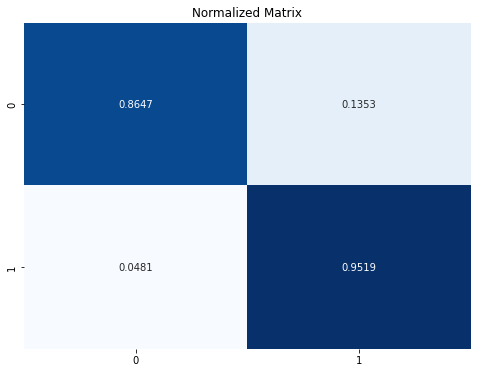

In [ ]:
prediction = model_MN.predict([input_val_wide,input_val_cnn])
decoded_validation = np.argmax(one_hot_labelsV_nm, axis=1)
decoded_prediction = np.argmax(np.around(prediction), axis=1)

matrix = confusion_matrix(decoded_validation, decoded_prediction)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.title("Normalized Matrix")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False)
print("Norm Matrix Trace Norm:\t", (norm_matrix.trace()/3))
print("Norm Matrix Trace:\t\t", norm_matrix.trace())

## C) Hybrid Models S-V

### Callbacks

In [ ]:
from datetime import datetime
exps_dir="/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/Models"

def create_folders_and_callbacks(model_name):

  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = [
                tfk.callbacks.EarlyStopping(monitor='val_f1', mode='max', patience=15, restore_best_weights=True),
                tfk.callbacks.ReduceLROnPlateau(monitor='val_f1', mode='max', patience=5, factor=0.5, min_lr=1e-5)
              ]

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)
  print("Checkpoint Directory: ", ckpt_dir)
  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=True,  # True to save only the best epoch
                                                     monitor='val_f1',
                                                     mode='max') 
  callbacks.append(ckpt_callback)


  return (callbacks, exp_dir)

### Hybrid Model SV

In [ ]:
input_shape_CNN=(130,2)
input_shape_wide=(36)

In [ ]:
my_model_name='HybridModelV5_FL_SV'

In [ ]:
def build_hybrid_v5_fl_sv(input_shape_CNN, input_shape_wide):
  # define two sets of inputs
  inputA = tfkl.Input(name="InputWideFeatures", shape=input_shape_wide)
  inputB = tfkl.Input(name="InputConv", shape=input_shape_CNN)


  dense1A = tfkl.Dense(64,  name="Dense1A_64", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(inputA)
  dense1A = tfkl.Dropout(0.3, name = "Dense1A_Dropout_0.3", seed=seed)(dense1A)
  dense2A = tfkl.Dense(32,  name="Dense2A_32", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense1A)
  dense2A = tfkl.Dropout(0.2, name = "Dense2A_Dropout_0.2", seed=seed)(dense2A)
  outLevelA = tfkl.Dense(16,  name="outLevelA_16", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense2A)
  outLevelA = tfkl.Dropout(0.1, name = "Dense2A_Dropout_0.1", seed=seed)(outLevelA)


  # the second branch opreates on the signals
  blck1 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage1_f64_k3")(inputB)
  blck1 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage2_f64_k3")(blck1)
  blck1 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block1_s2",)(blck1)

  blck2 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage1_f128_k3")(blck1)
  blck2 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage2_f128_k3")(blck2)
  blck2 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block2_s2")(blck2)

  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage1_f256_k3")(blck2)
  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage2_f256_k3")(blck3)
  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage3_f256_k3")(blck3)
  blck3 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block3_s2")(blck3)

  flattening_layer = tfkl.GlobalMaxPool1D(name = "GMP")(blck3)
  outLevelB = tfkl.Dropout(0.2, seed=seed, name = "outLevelB_Dropout_0.2")(flattening_layer)

  # combine the output of the two branches
  combined = tfkl.concatenate([outLevelA, outLevelB], name="Concat_Layer")


  # apply a FC layer on the combined outputs
  hidden= tfkl.Dense(128,  name="Hidden1_128", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(combined)
  hidden = tfkl.Dropout(0.4, seed=seed, name = "HiddenDropout1_0.4")(hidden)
  hidden= tfkl.Dense(16,  name="Hidden2_16", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)
  hidden = tfkl.Dropout(0.2, seed=seed, name = "HiddenDropout2_0.4")(hidden)

  # Output
  output = tfkl.Dense(2, name="OutputHybrid", activation='softmax', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)

  # Create the model
  model = tfk.Model(inputs=[inputA, inputB], outputs=output, name=my_model_name)

  # Compile the model
  model.compile(optimizer='adam', #tf.keras.optimizers.SGD(learning_rate=0.01),#'adam',
                loss=[focal_loss(alpha=.25, gamma=2)], #tf.keras.losses.categorical_crossentropy,
                metrics=['accuracy', f1],
                run_eagerly=True)
  return model

Model: "HybridModelV5_FL_SV"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputConv (InputLayer)         [(None, 130, 2)]     0           []                               
                                                                                                  
 Conv1D_Block1_Stage1_f64_k3 (C  (None, 128, 64)     448         ['InputConv[0][0]']              
 onv1D)                                                                                           
                                                                                                  
 Conv1D_Block1_Stage2_f64_k3 (C  (None, 126, 64)     12352       ['Conv1D_Block1_Stage1_f64_k3[0][
 onv1D)                                                          0]']                             
                                                                                

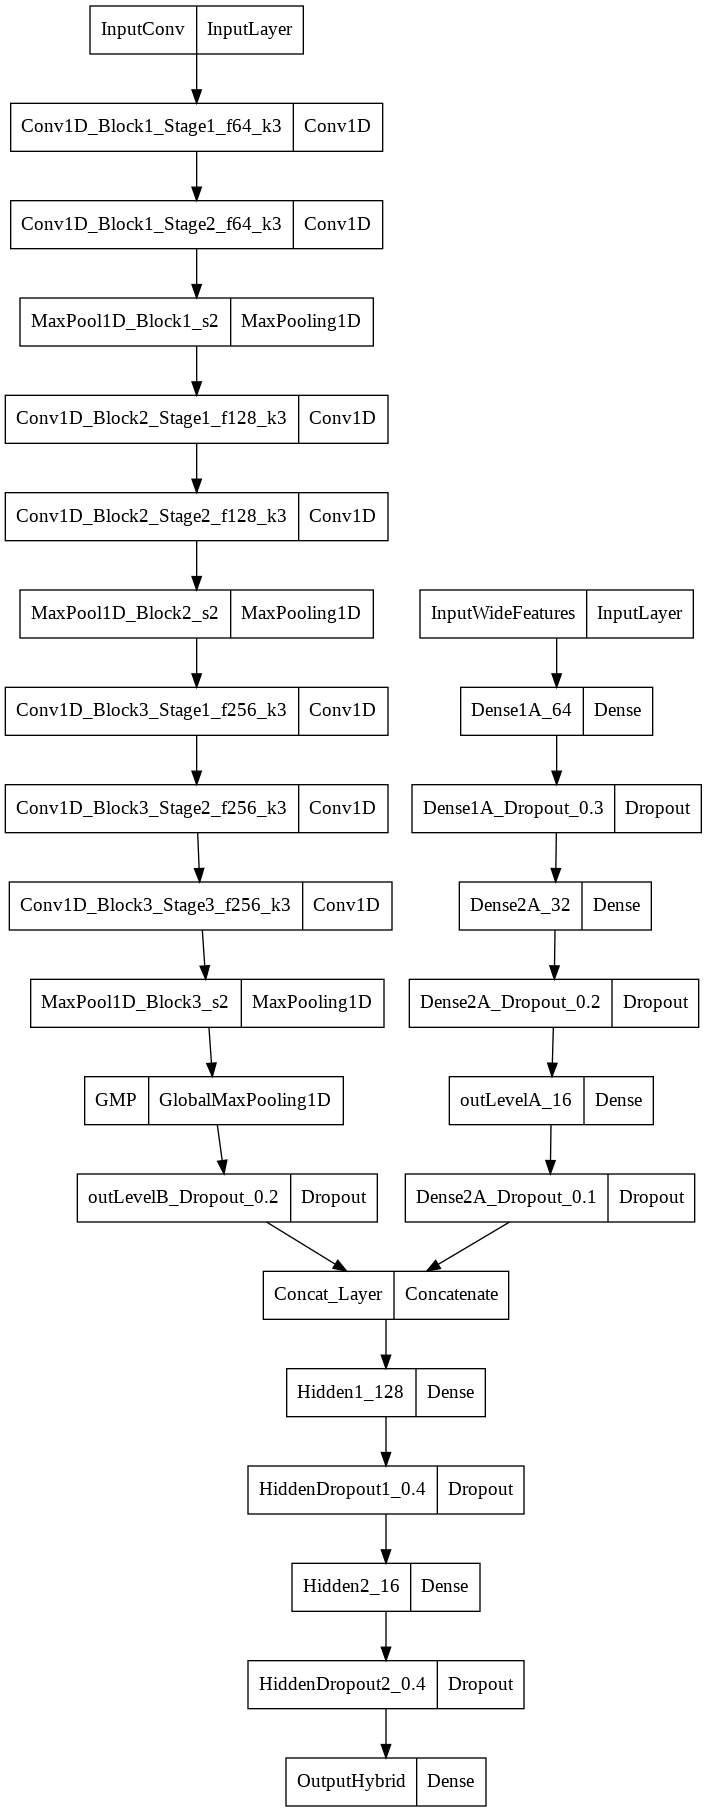

In [ ]:
model = build_hybrid_v5_fl_sv(input_shape_CNN, input_shape_wide)
model.summary()
tfk.utils.plot_model(model, expand_nested=True)

### Automatic Search

#### Define a new folder for all the trials

In [ ]:
from datetime import datetime
exps_dir="/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch"

def create_folders_and_callbacks(model_name):

  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = [
                tfk.callbacks.EarlyStopping(monitor='val_f1', mode='max', patience=8, restore_best_weights=True),
                tfk.callbacks.ReduceLROnPlateau(monitor='val_f1', mode='max', patience=3, factor=0.5, min_lr=1e-5)
              ]

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)
  print("Checkpoint Directory: ", ckpt_dir)
  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=True,  # True to save only the best epoch
                                                     monitor='val_f1',
                                                     mode='max') 
  callbacks.append(ckpt_callback)


  return (callbacks, exp_dir)

#### Define the model, shape and trials number

In [ ]:
input_shape_CNN=(130,2)
input_shape_wide=(36)

block = "B"
trials = 20

In [ ]:
def build_hybrid_v5_fl_sv(input_shape_CNN, input_shape_wide):
  # define two sets of inputs
  inputA = tfkl.Input(name="InputWideFeatures", shape=input_shape_wide)
  inputB = tfkl.Input(name="InputConv", shape=input_shape_CNN)

  # the first branch operates on the wide features
  dense1A = tfkl.Dense(64,  name="Dense1A", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(inputA)
  dense1A = tfkl.Dropout(0.3, name = "Dense1A_Dropout", seed=seed)(dense1A)
  dense2A = tfkl.Dense(32,  name="Dense2A", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense1A)
  dense2A = tfkl.Dropout(0.2, name = "Dense2A_Dropout", seed=seed)(dense2A)
  outLevelA = tfkl.Dense(16,  name="outLevelA", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(dense2A)
  outLevelA = tfkl.Dropout(0.1, name = "Dense2A_Dropout", seed=seed)(outLevelA)


  # the second branch opreates on the signals
  blck1 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage1")(inputB)
  blck1 = tfkl.Conv1D(64, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block1_Stage2")(blck1)
  blck1 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block1",)(blck1)
  #blck1 = tfkl.Dropout(dropPool_rate, seed=seed, name = "MaxPool_B1_Drop")(blck1)

  blck2 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage1")(blck1)
  blck2 = tfkl.Conv1D(128, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block2_Stage2")(blck2)
  blck2 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block2")(blck2)
  #blck2 = tfkl.Dropout(dropPool_rate, seed=seed, name = "MaxPool_B2_Drop")(blck2)

  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage1")(blck2)
  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage2")(blck3)
  blck3 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block3_Stage3")(blck3)
  blck3 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block3")(blck3)
  #blck3 = tfkl.Dropout(dropPool_rate, seed=seed, name = "MaxPool_B3_Drop")(blck3)

  #blck4 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block4_Stage1")(blck3)
  #blck4 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block4_Stage2")(blck4)
  #blck4 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block4_Stage3")(blck4)
  #blck4 = tfkl.MaxPooling1D(pool_size = 2, name = "MaxPool1D_Block4")(blck4)
  #blck4 = tfkl.Dropout(dropPool_rate, seed=seed, name = "MaxPool_B4_Drop")(blck4)

  #blck5 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block5_Stage1")(blck4)
  #blck5 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block5_Stage2")(blck5)
  #blck5 = tfkl.Conv1D(256, 3, kernel_initializer = tfk.initializers.GlorotUniform(seed), name = "Conv1D_Block5_Stage3")(blck5)
  #blck5 = tfkl.MaxPooling1D(pool_size = 1, name = "MaxPool1D_Block5")(blck5)
  #blck5 = tfkl.Dropout(dropPool_rate, seed=seed, name = "MaxPool_B5_Drop")(blck5)

  flattening_layer = tfkl.GlobalMaxPool1D(name = "GMP")(blck3)
  outLevelB = tfkl.Dropout(0.2, seed=seed, name = "outLevelB")(flattening_layer)

  # combine the output of the two branches
  combined = tfkl.concatenate([outLevelA, outLevelB], name="Concat_Layer")


  # apply a FC layer on the combined outputs
  hidden= tfkl.Dense(128,  name="Hidden1", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(combined)
  hidden = tfkl.Dropout(0.4, seed=seed, name = "HiddenDropout1")(hidden)
  hidden= tfkl.Dense(16,  name="Hidden2", activation='relu', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)
  hidden = tfkl.Dropout(0.2, seed=seed, name = "HiddenDropout2")(hidden)

  # Output
  output = tfkl.Dense(2, name="OutputHybrid", activation='softmax', kernel_initializer = tf.keras.initializers.GlorotUniform(seed))(hidden)

  # Create the model
  model = tfk.Model(inputs=[inputA, inputB], outputs=output, name=my_model_name)

  # Compile the model
  model.compile(optimizer='adam', #tf.keras.optimizers.SGD(learning_rate=0.01),#'adam',
                loss=[focal_loss(alpha=.25, gamma=2)], #tf.keras.losses.categorical_crossentropy,
                metrics=['accuracy', f1],
                run_eagerly=True)
  return model

#### Define the input 

In [ ]:
valDOWN_sv = np.asarray(valDOWN_sv)

In [ ]:
trainDOWN_sv = np.asarray(trainDOWN_sv)

In [ ]:
input_train_cnn = trainDOWN_sv
input_train_wide = normalizer(X_sv_train_df_keras)

input_val_cnn = valDOWN_sv
input_val_wide = normalizer(X_sv_val_df_keras)

In [ ]:
input_val_cnn = np.asarray(input_val_cnn)

In [ ]:
class_weights_alt_sv

{0: 0.9214235377026074, 1: 1.0932274247491638}

#### Start the training

In [ ]:
best_trace = 0
best_model_trace = ""
best_ht = 0
best_model_ht = "" 

model_list = []
ht_list = []
norm_trace_list = []

print("START TRAINING FOR ", trials, " MODELS")
for i in range(trials):

  my_model_name=str('HybridV5_FL_SV_trial_' + str(i) + "_block_" + block)
  print("\n\nEvaluation of model: ", my_model_name)
  print("_"*260)
  # Build model
  model = build_hybrid_v5_fl_sv(input_shape_CNN, input_shape_wide)

  (my_callbacks, exp_dir) = create_folders_and_callbacks(model_name=my_model_name)

  history = model.fit(x = [input_train_wide,input_train_cnn], 
                      y = one_hot_labels_sv,
                      validation_data=([input_val_wide,input_val_cnn], one_hot_labelsV_sv),
                      epochs=40, 
                      batch_size=2700,
                      #class_weight=class_weights_alt_sv,
                      callbacks = my_callbacks).history
  
  

  prediction = model.predict([input_val_wide,input_val_cnn])
  decoded_validation = np.argmax(one_hot_labelsV_sv, axis=1)
  decoded_prediction = np.argmax(np.around(prediction), axis=1)

  matrix = confusion_matrix(decoded_validation, decoded_prediction)
  norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

  model_ht = 2/((1/norm_matrix[0][0])+(1/norm_matrix[1][1]))
  norm_trace = norm_matrix.trace()



  print("\n Model Performance...")
  print("Norm Matrix Trace Norm:\t", (norm_trace/2))
  print("Norm Matrix Trace:\t", norm_trace)
  print("Matrix Ht:\t\t", ht)

  print("\n Saving plot and confusion matrix...")
  normConfusionMatrix(norm_matrix, my_model_name, show=False, save = True, folder=exp_dir)
  performancePlotF1(history, 0, str(my_model_name + "_f1"), show=False, save = True, folder=exp_dir)

  if(norm_trace>best_trace):
    best_trace = norm_trace
    best_model_trace = my_model_name

  if(model_ht>best_ht):
    best_ht = model_ht
    best_model_ht = my_model_name

  model_list.append(my_model_name)
  norm_trace_list.append(norm_trace)
  ht_list.append(model_ht)
  
  print("_"*260)

START TRAINING FOR  20  MODELS


Evaluation of model:  HybridV5_FL_SV_trial_0_block_B
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
Checkpoint Directory:  /content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridV5_FL_SV_trial_0_block_B_Jan10_11-07-09/ckpts
Epoch 1/40
5/5 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.5955 - f1: 0.5715

5/5 [==============================] - 6s 1s/step - loss: 0.0977 - accuracy: 0.5955 - f1: 0.5715 - val_loss: 0.0666 - val_accuracy: 0.6960 - val_f1: 0.6688 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 335ms/step - loss: 0.0607 - accuracy: 0.7943 - f1: 0.7944 - val_loss: 0.1098 - val_accuracy: 0.6005 - val_f1: 0.5366 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 379ms/step - loss: 0.0473 - accuracy: 0.8528 - f1: 0.8512 - val_loss: 0.1477 - val_accuracy: 0.5690 - val_f1: 0.5133 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0405 - accuracy: 0.8740 - f1: 0.8724 - val_loss: 0.1665 - val_accuracy: 0.5573 - val_f1: 0.4872 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0353 - accuracy: 0.8889 - f1: 0.8877 - val_loss: 0.1901 - val_accuracy: 0.5347 - val_f1: 0.4599 - lr: 5.0000e-04
Epoch 6/40
5/5 [==============================] - 2s 339ms/step - loss: 0.0324 - accuracy: 0.90

5/5 [==============================] - 5s 1s/step - loss: 0.1422 - accuracy: 0.5323 - f1: 0.4987 - val_loss: 0.0763 - val_accuracy: 0.5385 - val_f1: 0.4557 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0781 - accuracy: 0.6238 - f1: 0.6200

5/5 [==============================] - 5s 1s/step - loss: 0.0781 - accuracy: 0.6238 - f1: 0.6200 - val_loss: 0.0748 - val_accuracy: 0.5395 - val_f1: 0.4580 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 0.0670 - accuracy: 0.7479 - f1: 0.7485

5/5 [==============================] - 5s 1s/step - loss: 0.0670 - accuracy: 0.7479 - f1: 0.7485 - val_loss: 0.0737 - val_accuracy: 0.6124 - val_f1: 0.5510 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - ETA: 0s - loss: 0.0570 - accuracy: 0.8145 - f1: 0.8138

5/5 [==============================] - 5s 1s/step - loss: 0.0570 - accuracy: 0.8145 - f1: 0.8138 - val_loss: 0.0758 - val_accuracy: 0.6481 - val_f1: 0.5910 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0487 - accuracy: 0.8528 - f1: 0.8505 - val_loss: 0.1515 - val_accuracy: 0.5752 - val_f1: 0.5010 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 334ms/step - loss: 0.0425 - accuracy: 0.8701 - f1: 0.8680 - val_loss: 0.2018 - val_accuracy: 0.5655 - val_f1: 0.4901 - lr: 0.0010
Epoch 7/40
5/5 [==============================] - 2s 340ms/step - loss: 0.0374 - accuracy: 0.8896 - f1: 0.8888 - val_loss: 0.1554 - val_accuracy: 0.5836 - val_f1: 0.5185 - lr: 0.0010
Epoch 8/40
5/5 [==============================] - 2s 342ms/step - loss: 0.0346 - accuracy: 0.8952 - f1: 0.8939 - val_loss: 0.2073 - val_accuracy: 0.5407 - val_f1: 0.4633 - lr: 5.0000e-04
Epoch 9/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0337 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.1291 - accuracy: 0.5779 - f1: 0.5336 - val_loss: 0.0685 - val_accuracy: 0.7988 - val_f1: 0.8344 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 368ms/step - loss: 0.0671 - accuracy: 0.7377 - f1: 0.7382 - val_loss: 0.0773 - val_accuracy: 0.6042 - val_f1: 0.5803 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 337ms/step - loss: 0.0547 - accuracy: 0.8297 - f1: 0.8285 - val_loss: 0.1142 - val_accuracy: 0.5782 - val_f1: 0.5133 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 336ms/step - loss: 0.0460 - accuracy: 0.8542 - f1: 0.8520 - val_loss: 0.1421 - val_accuracy: 0.5943 - val_f1: 0.5356 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 342ms/step - loss: 0.0396 - accuracy: 0.8774 - f1: 0.8756 - val_loss: 0.2001 - val_accuracy: 0.5578 - val_f1: 0.4899 - lr: 5.0000e-04
Epoch 6/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0371 - accuracy: 0.88

5/5 [==============================] - 5s 1s/step - loss: 0.0945 - accuracy: 0.5729 - f1: 0.5372 - val_loss: 0.0790 - val_accuracy: 0.4950 - val_f1: 0.3901 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0615 - accuracy: 0.7579 - f1: 0.7582

5/5 [==============================] - 5s 1s/step - loss: 0.0615 - accuracy: 0.7579 - f1: 0.7582 - val_loss: 0.1288 - val_accuracy: 0.6117 - val_f1: 0.5383 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 369ms/step - loss: 0.0471 - accuracy: 0.8496 - f1: 0.8488 - val_loss: 0.1186 - val_accuracy: 0.5727 - val_f1: 0.5068 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 338ms/step - loss: 0.0392 - accuracy: 0.8807 - f1: 0.8799 - val_loss: 0.1473 - val_accuracy: 0.5558 - val_f1: 0.4891 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 369ms/step - loss: 0.0341 - accuracy: 0.8928 - f1: 0.8919 - val_loss: 0.2039 - val_accuracy: 0.5278 - val_f1: 0.4530 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 335ms/step - loss: 0.0302 - accuracy: 0.9055 - f1: 0.9047 - val_loss: 0.2289 - val_accuracy: 0.5543 - val_f1: 0.4836 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0292 - accuracy: 0.91

5/5 [==============================] - 5s 1s/step - loss: 0.1170 - accuracy: 0.5517 - f1: 0.5285 - val_loss: 0.0737 - val_accuracy: 0.5881 - val_f1: 0.5034 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0727 - accuracy: 0.7007 - f1: 0.7018

5/5 [==============================] - 5s 1s/step - loss: 0.0727 - accuracy: 0.7007 - f1: 0.7018 - val_loss: 0.0770 - val_accuracy: 0.5839 - val_f1: 0.5240 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 338ms/step - loss: 0.0574 - accuracy: 0.8120 - f1: 0.8104 - val_loss: 0.1206 - val_accuracy: 0.5156 - val_f1: 0.4415 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 372ms/step - loss: 0.0453 - accuracy: 0.8513 - f1: 0.8485 - val_loss: 0.1567 - val_accuracy: 0.5402 - val_f1: 0.4672 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0380 - accuracy: 0.8785 - f1: 0.8769 - val_loss: 0.1677 - val_accuracy: 0.5514 - val_f1: 0.4772 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0346 - accuracy: 0.8894 - f1: 0.8878 - val_loss: 0.1605 - val_accuracy: 0.5444 - val_f1: 0.4726 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 337ms/step - loss: 0.0317 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.0793 - accuracy: 0.6737 - f1: 0.6574 - val_loss: 0.1762 - val_accuracy: 0.5045 - val_f1: 0.4084 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 367ms/step - loss: 0.0513 - accuracy: 0.8292 - f1: 0.8274 - val_loss: 0.1974 - val_accuracy: 0.5022 - val_f1: 0.4078 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.8704 - f1: 0.8695

5/5 [==============================] - 5s 1s/step - loss: 0.0412 - accuracy: 0.8704 - f1: 0.8695 - val_loss: 0.1709 - val_accuracy: 0.5268 - val_f1: 0.4449 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.8861 - f1: 0.8849

5/5 [==============================] - 5s 1s/step - loss: 0.0353 - accuracy: 0.8861 - f1: 0.8849 - val_loss: 0.1851 - val_accuracy: 0.5623 - val_f1: 0.4935 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0314 - accuracy: 0.9014 - f1: 0.9005 - val_loss: 0.2110 - val_accuracy: 0.5357 - val_f1: 0.4590 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9140 - f1: 0.9132

5/5 [==============================] - 5s 1s/step - loss: 0.0288 - accuracy: 0.9140 - f1: 0.9132 - val_loss: 0.1945 - val_accuracy: 0.5680 - val_f1: 0.5008 - lr: 0.0010
Epoch 7/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0267 - accuracy: 0.9216 - f1: 0.9214 - val_loss: 0.2336 - val_accuracy: 0.5692 - val_f1: 0.4968 - lr: 0.0010
Epoch 8/40
5/5 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9321 - f1: 0.9317

5/5 [==============================] - 5s 1s/step - loss: 0.0244 - accuracy: 0.9321 - f1: 0.9317 - val_loss: 0.2077 - val_accuracy: 0.5945 - val_f1: 0.5264 - lr: 0.0010
Epoch 9/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0223 - accuracy: 0.9384 - f1: 0.9377 - val_loss: 0.2734 - val_accuracy: 0.5588 - val_f1: 0.4814 - lr: 0.0010
Epoch 10/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0210 - accuracy: 0.9448 - f1: 0.9440 - val_loss: 0.3176 - val_accuracy: 0.5605 - val_f1: 0.4824 - lr: 0.0010
Epoch 11/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0193 - accuracy: 0.9504 - f1: 0.9500 - val_loss: 0.2554 - val_accuracy: 0.5680 - val_f1: 0.4885 - lr: 0.0010
Epoch 12/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0180 - accuracy: 0.9524 - f1: 0.9521 - val_loss: 0.3083 - val_accuracy: 0.5568 - val_f1: 0.4763 - lr: 5.0000e-04
Epoch 13/40
5/5 [==============================] - 2s 335ms/step - loss: 0.0172 - accuracy: 

5/5 [==============================] - 5s 1s/step - loss: 0.1357 - accuracy: 0.5567 - f1: 0.5243 - val_loss: 0.0694 - val_accuracy: 0.7012 - val_f1: 0.6774 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0628 - accuracy: 0.7731 - f1: 0.7743 - val_loss: 0.0725 - val_accuracy: 0.6883 - val_f1: 0.6636 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0474 - accuracy: 0.8533 - f1: 0.8524 - val_loss: 0.1183 - val_accuracy: 0.5814 - val_f1: 0.5228 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 340ms/step - loss: 0.0405 - accuracy: 0.8763 - f1: 0.8753 - val_loss: 0.1340 - val_accuracy: 0.5913 - val_f1: 0.5362 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0356 - accuracy: 0.8942 - f1: 0.8935 - val_loss: 0.1588 - val_accuracy: 0.5536 - val_f1: 0.4906 - lr: 5.0000e-04
Epoch 6/40
5/5 [==============================] - 2s 372ms/step - loss: 0.0336 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.1054 - accuracy: 0.5938 - f1: 0.5864 - val_loss: 0.0901 - val_accuracy: 0.5020 - val_f1: 0.4093 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.7667 - f1: 0.7659

5/5 [==============================] - 6s 1s/step - loss: 0.0627 - accuracy: 0.7667 - f1: 0.7659 - val_loss: 0.0751 - val_accuracy: 0.6702 - val_f1: 0.6385 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0494 - accuracy: 0.8468 - f1: 0.8445 - val_loss: 0.1676 - val_accuracy: 0.5868 - val_f1: 0.5260 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 381ms/step - loss: 0.0410 - accuracy: 0.8687 - f1: 0.8669 - val_loss: 0.2112 - val_accuracy: 0.5881 - val_f1: 0.5260 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 376ms/step - loss: 0.0364 - accuracy: 0.8867 - f1: 0.8850 - val_loss: 0.2353 - val_accuracy: 0.5375 - val_f1: 0.4670 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 378ms/step - loss: 0.0328 - accuracy: 0.8996 - f1: 0.8981 - val_loss: 0.2728 - val_accuracy: 0.5571 - val_f1: 0.4873 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0309 - accuracy: 0.90

5/5 [==============================] - 5s 1s/step - loss: 0.1058 - accuracy: 0.6458 - f1: 0.6384 - val_loss: 0.0603 - val_accuracy: 0.8092 - val_f1: 0.8120 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0545 - accuracy: 0.8159 - f1: 0.8148 - val_loss: 0.0799 - val_accuracy: 0.6591 - val_f1: 0.6042 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 369ms/step - loss: 0.0431 - accuracy: 0.8685 - f1: 0.8667 - val_loss: 0.1414 - val_accuracy: 0.5968 - val_f1: 0.5390 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0381 - accuracy: 0.8809 - f1: 0.8796 - val_loss: 0.1462 - val_accuracy: 0.5655 - val_f1: 0.5032 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0345 - accuracy: 0.8952 - f1: 0.8940 - val_loss: 0.1817 - val_accuracy: 0.5476 - val_f1: 0.4803 - lr: 5.0000e-04
Epoch 6/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0314 - accuracy: 0.90

5/5 [==============================] - 5s 1s/step - loss: 0.1048 - accuracy: 0.5489 - f1: 0.5053 - val_loss: 0.0707 - val_accuracy: 0.7218 - val_f1: 0.7072 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.7065 - f1: 0.7065

5/5 [==============================] - 6s 1s/step - loss: 0.0712 - accuracy: 0.7065 - f1: 0.7065 - val_loss: 0.0665 - val_accuracy: 0.7454 - val_f1: 0.7401 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0584 - accuracy: 0.8031 - f1: 0.8021 - val_loss: 0.1359 - val_accuracy: 0.6050 - val_f1: 0.5464 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 372ms/step - loss: 0.0490 - accuracy: 0.8447 - f1: 0.8425 - val_loss: 0.2221 - val_accuracy: 0.5727 - val_f1: 0.5124 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0414 - accuracy: 0.8737 - f1: 0.8713 - val_loss: 0.2948 - val_accuracy: 0.5638 - val_f1: 0.4948 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 344ms/step - loss: 0.0376 - accuracy: 0.8876 - f1: 0.8856 - val_loss: 0.1802 - val_accuracy: 0.6069 - val_f1: 0.5508 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0353 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.0848 - accuracy: 0.6810 - f1: 0.6809 - val_loss: 0.1369 - val_accuracy: 0.5067 - val_f1: 0.4172 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.8438 - f1: 0.8426

5/5 [==============================] - 5s 1s/step - loss: 0.0475 - accuracy: 0.8438 - f1: 0.8426 - val_loss: 0.1263 - val_accuracy: 0.5779 - val_f1: 0.5178 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 377ms/step - loss: 0.0367 - accuracy: 0.8844 - f1: 0.8834 - val_loss: 0.1664 - val_accuracy: 0.5829 - val_f1: 0.5163 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0321 - accuracy: 0.9028 - f1: 0.9021 - val_loss: 0.2145 - val_accuracy: 0.5690 - val_f1: 0.4993 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 369ms/step - loss: 0.0303 - accuracy: 0.9135 - f1: 0.9128 - val_loss: 0.3053 - val_accuracy: 0.5218 - val_f1: 0.4343 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0273 - accuracy: 0.9176 - f1: 0.9168 - val_loss: 0.2672 - val_accuracy: 0.5561 - val_f1: 0.4794 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9254 - f

5/5 [==============================] - 6s 1s/step - loss: 0.0253 - accuracy: 0.9254 - f1: 0.9252 - val_loss: 0.2281 - val_accuracy: 0.5891 - val_f1: 0.5203 - lr: 5.0000e-04
Epoch 8/40
5/5 [==============================] - 2s 338ms/step - loss: 0.0254 - accuracy: 0.9269 - f1: 0.9265 - val_loss: 0.2662 - val_accuracy: 0.5573 - val_f1: 0.4803 - lr: 5.0000e-04
Epoch 9/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0236 - accuracy: 0.9344 - f1: 0.9336 - val_loss: 0.3366 - val_accuracy: 0.5218 - val_f1: 0.4297 - lr: 5.0000e-04
Epoch 10/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0231 - accuracy: 0.9364 - f1: 0.9355 - val_loss: 0.2567 - val_accuracy: 0.5739 - val_f1: 0.4993 - lr: 5.0000e-04
Epoch 11/40
5/5 [==============================] - 2s 338ms/step - loss: 0.0219 - accuracy: 0.9420 - f1: 0.9417 - val_loss: 0.2938 - val_accuracy: 0.5367 - val_f1: 0.4526 - lr: 2.5000e-04
Epoch 12/40
5/5 [==============================] - 2s 373ms/step - loss: 0.02

5/5 [==============================] - 5s 1s/step - loss: 0.1054 - accuracy: 0.6081 - f1: 0.5842 - val_loss: 0.0600 - val_accuracy: 0.8216 - val_f1: 0.8323 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0626 - accuracy: 0.7776 - f1: 0.7779 - val_loss: 0.0821 - val_accuracy: 0.6355 - val_f1: 0.5817 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0491 - accuracy: 0.8503 - f1: 0.8486 - val_loss: 0.1356 - val_accuracy: 0.5993 - val_f1: 0.5412 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 337ms/step - loss: 0.0400 - accuracy: 0.8803 - f1: 0.8791 - val_loss: 0.1403 - val_accuracy: 0.5983 - val_f1: 0.5411 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0353 - accuracy: 0.8954 - f1: 0.8941 - val_loss: 0.2040 - val_accuracy: 0.5623 - val_f1: 0.4964 - lr: 5.0000e-04
Epoch 6/40
5/5 [==============================] - 2s 369ms/step - loss: 0.0330 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.1284 - accuracy: 0.5592 - f1: 0.5361 - val_loss: 0.0882 - val_accuracy: 0.4509 - val_f1: 0.3017 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.6454 - f1: 0.6416

5/5 [==============================] - 6s 1s/step - loss: 0.0748 - accuracy: 0.6454 - f1: 0.6416 - val_loss: 0.0709 - val_accuracy: 0.6035 - val_f1: 0.5650 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 335ms/step - loss: 0.0594 - accuracy: 0.7969 - f1: 0.7970 - val_loss: 0.1199 - val_accuracy: 0.5737 - val_f1: 0.5056 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0485 - accuracy: 0.8487 - f1: 0.8472 - val_loss: 0.1404 - val_accuracy: 0.5695 - val_f1: 0.5021 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0433 - accuracy: 0.8639 - f1: 0.8623 - val_loss: 0.1099 - val_accuracy: 0.6082 - val_f1: 0.5505 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0385 - accuracy: 0.8814 - f1: 0.8797 - val_loss: 0.1373 - val_accuracy: 0.5871 - val_f1: 0.5220 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0357 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.0864 - accuracy: 0.6584 - f1: 0.6598 - val_loss: 0.1683 - val_accuracy: 0.4861 - val_f1: 0.3769 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.8259 - f1: 0.8248

5/5 [==============================] - 5s 1s/step - loss: 0.0520 - accuracy: 0.8259 - f1: 0.8248 - val_loss: 0.1317 - val_accuracy: 0.5154 - val_f1: 0.4253 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0429 - accuracy: 0.8662 - f1: 0.8658 - val_loss: 0.1780 - val_accuracy: 0.5117 - val_f1: 0.4209 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.8945 - f1: 0.8941

5/5 [==============================] - 6s 1s/step - loss: 0.0345 - accuracy: 0.8945 - f1: 0.8941 - val_loss: 0.1590 - val_accuracy: 0.5280 - val_f1: 0.4481 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9081 - f1: 0.9078

5/5 [==============================] - 5s 1s/step - loss: 0.0316 - accuracy: 0.9081 - f1: 0.9078 - val_loss: 0.1922 - val_accuracy: 0.5345 - val_f1: 0.4499 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 366ms/step - loss: 0.0291 - accuracy: 0.9153 - f1: 0.9148 - val_loss: 0.2269 - val_accuracy: 0.5300 - val_f1: 0.4436 - lr: 0.0010
Epoch 7/40
5/5 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9191 - f1: 0.9190

5/5 [==============================] - 5s 1s/step - loss: 0.0276 - accuracy: 0.9191 - f1: 0.9190 - val_loss: 0.2074 - val_accuracy: 0.5548 - val_f1: 0.4750 - lr: 0.0010
Epoch 8/40
5/5 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9267 - f1: 0.9261

5/5 [==============================] - 5s 1s/step - loss: 0.0255 - accuracy: 0.9267 - f1: 0.9261 - val_loss: 0.2441 - val_accuracy: 0.5640 - val_f1: 0.4865 - lr: 0.0010
Epoch 9/40
5/5 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9304 - f1: 0.9298

5/5 [==============================] - 6s 1s/step - loss: 0.0237 - accuracy: 0.9304 - f1: 0.9298 - val_loss: 0.2360 - val_accuracy: 0.5670 - val_f1: 0.4900 - lr: 0.0010
Epoch 10/40
5/5 [==============================] - ETA: 0s - loss: 0.0224 - accuracy: 0.9373 - f1: 0.9366

5/5 [==============================] - 5s 1s/step - loss: 0.0224 - accuracy: 0.9373 - f1: 0.9366 - val_loss: 0.2376 - val_accuracy: 0.5784 - val_f1: 0.5032 - lr: 0.0010
Epoch 11/40
5/5 [==============================] - ETA: 0s - loss: 0.0208 - accuracy: 0.9438 - f1: 0.9434

5/5 [==============================] - 5s 1s/step - loss: 0.0208 - accuracy: 0.9438 - f1: 0.9434 - val_loss: 0.1855 - val_accuracy: 0.5898 - val_f1: 0.5206 - lr: 0.0010
Epoch 12/40
5/5 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9451 - f1: 0.9449

5/5 [==============================] - 6s 1s/step - loss: 0.0206 - accuracy: 0.9451 - f1: 0.9449 - val_loss: 0.2076 - val_accuracy: 0.5948 - val_f1: 0.5228 - lr: 0.0010
Epoch 13/40
5/5 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9442 - f1: 0.9437

5/5 [==============================] - 5s 1s/step - loss: 0.0203 - accuracy: 0.9442 - f1: 0.9437 - val_loss: 0.2272 - val_accuracy: 0.5955 - val_f1: 0.5230 - lr: 0.0010
Epoch 14/40
5/5 [==============================] - 2s 371ms/step - loss: 0.0174 - accuracy: 0.9543 - f1: 0.9543 - val_loss: 0.3156 - val_accuracy: 0.5355 - val_f1: 0.4478 - lr: 0.0010
Epoch 15/40
5/5 [==============================] - 2s 339ms/step - loss: 0.0165 - accuracy: 0.9573 - f1: 0.9570 - val_loss: 0.3131 - val_accuracy: 0.5218 - val_f1: 0.4297 - lr: 0.0010
Epoch 16/40
5/5 [==============================] - 2s 337ms/step - loss: 0.0165 - accuracy: 0.9569 - f1: 0.9569 - val_loss: 0.2954 - val_accuracy: 0.5335 - val_f1: 0.4454 - lr: 0.0010
Epoch 17/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0148 - accuracy: 0.9618 - f1: 0.9616 - val_loss: 0.2908 - val_accuracy: 0.5432 - val_f1: 0.4597 - lr: 5.0000e-04
Epoch 18/40
5/5 [==============================] - 2s 339ms/step - loss: 0.0140 - accuracy:

5/5 [==============================] - 5s 1s/step - loss: 0.1712 - accuracy: 0.5112 - f1: 0.4524 - val_loss: 0.0839 - val_accuracy: 0.4759 - val_f1: 0.3477 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.6297 - f1: 0.6280

5/5 [==============================] - 5s 1s/step - loss: 0.0782 - accuracy: 0.6297 - f1: 0.6280 - val_loss: 0.0732 - val_accuracy: 0.6759 - val_f1: 0.6679 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 340ms/step - loss: 0.0614 - accuracy: 0.7581 - f1: 0.7592 - val_loss: 0.0993 - val_accuracy: 0.5943 - val_f1: 0.5375 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0478 - accuracy: 0.8408 - f1: 0.8404 - val_loss: 0.1178 - val_accuracy: 0.5315 - val_f1: 0.4670 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 341ms/step - loss: 0.0422 - accuracy: 0.8607 - f1: 0.8602 - val_loss: 0.1213 - val_accuracy: 0.5390 - val_f1: 0.4693 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0380 - accuracy: 0.8792 - f1: 0.8786 - val_loss: 0.1069 - val_accuracy: 0.5695 - val_f1: 0.5149 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 377ms/step - loss: 0.0363 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.1244 - accuracy: 0.6076 - f1: 0.5621 - val_loss: 0.0658 - val_accuracy: 0.7275 - val_f1: 0.7036 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 342ms/step - loss: 0.0643 - accuracy: 0.7662 - f1: 0.7644 - val_loss: 0.0772 - val_accuracy: 0.6610 - val_f1: 0.6175 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.8195 - f1: 0.8177

5/5 [==============================] - 5s 1s/step - loss: 0.0529 - accuracy: 0.8195 - f1: 0.8177 - val_loss: 0.0751 - val_accuracy: 0.7266 - val_f1: 0.7125 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0452 - accuracy: 0.8477 - f1: 0.8464 - val_loss: 0.0913 - val_accuracy: 0.6799 - val_f1: 0.6305 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 372ms/step - loss: 0.0409 - accuracy: 0.8624 - f1: 0.8611 - val_loss: 0.1650 - val_accuracy: 0.6030 - val_f1: 0.5453 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 340ms/step - loss: 0.0373 - accuracy: 0.8809 - f1: 0.8794 - val_loss: 0.2461 - val_accuracy: 0.5794 - val_f1: 0.5111 - lr: 0.0010
Epoch 7/40
5/5 [==============================] - 2s 376ms/step - loss: 0.0347 - accuracy: 0.8931 - f1: 0.8924 - val_loss: 0.1446 - val_accuracy: 0.6144 - val_f1: 0.5589 - lr: 5.0000e-04
Epoch 8/40
5/5 [==============================] - 2s 333ms/step - loss: 0.0333 - accuracy: 0.90

5/5 [==============================] - 5s 1s/step - loss: 0.0820 - accuracy: 0.6776 - f1: 0.6747 - val_loss: 0.1686 - val_accuracy: 0.5005 - val_f1: 0.4038 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.8466 - f1: 0.8458

5/5 [==============================] - 5s 1s/step - loss: 0.0482 - accuracy: 0.8466 - f1: 0.8458 - val_loss: 0.1243 - val_accuracy: 0.5489 - val_f1: 0.4869 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.8810 - f1: 0.8796

5/5 [==============================] - 5s 1s/step - loss: 0.0382 - accuracy: 0.8810 - f1: 0.8796 - val_loss: 0.1412 - val_accuracy: 0.5608 - val_f1: 0.5043 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9044 - f1: 0.9038

5/5 [==============================] - 5s 1s/step - loss: 0.0320 - accuracy: 0.9044 - f1: 0.9038 - val_loss: 0.1738 - val_accuracy: 0.5923 - val_f1: 0.5366 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 367ms/step - loss: 0.0295 - accuracy: 0.9153 - f1: 0.9146 - val_loss: 0.2766 - val_accuracy: 0.5213 - val_f1: 0.4391 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 337ms/step - loss: 0.0261 - accuracy: 0.9256 - f1: 0.9248 - val_loss: 0.3114 - val_accuracy: 0.5347 - val_f1: 0.4507 - lr: 0.0010
Epoch 7/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0239 - accuracy: 0.9363 - f1: 0.9360 - val_loss: 0.2448 - val_accuracy: 0.5623 - val_f1: 0.4876 - lr: 0.0010
Epoch 8/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0215 - accuracy: 0.9447 - f1: 0.9444 - val_loss: 0.2560 - val_accuracy: 0.5903 - val_f1: 0.5225 - lr: 5.0000e-04
Epoch 9/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0211 - accuracy: 0.94

5/5 [==============================] - 6s 1s/step - loss: 0.0961 - accuracy: 0.5907 - f1: 0.5656 - val_loss: 0.0663 - val_accuracy: 0.7390 - val_f1: 0.7359 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 373ms/step - loss: 0.0622 - accuracy: 0.7762 - f1: 0.7759 - val_loss: 0.0710 - val_accuracy: 0.6804 - val_f1: 0.6413 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 341ms/step - loss: 0.0503 - accuracy: 0.8383 - f1: 0.8360 - val_loss: 0.1211 - val_accuracy: 0.5990 - val_f1: 0.5309 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0425 - accuracy: 0.8714 - f1: 0.8697 - val_loss: 0.1193 - val_accuracy: 0.5933 - val_f1: 0.5285 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 339ms/step - loss: 0.0378 - accuracy: 0.8873 - f1: 0.8856 - val_loss: 0.1392 - val_accuracy: 0.5687 - val_f1: 0.4982 - lr: 5.0000e-04
Epoch 6/40
5/5 [==============================] - 2s 342ms/step - loss: 0.0358 - accuracy: 0.89

5/5 [==============================] - 5s 1s/step - loss: 0.1149 - accuracy: 0.5572 - f1: 0.5390 - val_loss: 0.0760 - val_accuracy: 0.5295 - val_f1: 0.4501 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.7726 - f1: 0.7731

5/5 [==============================] - 5s 1s/step - loss: 0.0601 - accuracy: 0.7726 - f1: 0.7731 - val_loss: 0.1247 - val_accuracy: 0.5499 - val_f1: 0.4720 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 339ms/step - loss: 0.0488 - accuracy: 0.8398 - f1: 0.8393 - val_loss: 0.1319 - val_accuracy: 0.5300 - val_f1: 0.4487 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 369ms/step - loss: 0.0423 - accuracy: 0.8644 - f1: 0.8636 - val_loss: 0.1233 - val_accuracy: 0.5471 - val_f1: 0.4700 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 343ms/step - loss: 0.0379 - accuracy: 0.8876 - f1: 0.8870 - val_loss: 0.1449 - val_accuracy: 0.5427 - val_f1: 0.4644 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.8985 - f1: 0.8980

5/5 [==============================] - 6s 1s/step - loss: 0.0338 - accuracy: 0.8985 - f1: 0.8980 - val_loss: 0.1061 - val_accuracy: 0.5861 - val_f1: 0.5223 - lr: 5.0000e-04
Epoch 7/40
5/5 [==============================] - 2s 368ms/step - loss: 0.0318 - accuracy: 0.9047 - f1: 0.9044 - val_loss: 0.1293 - val_accuracy: 0.5618 - val_f1: 0.4922 - lr: 5.0000e-04
Epoch 8/40
5/5 [==============================] - 2s 342ms/step - loss: 0.0305 - accuracy: 0.9112 - f1: 0.9104 - val_loss: 0.1784 - val_accuracy: 0.5561 - val_f1: 0.4795 - lr: 5.0000e-04
Epoch 9/40
5/5 [==============================] - 2s 377ms/step - loss: 0.0290 - accuracy: 0.9156 - f1: 0.9145 - val_loss: 0.2039 - val_accuracy: 0.5635 - val_f1: 0.4890 - lr: 5.0000e-04
Epoch 10/40
5/5 [==============================] - 2s 370ms/step - loss: 0.0279 - accuracy: 0.9204 - f1: 0.9194 - val_loss: 0.2396 - val_accuracy: 0.5447 - val_f1: 0.4640 - lr: 2.5000e-04
Epoch 11/40
5/5 [==============================] - 2s 372ms/step - loss: 0.027

5/5 [==============================] - 5s 1s/step - loss: 0.0890 - accuracy: 0.5933 - f1: 0.5786 - val_loss: 0.0834 - val_accuracy: 0.4841 - val_f1: 0.3697 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.8089 - f1: 0.8095

5/5 [==============================] - 5s 1s/step - loss: 0.0578 - accuracy: 0.8089 - f1: 0.8095 - val_loss: 0.1540 - val_accuracy: 0.5203 - val_f1: 0.4411 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.8602 - f1: 0.8584

5/5 [==============================] - 5s 1s/step - loss: 0.0442 - accuracy: 0.8602 - f1: 0.8584 - val_loss: 0.1475 - val_accuracy: 0.5548 - val_f1: 0.4836 - lr: 0.0010
Epoch 4/40
5/5 [==============================] - 2s 375ms/step - loss: 0.0371 - accuracy: 0.8883 - f1: 0.8872 - val_loss: 0.1382 - val_accuracy: 0.5340 - val_f1: 0.4547 - lr: 0.0010
Epoch 5/40
5/5 [==============================] - 2s 372ms/step - loss: 0.0327 - accuracy: 0.9029 - f1: 0.9017 - val_loss: 0.2129 - val_accuracy: 0.5295 - val_f1: 0.4489 - lr: 0.0010
Epoch 6/40
5/5 [==============================] - 2s 340ms/step - loss: 0.0288 - accuracy: 0.9111 - f1: 0.9104 - val_loss: 0.2085 - val_accuracy: 0.5553 - val_f1: 0.4767 - lr: 0.0010
Epoch 7/40
5/5 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9169 - f1: 0.9165

5/5 [==============================] - 6s 1s/step - loss: 0.0271 - accuracy: 0.9169 - f1: 0.9165 - val_loss: 0.1663 - val_accuracy: 0.5787 - val_f1: 0.5114 - lr: 5.0000e-04
Epoch 8/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0263 - accuracy: 0.9237 - f1: 0.9229 - val_loss: 0.2346 - val_accuracy: 0.5536 - val_f1: 0.4748 - lr: 5.0000e-04
Epoch 9/40
5/5 [==============================] - 2s 340ms/step - loss: 0.0254 - accuracy: 0.9306 - f1: 0.9300 - val_loss: 0.2932 - val_accuracy: 0.5285 - val_f1: 0.4413 - lr: 5.0000e-04
Epoch 10/40
5/5 [==============================] - 2s 374ms/step - loss: 0.0254 - accuracy: 0.9291 - f1: 0.9283 - val_loss: 0.2133 - val_accuracy: 0.5660 - val_f1: 0.4909 - lr: 5.0000e-04
Epoch 11/40
5/5 [==============================] - 2s 372ms/step - loss: 0.0235 - accuracy: 0.9366 - f1: 0.9360 - val_loss: 0.2491 - val_accuracy: 0.5491 - val_f1: 0.4686 - lr: 2.5000e-04
Epoch 12/40
5/5 [==============================] - 2s 377ms/step - loss: 0.02

In [ ]:
print("Best model ht: ", best_model_ht, " with an ht of ", best_ht)
print("Best model trace: ", best_model_trace, " with a trace of ", best_trace)

Best model ht:  HybridV5_FL_SV_trial_11_block_B  with an ht of  0.797652254568862
Best model trace:  HybridV5_FL_SV_trial_11_block_B  with a trace of  1.6214947347396111


In [ ]:
print(model_list)
print(ht_list)
print(norm_trace_list)

['HybridV5_FL_SV_trial_0_block_E', 'HybridV5_FL_SV_trial_1_block_E', 'HybridV5_FL_SV_trial_2_block_E', 'HybridV5_FL_SV_trial_3_block_E', 'HybridV5_FL_SV_trial_4_block_E', 'HybridV5_FL_SV_trial_5_block_E', 'HybridV5_FL_SV_trial_6_block_E', 'HybridV5_FL_SV_trial_7_block_E', 'HybridV5_FL_SV_trial_8_block_E', 'HybridV5_FL_SV_trial_9_block_E', 'HybridV5_FL_SV_trial_10_block_E', 'HybridV5_FL_SV_trial_11_block_E', 'HybridV5_FL_SV_trial_12_block_E', 'HybridV5_FL_SV_trial_13_block_E', 'HybridV5_FL_SV_trial_14_block_E', 'HybridV5_FL_SV_trial_15_block_E', 'HybridV5_FL_SV_trial_16_block_E', 'HybridV5_FL_SV_trial_17_block_E', 'HybridV5_FL_SV_trial_18_block_E', 'HybridV5_FL_SV_trial_19_block_E']
[0.7680833044081916, 0.7533107418411397, 0.5639385097821036, 0.7486348240391177, 0.7415127255003594, 0.5259967050051675, 0.7824562481565235, 0.5931423949300771, 0.7726650644423039, 0.7820073947200515, 0.7047460146830659, 0.7886810897406115, 0.7056611469461941, 0.790528807421535, 0.7684577010390432, 0.7042658

In [ ]:
model_SV = keras.models.load_model('/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridV5_FL_SV_trial_16_block_E_Jan07_14-41-30/ckpts/cp.ckpt',custom_objects={"f1":f1, "focal_loss_fixed":focal_loss})

Norm Matrix Trace: 1.6638036042807465


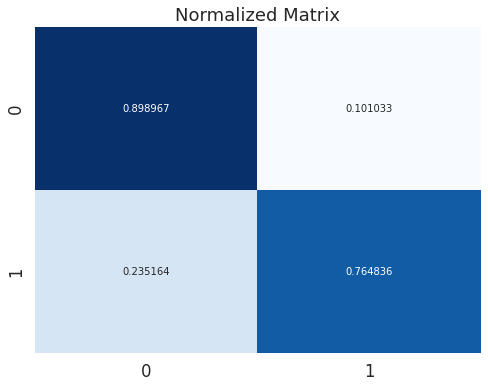

In [ ]:
predictionSV = model_SV.predict([input_val_wide,input_val_cnn])
decoded_validation = np.argmax(one_hot_labelsV_sv, axis=1)
decoded_prediction = np.argmax(np.around(predictionSV), axis=1)

matrix = confusion_matrix(decoded_validation, decoded_prediction)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.title("Normalized Matrix")
sns.heatmap(norm_matrix, annot=True, fmt='f', cmap="Blues", cbar=False);
print("Norm Matrix Trace:", norm_matrix.trace())

## D) NM and SV Combined

In [ ]:
from tensorflow import keras

model_MN = keras.models.load_model('/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridV5_FL_NM_trial_4_block_A_Jan10_01-12-06/ckpts/cp.ckpt',custom_objects={"f1":f1, "focal_loss_fixed":focal_loss})
model_SV = keras.models.load_model('/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridModelV5_FL_SV_Jan10_10-49-28/ckpts/cp.ckpt',custom_objects={"f1":f1, "focal_loss_fixed":focal_loss})

#### Prediction for model_MN

In [ ]:
import sklearn

In [ ]:
input_val_cnn_nm = valDOWN
input_val_wide_nm = normalizer(X_val_df_keras)

In [ ]:
predictionMN = model_MN.predict([input_val_wide_nm,input_val_cnn_nm])
decoded_validation = np.argmax(one_hot_labelsV_nm, axis=1)
decoded_prediction = np.argmax(np.around(predictionMN), axis=1)

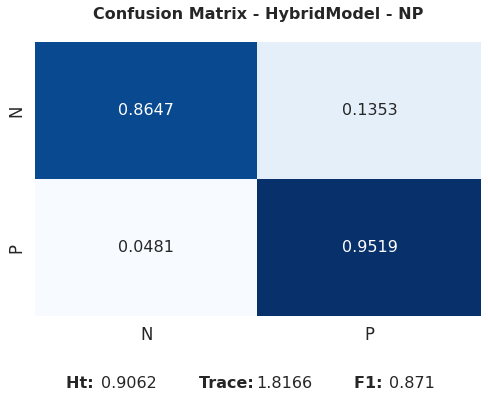

In [ ]:
# Metrics
matrix = confusion_matrix(decoded_validation, decoded_prediction)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(decoded_validation, decoded_prediction).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nm, predictionMN.round() , average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','P'], index = ['N', 'P'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - HybridModel - NP\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### Prediction for model_SV

In [ ]:
valDOWN_sv=np.asarray(valDOWN_sv)

In [ ]:
input_val_cnn_sv = valDOWN_sv
input_val_wide_sv = normalizer(X_sv_val_df_keras)

In [ ]:
predictionSV = model_SV.predict([input_val_wide_sv, input_val_cnn_sv])
decoded_validation = np.argmax(one_hot_labelsV_sv, axis=1)
decoded_prediction = np.argmax(np.around(predictionSV), axis=1)

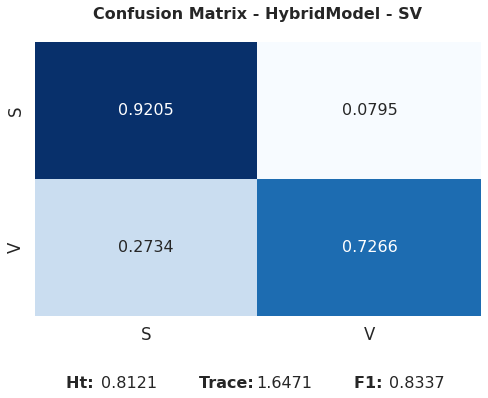

In [ ]:
# Metrics
matrix = confusion_matrix(decoded_validation, decoded_prediction)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(decoded_validation, decoded_prediction).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_sv, predictionSV.round() , average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['S','V'], index = ['S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - HybridModel - SV\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

### Global Predictions Double Hybrid

In [ ]:
# Start with the prediction of the MN model
decoded_predictionMN = np.argmax(np.around(predictionMN), axis=1)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [ ]:
# Extraction of the non N beats (M)
m_beats_list_wide = []
# Composition of the new predictor vector for SV
m_window_list_CNN = []
for i,beat in enumerate(decoded_predictionMN):
  if beat==1:
    m_window_list_CNN.append(valDOWN[i])

for i,beat in enumerate(decoded_predictionMN):
  if beat==1:
    m_beats_list_wide.append(np.asarray(X_val_df_keras[i]))


m_beats_list_wide = np.asarray(m_beats_list_wide)
m_window_list_CNN = np.asarray(m_window_list_CNN)

In [ ]:
input_val_cnn_ensemble = m_window_list_CNN
input_val_wide_ensemble = normalizer(m_beats_list_wide)

In [ ]:
# Make the predictions for the non N beats 
new_predictionSV = model_SV.predict([input_val_wide_ensemble,input_val_cnn_ensemble])
new_decoded_predictionSV = np.argmax(np.around(new_predictionSV), axis=1)

In [ ]:
# Substitute the M value with the new prediction
new_pred_list = []
# Composition of the new predictor vector for SV
count=0
for i,beat in enumerate(decoded_predictionMN):
  if beat==0:
    new_pred_list.append('N')
  else:
    if new_decoded_predictionSV[count] == 0:
      new_pred_list.append('S')
    else:
      new_pred_list.append('V')
    count=count+1

### Results

In [ ]:
#one hot val
num_classes = 3
one_hot_labels = np.zeros((len(new_pred_list), 3), dtype=np.bool)

for i, single_label in enumerate (new_pred_list):
  for j, x in enumerate(['N','S','V']):
    if (x in single_label):
      one_hot_labels[i][j] = 1
one_hot_labels_pred = one_hot_labels * 1.

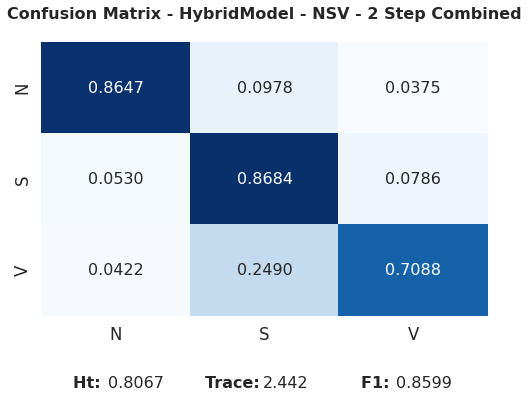

In [ ]:
# Metrics
matrix = confusion_matrix(y_val, new_pred_list)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val, new_pred_list).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv , one_hot_labels_pred, average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - HybridModel - NSV - 2 Step Combined\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

#7️⃣ Ensemble

## `Model Hybrid`

### Import models

In [ ]:
from tensorflow import keras

model_MN = keras.models.load_model('/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridV5_FL_NM_trial_4_block_A_Jan10_01-12-06/ckpts/cp.ckpt',custom_objects={"f1":f1, "focal_loss_fixed":focal_loss})
model_SV = keras.models.load_model('/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/ModelsAutoSearch/HybridModelV5_FL_SV_Jan10_10-49-28/ckpts/cp.ckpt',custom_objects={"f1":f1, "focal_loss_fixed":focal_loss})

### Prediction for model_MN

In [ ]:
input_val_cnn_nm = valDOWN
input_val_wide_nm = normalizer(X_val_df_keras)

In [ ]:
predictionMN = model_MN.predict([input_val_wide_nm,input_val_cnn_nm])
decoded_validation = np.argmax(one_hot_labelsV_nm, axis=1)
decoded_prediction = np.argmax(np.around(predictionMN), axis=1)

### Prediction for model_SV

In [ ]:
valDOWN_sv=np.asarray(valDOWN_sv)

In [ ]:
input_val_cnn_sv = valDOWN_sv
input_val_wide_sv = normalizer(X_sv_val_df_keras)

In [ ]:
predictionSV = model_SV.predict([input_val_wide_sv, input_val_cnn_sv])
decoded_validation = np.argmax(one_hot_labelsV_sv, axis=1)
decoded_prediction = np.argmax(np.around(predictionSV), axis=1)

### Prediction Healthy vs Pathological

In [ ]:
# Start with the prediction of the MN model
decoded_predictionMN = np.argmax(np.around(predictionMN), axis=1)

In [ ]:
# Extraction of the non N beats (M)
m_beats_list_wide = []
# Composition of the new predictor vector for SV
m_window_list_CNN = []
for i,beat in enumerate(decoded_predictionMN):
  if beat==1:
    m_window_list_CNN.append(valDOWN[i])

for i,beat in enumerate(decoded_predictionMN):
  if beat==1:
    m_beats_list_wide.append(np.asarray(X_val_df_keras[i]))


m_beats_list_wide = np.asarray(m_beats_list_wide)
m_window_list_CNN = np.asarray(m_window_list_CNN)

### Prediction PAC vs PVC

In [ ]:
input_val_cnn_ensemble = m_window_list_CNN
input_val_wide_ensemble = normalizer(m_beats_list_wide)

In [ ]:
# Make the predictions for the non N beats 
new_predictionSV = model_SV.predict([input_val_wide_ensemble,input_val_cnn_ensemble])
new_decoded_predictionSV = np.argmax(np.around(new_predictionSV), axis=1)

### Prediction Complete

In [ ]:
# Substitute the M value with the new prediction
new_pred_list = []
# Composition of the new predictor vector for SV
count=0
for i,beat in enumerate(decoded_predictionMN):
  if beat==0:
    new_pred_list.append('N')
  else:
    if new_decoded_predictionSV[count] == 0:
      new_pred_list.append('S')
    else:
      new_pred_list.append('V')
    count=count+1

#### One hot conversion

In [ ]:
#one hot val
num_classes = 3
one_hot_labels = np.zeros((len(new_pred_list), 3), dtype=np.bool)

for i, single_label in enumerate (new_pred_list):
  for j, x in enumerate(['N','S','V']):
    if (x in single_label):
      one_hot_labels[i][j] = 1
one_hot_labels_pred = one_hot_labels * 1.

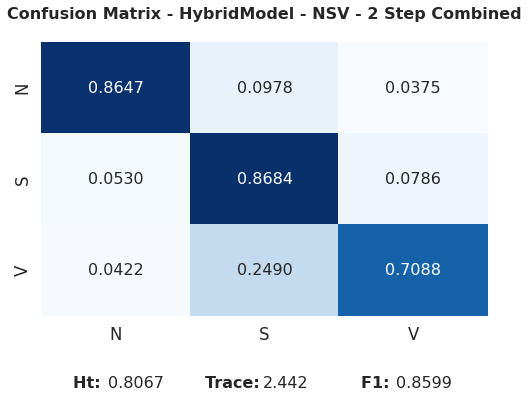

In [ ]:
# Metrics
matrix = confusion_matrix(y_val, new_pred_list)
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val, new_pred_list).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv , one_hot_labels_pred, average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - HybridModel - NSV - 2 Step Combined\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

## `Model Deep STFT` 

### Import 264 Window

In [ ]:
# Directorty for the models
exps_dir="/content/drive/MyDrive/A.I/FinalProject/modelSEBA/models"

In [ ]:
with open("/content/drive/MyDrive/A.I/FinalProject/Dataset/dataset_val_down_264_filtered.pickle","rb") as f:
    valUP=pickle.load(f)

### Import Models

In [ ]:
model1 = tfk.models.load_model(os.path.join(exps_dir, str('best_model/STFT_step1_t7_ovf')))
model2 = tfk.models.load_model(os.path.join(exps_dir, str('best_model/STFT_step2_t7_stab')))

### STFT Generation

In [ ]:
from scipy import signal

band=30
time=7
freq=128
sub_window=88
m1=6.943412950379595
m2=6.815962391462233

#replicate STFT preprocessin (notice the signal fed to it is already preprocessed in the common way to all the models in this script 
#(downsampling to 128 Hz, bandpass filtering, 0 mean, standard deeviation, windowing of heartbeats of 264 samples))

ZxxV = np.empty(shape=(len(valUP),band,time,2))
for i in range(len(valUP)):
    f1,t1,val1= signal.stft(valUP[i,:,0], freq , nperseg=sub_window)
    f2,t2,val2= signal.stft(valUP[i,:,1], freq , nperseg=sub_window)
    ZxxV[i,:,:,0]=np.abs(val1[0:band])
    ZxxV[i,:,:,1]=np.abs(val2[0:band])


for i in range(ZxxV.shape[0]):
    for j in range(time):
        for k in range (band):
            ZxxV[i,k,j,0]=(ZxxV[i,k,j,0])/(m1/2.)-1.
            ZxxV[i,k,j,1]=(ZxxV[i,k,j,1])/(m2/2.)-1.

### Prediction Healthy vs Pathological

In [ ]:
pred1 =  model1.predict(ZxxV)

#### Pathological Data

In [ ]:
ZxxVsv=[] #samples classified as D by the first step and therefore fed to the step 2 classifier
posD=[]
for i in range(pred1.shape[0]):
  if pred1[i][0]<pred1[i][1]: #probability to be N lower than to be D
    ZxxVsv.append(ZxxV[i])
    posD.append(i)
ZxxVsv=np.array(ZxxVsv)
ZxxVsv.shape

(11249, 30, 7, 2)

### Prediction Model PAC vs PVC

In [ ]:
pred2 = model2.predict(ZxxVsv)

### Prediction Complete

In [ ]:
prediction_seba=np.zeros((ZxxV.shape[0],3))
for i in range(ZxxV.shape[0]):
  if pred1[i][0]>pred1[i][1]:
    prediction_seba[i][0]=1
  else:
    for j,pos in enumerate(posD):
      if i==pos:
        if pred2[j][0]>pred2[j][1]: #probability of S greater than V
          prediction_seba[i][1]=1
        else:
          prediction_seba[i][2]=1

Norm Matrix Trace:	 2.401066881492995
Ht: 			 0.7742694912928165
F1: 			 0.8534884968091382


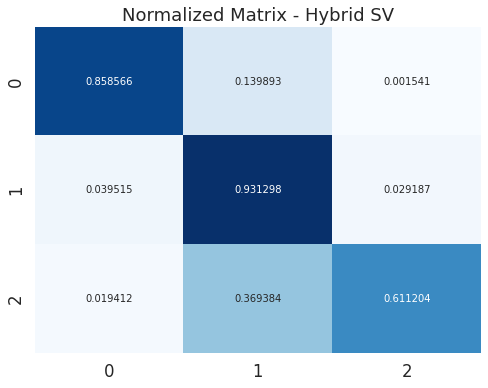

In [ ]:
matrix = confusion_matrix(np.argmax(one_hot_labelsV_nsv, axis=1), np.argmax(prediction_seba, axis=1))

norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.title("Normalized Matrix - Hybrid SV")
sns.heatmap(norm_matrix, annot=True, fmt='f', cmap="Blues", cbar=False);
print("Norm Matrix Trace:\t", norm_matrix.trace())
print("Ht: \t\t\t", ht(np.argmax(one_hot_labelsV_nsv, axis=1), np.argmax(prediction_seba, axis=1)))
print("F1: \t\t\t", sklearn.metrics.f1_score(one_hot_labelsV_nsv, prediction_seba , average="samples"))

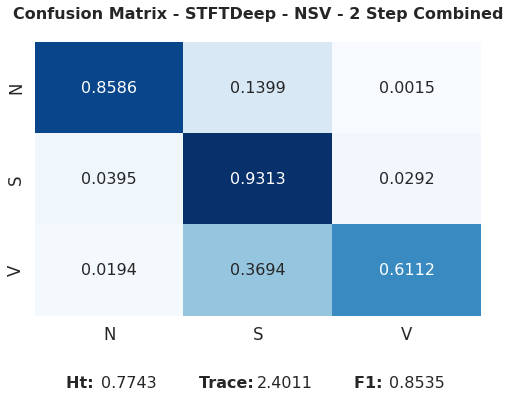

In [ ]:
# Metrics
matrix = confusion_matrix(np.argmax(one_hot_labelsV_nsv, axis=1), np.argmax(prediction_seba, axis=1))
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(np.argmax(one_hot_labelsV_nsv, axis=1), np.argmax(prediction_seba, axis=1)).round(4)
f1_plot = sklearn.metrics.f1_score(one_hot_labelsV_nsv, prediction_seba , average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - STFTDeep - NSV - 2 Step Combined\n",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()

## `Model KNN` 

### Load model and make predictions 

In [ ]:
# load the model from disk
knn_model = pickle.load(open("/content/drive/MyDrive/A.I/FinalProject/ModelsKarim/FinalModels/knn_nsv.sav", 'rb'))
knn_prediction = knn_model.predict(X_val_knn)

### Convert predictions in one hot encoding

In [ ]:
#one hot val
num_classes = 3
one_hot_labels = np.zeros((len(knn_prediction), 3), dtype=np.bool)

for i, single_label in enumerate (knn_prediction):
  for j, x in enumerate(['N','S','V']):
    if (x in single_label):
      one_hot_labels[i][j] = 1
one_hot_labels_knn = one_hot_labels * 1.

## ✔️ Final Ensemble Prediction

In [ ]:
FTmatrix_train  = np.concatenate([np.expand_dims(prediction_seba, axis=2),np.expand_dims(one_hot_labels_pred, axis=2),np.expand_dims(one_hot_labels_knn, axis=2)], axis=2) 

### Define function to combine predictions (weighted)

In [ ]:
def prediction(matrix, a, b, c):
  lista = np.empty((matrix.shape[0],matrix.shape[1]))
  for i in range (matrix.shape[0]):
    N = a*matrix[i][0][0] + b*matrix[i][0][1] + c*matrix[i][0][2]
    S = a*matrix[i][1][0] + b*matrix[i][1][1] + c*matrix[i][1][2]
    V = a*matrix[i][2][0] + b*matrix[i][2][1] + c*matrix[i][2][2]

    lista[i][0]=N
    lista[i][1]=S
    lista[i][2]=V

  return lista

### Gridsearch for the best coefficients

In [ ]:
#values_grid = np.arange(0.01, 0.99, 0.01)
values_grid = np.arange(0.01, 0.99, 0.01)

best = [0, 0, 0]

y_pred=np.empty((FTmatrix_train.shape[0],FTmatrix_train.shape[1]))
trace_max = 0
count = 0 
p_count = 0
for a in values_grid:
  for b in values_grid:
    for c in values_grid:
      count = count+1
      if count == 47060: #9412
        p_count = p_count+1
        print("\nPercentage: ", 5*p_count,"%")
        count = 0 

      if(a+b+c == 1):
        y_pred = prediction(FTmatrix_train, a, b, c)
        
        matrix = confusion_matrix(np.argmax(one_hot_labelsV_nsv, axis=1), np.argmax(y_pred, axis=1))
        norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]
        trace = norm_matrix.trace()
        
        if trace > trace_max: 
          print("Trace Max:", trace, " With", best[0],best[1],best[2])
          trace_max = trace
          best[0] = a
          best[1] = b
          best[2] = c
print(best)

Trace Max: 2.3088779063532265  With 0 0 0
Trace Max: 2.3815520182900607  With 0.01 0.01 0.98
Trace Max: 2.4675158920930684  With 0.01 0.49 0.5
Trace Max: 2.4677314477174623  With 0.01 0.5 0.49
Trace Max: 2.4724890746700714  With 0.03 0.48000000000000004 0.49

Percentage:  5 %

Percentage:  10 %

Percentage:  15 %

Percentage:  20 %

Percentage:  25 %

Percentage:  30 %

Percentage:  35 %

Percentage:  40 %

Percentage:  45 %

Percentage:  50 %

Percentage:  55 %

Percentage:  60 %

Percentage:  65 %

Percentage:  70 %

Percentage:  75 %

Percentage:  80 %

Percentage:  85 %

Percentage:  90 %

Percentage:  95 %
[0.03, 0.49, 0.48000000000000004]


### Prediction

In [ ]:
ens_pred = prediction(FTmatrix_train, 0.03, 0.49, 0.48)

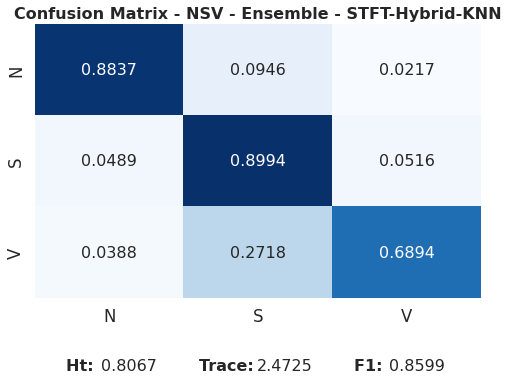

In [ ]:
# Metrics
matrix = confusion_matrix(np.argmax(one_hot_labelsV_nsv, axis=1), np.argmax(ens_pred, axis=1))
norm_matrix = matrix/matrix.sum(axis=1)[:, np.newaxis]

trace_plot = norm_matrix.trace().round(4)
ht_plot = ht(y_val, new_pred_list).round(4)
f1_plot = f1_score(one_hot_labelsV_nsv , one_hot_labels_pred, average="samples").round(4)

# Dataframe Conversion
norm_matrix = pd.DataFrame(norm_matrix, columns = ['N','S','V'], index = ['N', 'S', 'V'])

# Plot
plt.figure(figsize=(8, 10))
plt.title("Confusion Matrix - NSV - Ensemble - STFT-Hybrid-KNN",fontsize=16, fontweight="bold")
sns.heatmap(norm_matrix, annot=True, fmt='0.4f', cmap="Blues", cbar=False, annot_kws={"fontsize":16})
plt.figtext(0.18, 0.4, "Ht: ", fontsize=16, fontweight="bold")
plt.figtext(0.24, 0.4, str(ht_plot), fontsize=16)
plt.figtext(0.41, 0.4, "\nTrace: ", fontsize=16, fontweight="bold")
plt.figtext(0.51, 0.4, str(trace_plot), fontsize=16)
plt.figtext(0.68, 0.4, "\nF1: ", fontsize=16, fontweight="bold")
plt.figtext(0.74, 0.4, str(f1_plot), fontsize=16)

plt.subplots_adjust(bottom=0.5)
plt.show()